# Stock Analysis and Portfolio Management - Project

## Business Case
#### In the recent past, the industry of wealth management has seen a lot of growth. Every individual or business actively searches for opportunities to get the maximum returns. However, in most of the cases, they either lack the skills to identify the right investment opportunity, or there is a shortage of time for finding these opportunities. Hence, this gave rise to the dedicated individuals who perform this task on behalf of the investors for a commission - Portfolio managers.
 
#### A portfolio manager makes investment decisions and carries out other related activities on behalf of vested investors. They work with a team of analysts and researchers, and their main objective is to realise the needs of the investor and suggest a suitable portfolio that meets all the expectations. They are responsible for establishing the best investment strategy, selecting appropriate investments along with the right allocation. However, in doing so, they face a lot of competition in the form of other portfolio managers and rival firms. Therefore, the portfolio manager has to use the available resources to provide the best solution to the investor.

#### Consider yourself working for an associate at an investment firm that manages accounts for private clients. Your role requires you to analyse a portfolio of stocks to provide consultation on investment management based on client’s requirement.

## 1. Preliminary Steps

### 1.1 Import Libraries

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from pylab import rcParams
from dateutil.parser import parse
from scipy.stats import boxcox

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

### 1.2 Importing Datasets

In [2]:
# Read the CSV file, and view it

abb_data = pd.read_csv("BA_CaseStudy_Dataset/Annexure-I.csv")   # abb - abbreviation
abb_data

Ticker         Industry                 Company Name
0     AAL         Aviation  American Airlines Group Inc
1     ALK         Aviation         Alaska Air Group Inc
2      HA         Aviation        Hawaiian Holdings Inc
3      CS          Finance                Credit Suisse
4      DB          Finance                Deutsche Bank
5      GS          Finance                Goldman Sachs
6     JNJ       Healthcare            Johnson & Johnson
7     MRK       Healthcare            Merck and CO inc.
8     BHC  Pharmaceuticals  Bausch Health Companies inc
9    AAPL       Technology                    Apple Inc
10   AMZN       Technology                       Amazon
11   GOOG       Technology                     Alphabet

In [3]:
# Read all the Stock Data CSV-files and create dataframe for each one

# S&P-500 File
SP500_data = pd.read_csv("BA_CaseStudy_Dataset/S&P500.csv")

# Aviation Company Files
aal_data = pd.read_csv("BA_CaseStudy_Dataset/Aviation/AAL.csv")  #AAL - American Airlines Group Inc
alk_data = pd.read_csv("BA_CaseStudy_Dataset/Aviation/ALK.csv")  #ALK - Alaska Air Group Inc
ha_data = pd.read_csv("BA_CaseStudy_Dataset/Aviation/HA.csv")    #HA - Hawaiian Holdings Inc

# Finance Company Files
cs_data = pd.read_csv("BA_CaseStudy_Dataset/Finance/CS.csv")     #CS - Credit Suisse
db_data = pd.read_csv("BA_CaseStudy_Dataset/Finance/DB.csv")     #DB - Deutsche Bank
gs_data = pd.read_csv("BA_CaseStudy_Dataset/Finance/GS.csv")     #GS - Goldman Sachs

# Healthcare_Pharma Company Files
bhc_data = pd.read_csv("BA_CaseStudy_Dataset/Healthcare_Pharma/BHC.csv")     #BHC - Bausch Health Companies inc
jnj_data = pd.read_csv("BA_CaseStudy_Dataset/Healthcare_Pharma/JNJ.csv")     #JNJ - Johnson & Johnson
mrk_data = pd.read_csv("BA_CaseStudy_Dataset/Healthcare_Pharma/MRK.csv")     #MRK - Merck and CO inc.

# Technology Company Files
appl_data = pd.read_csv("BA_CaseStudy_Dataset/Technology/AAPL.csv")     #APPL - Apple Inc
amzn_data = pd.read_csv("BA_CaseStudy_Dataset/Technology/AMZN.csv")     #AMZN - Amazon
goog_data = pd.read_csv("BA_CaseStudy_Dataset/Technology/GOOG.csv")     #Goog - Google

### 1.3 Exporing Datasets

In [4]:
def gen_information(dataframe):
    print("---------SHAPE-----------\n")
    print(dataframe.shape)
    print("-------------------------\n")
    print("\n---------INFO-----------\n")
    print(dataframe.info())
    print("-----------------------------------------\n")
    print("\n---------HEAD-----------\n")
    print(dataframe.head())
    print("-----------------------------------------\n")
    print("\n---------MISSING VALUES-----------\n")
    print(dataframe.isnull().sum())
    #print(round(((dataframe.isnull().sum()/len(dataframe))*100),2))
    print("-----------------------------------------\n")

In [5]:
# Explore the S&P500 dataset for general information and missing values

print("\033[1m" + "S&P-500 DATASET" + "\033[0m\n")
gen_information(SP500_data)

S&P-500 DATASET

---------SHAPE-----------

(2517, 7)
-------------------------


---------INFO-----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB
None
-----------------------------------------


---------HEAD-----------

         Date         Open         High          Low        Close  \
0  01-10-2010  1143.489990  1150.300049  1139.420044  1146.239990   
1  04-10-2010  1144.959961  1148.160034  1131.869995  1137.030029   
2  05-10-2010  1140.680054  1162.760010  1140.680054  1160.750000   
3  06-10-20

In [6]:
# Explore the American Airlines dataset for general information and missing values

print("\033[1m" + "AMERICAN AIRLINES DATASET" + "\033[0m\n")
gen_information(aal_data)

AMERICAN AIRLINES DATASET

---------SHAPE-----------

(2517, 7)
-------------------------


---------INFO-----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB
None
-----------------------------------------


---------HEAD-----------

         Date  Open  High   Low  Close  Adj Close   Volume
0  01-10-2010  9.29  9.39  9.21   9.29   8.758067  3603800
1  04-10-2010  9.24  9.48  9.05   9.12   8.597802  3856800
2  05-10-2010  9.27  9.35  9.15   9.23   8.701504  3896600
3  06-10-2010  9.27  9.40  9.15   9.23   

In [7]:
# Explore the Alaska Air dataset for general information and missing values

print("\033[1m" + "ALASKA AIR DATASET" + "\033[0m\n")
gen_information(alk_data)

ALASKA AIR DATASET

---------SHAPE-----------

(2524, 7)
-------------------------


---------INFO-----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   float64
dtypes: float64(6), object(1)
memory usage: 138.2+ KB
None
-----------------------------------------


---------HEAD-----------

         Date     Open     High      Low    Close  Adj Close     Volume
0  01-10-2010  12.9325  12.9625  12.3675  12.4475  10.972344  1663600.0
1  04-10-2010  12.4300  12.5900  11.9975  12.1425  10.703489  1512400.0
2  05-10-2010  12.2600  12.2850  11.9450  12.2150  10.767396  2567200.0
3  06-

In [8]:
# Explore the Hawaiian Holdings dataset for general information and missing values

print("\033[1m" + "HAWAIIAN HOLDINGS DATASET" + "\033[0m\n")
gen_information(ha_data)

HAWAIIAN HOLDINGS DATASET

---------SHAPE-----------

(2524, 7)
-------------------------


---------INFO-----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   float64
dtypes: float64(6), object(1)
memory usage: 138.2+ KB
None
-----------------------------------------


---------HEAD-----------

         Date  Open  High   Low  Close  Adj Close     Volume
0  01-10-2010  6.02  6.05  5.88   5.96   5.742526   645400.0
1  04-10-2010  5.96  6.00  5.73   5.75   5.540189   618900.0
2  05-10-2010  5.82  5.93  5.77   5.85   5.636539   534800.0
3  06-10-2010  5.85  6.05  5.85   5.97   5.

In [9]:
# Explore the Credit Suisse dataset for general information and missing values

print("\033[1m" + "CREDIT SUISSE DATASET" + "\033[0m\n")
gen_information(cs_data)

CREDIT SUISSE DATASET

---------SHAPE-----------

(2712, 7)
-------------------------


---------INFO-----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712 entries, 0 to 2711
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2705 non-null   object 
 1   Open       2705 non-null   float64
 2   High       2705 non-null   float64
 3   Low        2705 non-null   float64
 4   Close      2705 non-null   float64
 5   Adj Close  2705 non-null   float64
 6   Volume     2705 non-null   float64
dtypes: float64(6), object(1)
memory usage: 148.4+ KB
None
-----------------------------------------


---------HEAD-----------

         Date       Open       High        Low      Close  Adj Close    Volume
0  04-01-2010  49.902344  51.035156  49.765625  50.771484  34.852165  734200.0
1  05-01-2010  51.250000  51.318359  50.644531  51.191406  35.140423  447700.0
2  06-01-2010  50.224609  50.917969  49.951172  50.478

In [10]:
# Explore the Deutsche Bank dataset for general information and missing values

print("\033[1m" + "DEUTSCHE BANK DATASET" + "\033[0m\n")
gen_information(db_data)

DEUTSCHE BANK DATASET

---------SHAPE-----------

(2712, 7)
-------------------------


---------INFO-----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712 entries, 0 to 2711
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2705 non-null   object 
 1   Open       2705 non-null   float64
 2   High       2705 non-null   float64
 3   Low        2705 non-null   float64
 4   Close      2705 non-null   float64
 5   Adj Close  2705 non-null   float64
 6   Volume     2705 non-null   float64
dtypes: float64(6), object(1)
memory usage: 148.4+ KB
None
-----------------------------------------


---------HEAD-----------

         Date       Open       High        Low      Close  Adj Close    Volume
0  04-01-2010  69.103050  70.162216  68.893127  69.875954  59.037861  469500.0
1  05-01-2010  71.412216  71.698471  70.610687  71.211830  60.166534  503300.0
2  06-01-2010  69.847328  70.543892  69.494278  69.980

In [11]:
# Explore the Goldman Sachs dataset for general information and missing values

print("\033[1m" + "GOLDMAN SACHS DATASET" + "\033[0m\n")
gen_information(gs_data)

GOLDMAN SACHS DATASET

---------SHAPE-----------

(2712, 7)
-------------------------


---------INFO-----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712 entries, 0 to 2711
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2705 non-null   object 
 1   Open       2705 non-null   float64
 2   High       2705 non-null   float64
 3   Low        2705 non-null   float64
 4   Close      2705 non-null   float64
 5   Adj Close  2705 non-null   float64
 6   Volume     2705 non-null   float64
dtypes: float64(6), object(1)
memory usage: 148.4+ KB
None
-----------------------------------------


---------HEAD-----------

         Date        Open        High         Low       Close   Adj Close  \
0  04-01-2010  170.050003  174.250000  169.509995  173.080002  147.920776   
1  05-01-2010  173.000000  176.259995  172.570007  176.139999  150.535919   
2  06-01-2010  175.380005  175.380005  173.759995  174.25999

In [12]:
# Explore the Bausch Health dataset for general information and missing values

print("\033[1m" + "Bausch Health DATASET" + "\033[0m\n")
gen_information(bhc_data)

Bausch Health DATASET

---------SHAPE-----------

(2525, 7)
-------------------------


---------INFO-----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525 entries, 0 to 2524
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   float64
dtypes: float64(6), object(1)
memory usage: 138.2+ KB
None
-----------------------------------------


---------HEAD-----------

         Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  25.120001  25.879999  25.100000  25.750000  24.757708   
1  04-10-2010  25.750000  25.990000  25.590000  25.870001  24.873083   
2  05-10-2010  26.040001  26.330000  25.830000  26.299999  25.286512   
3  

In [13]:
# Explore the Johnson & Johnson dataset for general information and missing values

print("\033[1m" + "JOHNSON & JOHNSON" + "\033[0m\n")
gen_information(jnj_data)

JOHNSON & JOHNSON

---------SHAPE-----------

(2525, 7)
-------------------------


---------INFO-----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525 entries, 0 to 2524
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   float64
dtypes: float64(6), object(1)
memory usage: 138.2+ KB
None
-----------------------------------------


---------HEAD-----------

         Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  62.090000  62.250000  61.570000  61.750000  45.970119   
1  04-10-2010  61.540001  61.980000  61.299999  61.669998  45.910553   
2  05-10-2010  62.080002  62.939999  62.009998  62.799999  46.751797   
3  06-1

In [14]:
# Explore the Merck and CO Inc. dataset for general information and missing values

print("\033[1m" + "MERCK AND CO INC DATASET" + "\033[0m\n")
gen_information(mrk_data)

MERCK AND CO INC DATASET

---------SHAPE-----------

(2525, 7)
-------------------------


---------INFO-----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525 entries, 0 to 2524
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   float64
dtypes: float64(6), object(1)
memory usage: 138.2+ KB
None
-----------------------------------------


---------HEAD-----------

         Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  36.759998  36.840000  36.349998  36.599998  26.052284   
1  04-10-2010  36.490002  36.750000  36.290001  36.520000  25.995331   
2  05-10-2010  36.860001  37.150002  36.700001  37.020000  26.351234   


In [15]:
# Explore the Apple Inc dataset for general information and missing values

print("\033[1m" + "APPLE INC DATASET" + "\033[0m\n")
gen_information(appl_data)

APPLE INC DATASET

---------SHAPE-----------

(2517, 7)
-------------------------


---------INFO-----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB
None
-----------------------------------------


---------HEAD-----------

         Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  10.219643  10.235000  10.048214  10.090000   8.719163   
1  04-10-2010  10.057143  10.103572   9.920357   9.951428   8.599421   
2  05-10-2010  10.071428  10.337500  10.065000  10.319285   8.917298 

In [16]:
# Explore the Amazon dataset for general information and missing values

print("\033[1m" + "AMAZON DATASET" + "\033[0m\n")
gen_information(amzn_data)

AMAZON DATASET

---------SHAPE-----------

(2524, 7)
-------------------------


---------INFO-----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   float64
dtypes: float64(6), object(1)
memory usage: 138.2+ KB
None
-----------------------------------------


---------HEAD-----------

         Date        Open        High         Low       Close   Adj Close  \
0  01-10-2010  157.080002  157.440002  152.199997  153.710007  153.710007   
1  04-10-2010  153.949997  155.960007  152.789993  155.389999  155.389999   
2  05-10-2010  157.080002  161.210007  157.009995  160.869995  160.

In [17]:
# Explore the GOOGLE dataset for general information and missing values

print("\033[1m" + "GOOGLE DATASET" + "\033[0m\n")
gen_information(goog_data)

GOOGLE DATASET

---------SHAPE-----------

(2524, 7)
-------------------------


---------INFO-----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   float64
dtypes: float64(6), object(1)
memory usage: 138.2+ KB
None
-----------------------------------------


---------HEAD-----------

         Date        Open        High         Low       Close   Adj Close  \
0  01-10-2010  264.010437  264.319275  260.523499  261.828613  261.828613   
1  04-10-2010  261.494843  263.138702  258.456238  260.199707  260.199707   
2  05-10-2010  263.203461  268.991760  262.291870  268.110046  268.

In [18]:
# Add Company and Industry names for easy identification and understanding

SP500_data['Company']='SP500'
SP500_data['Industry']= 'Index'

aal_data['Company']='American_Airlines'
aal_data['Industry']='Aviation'

alk_data['Company']='Alaska_Air'
alk_data['Industry']='Aviation'

ha_data['Company']='Hawaiian'
ha_data['Industry']='Aviation'

cs_data['Company']='Credit_Suisse'
cs_data['Industry']='Finance'

db_data['Company']='Deutsche_Bank'
db_data['Industry']='Finance'

gs_data['Company']='Goldman_Sachs'
gs_data['Industry']='Finance'

bhc_data['Company']='Bausch_Health'
bhc_data['Industry']='Healthcare_Pharma'

jnj_data['Company']='Johnson'
jnj_data['Industry']='Healthcare_Pharma'

mrk_data['Company']='Merck'
mrk_data['Industry']='Healthcare_Pharma'

appl_data['Company']='Apple'
appl_data['Industry']='Technology'

amzn_data['Company']='Amazon'
amzn_data['Industry']='Technology'

goog_data['Company']='Alphabet'
goog_data['Industry']='Technology'

### 1.4 Merging all Datasets

In [19]:
# Create merged dataframe

allStocks = [SP500_data, aal_data, alk_data, ha_data, cs_data, db_data, gs_data, bhc_data, jnj_data, 
          mrk_data, appl_data, amzn_data, goog_data]

allStocks_df = pd.concat(allStocks)

In [20]:
# Explore the merged dataset for general information and missing values

gen_information(allStocks_df)

---------SHAPE-----------

(33358, 9)
-------------------------


---------INFO-----------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33358 entries, 0 to 2523
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       33285 non-null  object 
 1   Open       33285 non-null  float64
 2   High       33285 non-null  float64
 3   Low        33285 non-null  float64
 4   Close      33285 non-null  float64
 5   Adj Close  33285 non-null  float64
 6   Volume     33285 non-null  float64
 7   Company    33358 non-null  object 
 8   Industry   33358 non-null  object 
dtypes: float64(6), object(3)
memory usage: 2.5+ MB
None
-----------------------------------------


---------HEAD-----------

         Date         Open         High          Low        Close  \
0  01-10-2010  1143.489990  1150.300049  1139.420044  1146.239990   
1  04-10-2010  1144.959961  1148.160034  1131.869995  1137.030029   
2  05-10-2010  1140.680054 

In [21]:
# Dropping the Rows with All NULL Values

allStocks_df.dropna(inplace=True)

In [22]:
# Check for Null Values again

allStocks_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Company      0
Industry     0
dtype: int64

### 1.5 DataType Correction

In [23]:
# Convert the primary key "Date" datatype to date time format

allStocks_df['Date']=pd.to_datetime(allStocks_df['Date'],format='%d-%m-%Y')

In [24]:
# Check for DataTypes

allStocks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33285 entries, 0 to 2516
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       33285 non-null  datetime64[ns]
 1   Open       33285 non-null  float64       
 2   High       33285 non-null  float64       
 3   Low        33285 non-null  float64       
 4   Close      33285 non-null  float64       
 5   Adj Close  33285 non-null  float64       
 6   Volume     33285 non-null  float64       
 7   Company    33285 non-null  object        
 8   Industry   33285 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 2.5+ MB


In [25]:
# Extrating 10years data (from 1st October 2010 to 30th September 2020)

allStocks_df = allStocks_df[allStocks_df["Date"].between ('2010-10-01', '2020-09-30') ]

In [26]:
# # Check the shape of dataset after slicing

allStocks_df.shape

(32721, 9)

In [27]:
# Combine Company and Industry columns
allStocks_df['Stock Name']=allStocks_df['Company']+"-"+allStocks_df['Industry']

# Dropping Company and Industry columns
allStocks_df.drop(columns=['Company','Industry'], inplace=True)

In [28]:
# Set DATE column as an index

allStocks_df = allStocks_df.set_index('Date')

In [29]:
# Check a sample dataframe after the changes

allStocks_df.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-10-01  1143.489990  1150.300049  1139.420044  1146.239990  1146.239990   
2010-10-04  1144.959961  1148.160034  1131.869995  1137.030029  1137.030029   
2010-10-05  1140.680054  1162.760010  1140.680054  1160.750000  1160.750000   
2010-10-06  1159.810059  1162.329956  1154.849976  1159.969971  1159.969971   
2010-10-07  1161.569946  1163.869995  1151.410034  1158.060059  1158.060059   

                  Volume   Stock Name  
Date                                   
2010-10-01  4.298910e+09  SP500-Index  
2010-10-04  3.604110e+09  SP500-Index  
2010-10-05  4.068840e+09  SP500-Index  
2010-10-06  4.073160e+09  SP500-Index  
2010-10-07  3.910550e+09  SP500-Index

In [30]:
# Keep only necessary columns for further analysis

allStocks_df = allStocks_df[['Close','Volume','Stock Name']]

In [31]:
allStocks_df.head()

Close        Volume   Stock Name
Date                                              
2010-10-01  1146.239990  4.298910e+09  SP500-Index
2010-10-04  1137.030029  3.604110e+09  SP500-Index
2010-10-05  1160.750000  4.068840e+09  SP500-Index
2010-10-06  1159.969971  4.073160e+09  SP500-Index
2010-10-07  1158.060059  3.910550e+09  SP500-Index

In [32]:
allStocks_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32721 entries, 2010-10-01 to 2020-09-30
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close       32721 non-null  float64
 1   Volume      32721 non-null  float64
 2   Stock Name  32721 non-null  object 
dtypes: float64(2), object(1)
memory usage: 1022.5+ KB


### 1.6 Export the dataset into CSV File

In [33]:
# A clean version of the final dataset

allStocks_df.to_csv('Stocks_FinalData.csv')

## 2. Data Exploration

### 2.1 Create and Explore Price Dataframe

In [34]:
# Create a dataframe for price from the final dataframe
prices = pd.pivot_table(allStocks_df,index="Date",columns="Stock Name", values='Close').rename_axis(None, axis=1)

In [35]:
# Explore the general information of Price Dataframe

gen_information(prices)

---------SHAPE-----------

(2517, 13)
-------------------------


---------INFO-----------

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2010-10-01 to 2020-09-30
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Alaska_Air-Aviation              2517 non-null   float64
 1   Alphabet-Technology              2517 non-null   float64
 2   Amazon-Technology                2517 non-null   float64
 3   American_Airlines-Aviation       2517 non-null   float64
 4   Apple-Technology                 2517 non-null   float64
 5   Bausch_Health-Healthcare_Pharma  2517 non-null   float64
 6   Credit_Suisse-Finance            2517 non-null   float64
 7   Deutsche_Bank-Finance            2517 non-null   float64
 8   Goldman_Sachs-Finance            2517 non-null   float64
 9   Hawaiian-Aviation                2517 non-null   float64
 10  Johnson-Healthcare_Pharma        2

#### Observation:
There are no null values noticed in the 'Closing Price' information of any of the given stock and hence there is no need for missing value treatment

### 2.2 Create and Explore Volume Dataframe

In [36]:
# Create a dataframe for Volume from the final dataframe
volume = pd.pivot_table(allStocks_df,index="Date",columns="Stock Name", values='Volume').rename_axis(None, axis=1)

In [37]:
# Explore the general information of Volume Dataframe

gen_information(volume)

---------SHAPE-----------

(2517, 13)
-------------------------


---------INFO-----------

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2010-10-01 to 2020-09-30
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Alaska_Air-Aviation              2517 non-null   float64
 1   Alphabet-Technology              2517 non-null   float64
 2   Amazon-Technology                2517 non-null   float64
 3   American_Airlines-Aviation       2517 non-null   float64
 4   Apple-Technology                 2517 non-null   float64
 5   Bausch_Health-Healthcare_Pharma  2517 non-null   float64
 6   Credit_Suisse-Finance            2517 non-null   float64
 7   Deutsche_Bank-Finance            2517 non-null   float64
 8   Goldman_Sachs-Finance            2517 non-null   float64
 9   Hawaiian-Aviation                2517 non-null   float64
 10  Johnson-Healthcare_Pharma        2

#### Observation:
There are no null values noticed in the 'Volume' information of any of the given stock and hence there is no need for missing value treatment

As the data preparation is complete, now the dataset is ready for further exploration and analysis

### 2.3 Exploratory Data Analysis (EDA)

 #### 2.3.1 Explore distribution and check for outliers

In [38]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%

prices.describe(percentiles=[.25, .5, .75, .90, .95, .99]).round(2)

Alaska_Air-Aviation  Alphabet-Technology  Amazon-Technology  \
count              2517.00              2517.00            2517.00   
mean                 50.03               730.43             854.64   
std                  24.19               364.69             745.20   
min                  11.62               236.55             153.03   
25%                  26.78               403.64             266.49   
50%                  58.54               651.79             533.75   
75%                  67.26              1055.81            1500.00   
90%                  79.97              1229.46            1883.97   
95%                  87.25              1393.51            2137.87   
99%                  95.12              1521.84            3162.04   
max                 100.24              1728.28            3531.45   

       American_Airlines-Aviation  Apple-Technology  \
count                     2517.00           2517.00   
mean                        29.40             33.45   
std                         15.21             20.63   
min                          4.00              9.95   
25%                         13.01             18.96   
50%                         32.52             27.59   
75%                         42.20             42.96   
90%                         48.52             56.76   
95%                         51.20             77.38   
99%                         54.31            112.98   
max                         58.47            134.18   

       Bausch_Health-Healthcare_Pharma  Credit_Suisse-Finance  \
count                          2517.00                2517.00   
mean                             61.88                  21.50   
std                              57.17                   8.99   
min                               8.51                   6.67   
25%                              22.17                  13.74   
50%                              38.76                  19.64   
75%                              90.27                  27.75   
90%                             139.43                  31.69   
95%                             202.71                  40.62   
99%                             239.43                  44.06   
max                             262.52                  46.51   

       Deutsche_Bank-Finance  Goldman_Sachs-Finance  Hawaiian-Aviation  \
count                2517.00                2517.00            2517.00   
mean                   27.30                 179.60              22.87   
std                    15.41                  42.41              15.48   
min                     5.48                  87.70               3.78   
25%                    13.47                 154.99               7.03   
50%                    28.37                 177.23              21.91   
75%                    41.05                 211.58              36.90   
90%                    47.34                 237.09              45.74   
95%                    54.69                 245.80              49.17   
99%                    59.19                 262.87              56.23   
max                    62.62                 273.38              60.30   

       Johnson-Healthcare_Pharma  Merck-Healthcare_Pharma  SP500-Index  
count                    2517.00                  2517.00      2517.00  
mean                      105.28                    57.16      2111.39  
std                        28.17                    15.16       612.23  
min                        57.66                    29.81      1099.23  
25%                        81.93                    45.73      1562.17  
50%                       104.04                    57.18      2071.22  
75%                       130.98                    64.09      2656.30  
90%                       140.77                    81.37      2932.95  
95%                       146.26                    84.34      3128.57  
99%                       150.51                    89.09      3373.17  
max                       155.51

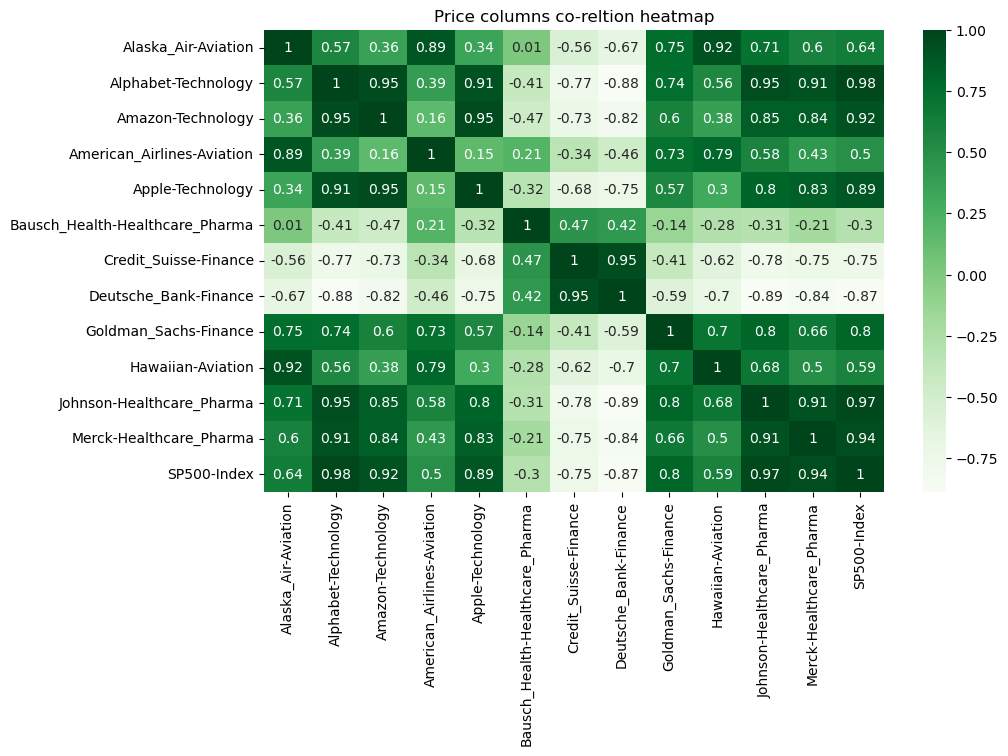

In [39]:
# Heatmap of all numberical variables

plt.figure(figsize=(10,6))
sns.heatmap(prices.corr(),annot=True,cmap='Greens')
plt.title("Price columns co-reltion heatmap")
plt.show()

#### Observation:
Upon inspecting the correlation of each stock with the index, it is found that:

Stocks with Strong Positive Correlation (0.6 to 1): Apple, Amazon, Google, Goldman Sachs, J&J, Merck, and Alaska

Stocks with Weak Positive Correlation (0 to 0.6): American Airlines and Hawaiian Holdings.

Stocks with Negative Correlation (0 to -1): Bausch Health, Credit Suisse, and Deutsche Bank.

Ideally, the stocks that have negative correlation with the Index (S&P 500) should be avoided in the portfolio since they may prove to be very risky.

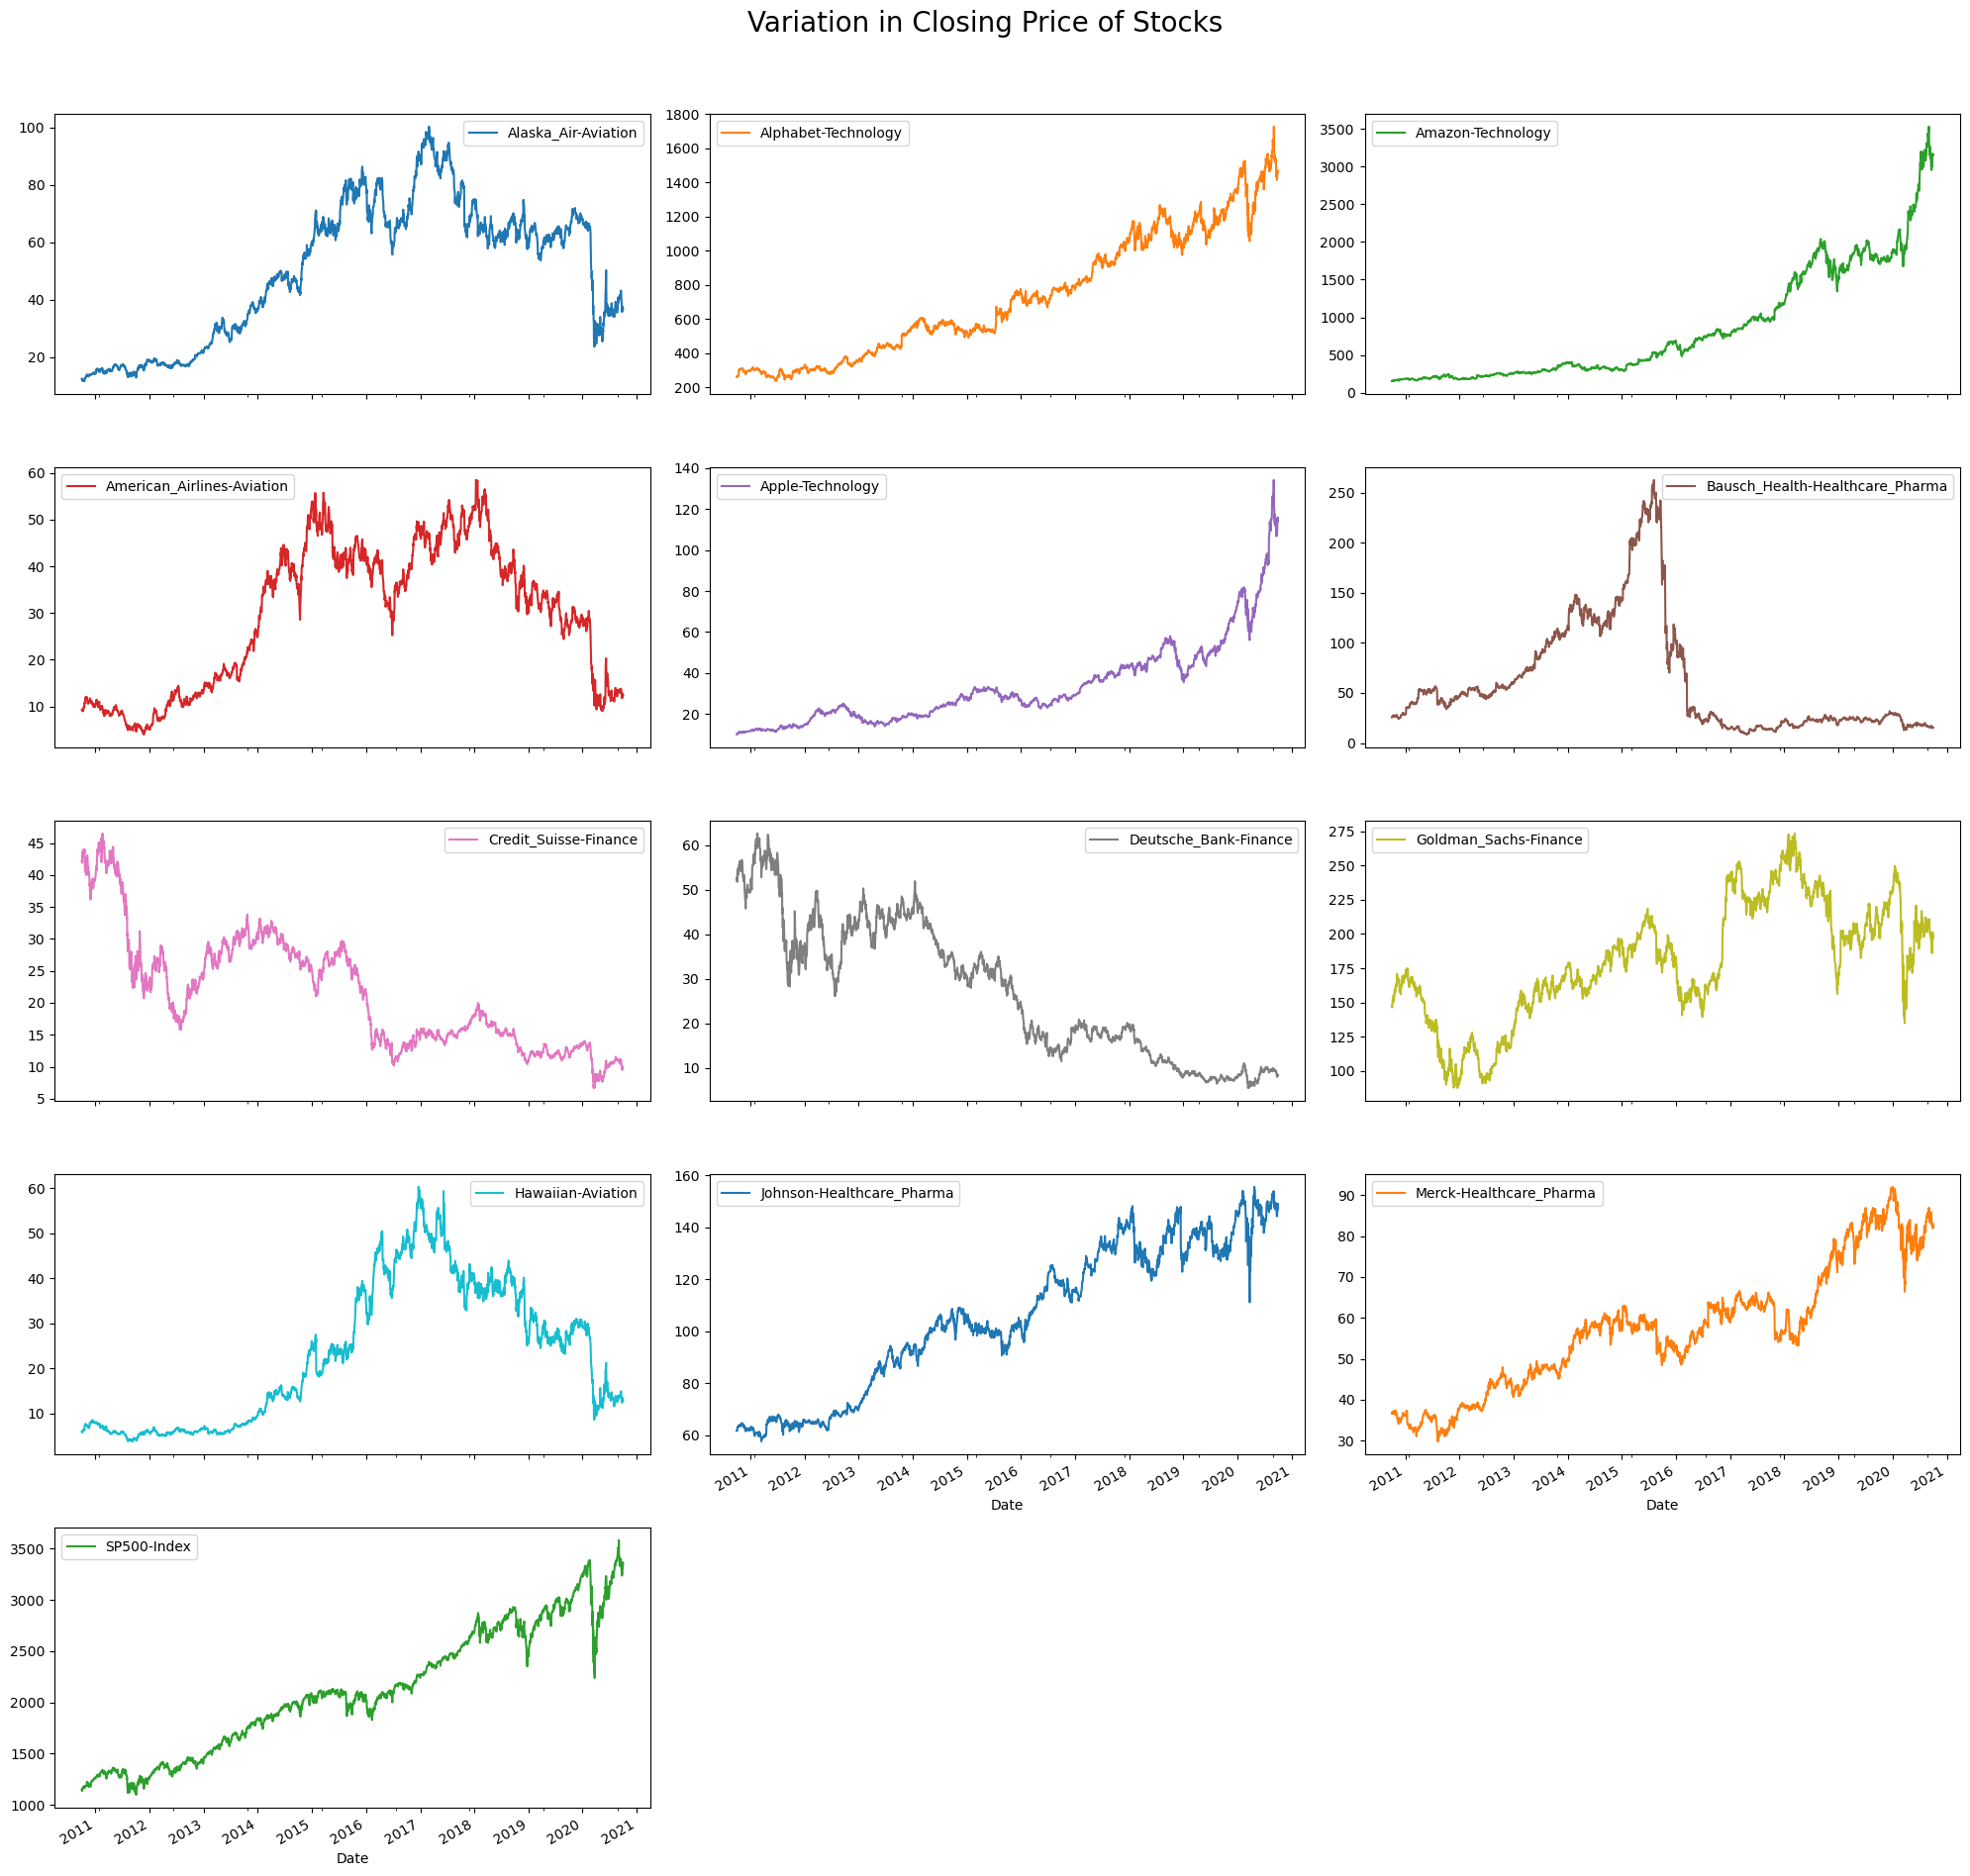

In [40]:
#Creating Sub-plots to visualize the stocks movement

prices.plot(kind = 'line',subplots=True, layout = (5,3),figsize=(20,18))
plt.tight_layout()
plt.suptitle("Variation in Closing Price of Stocks", y=1.05, fontsize = 20)
plt.show()

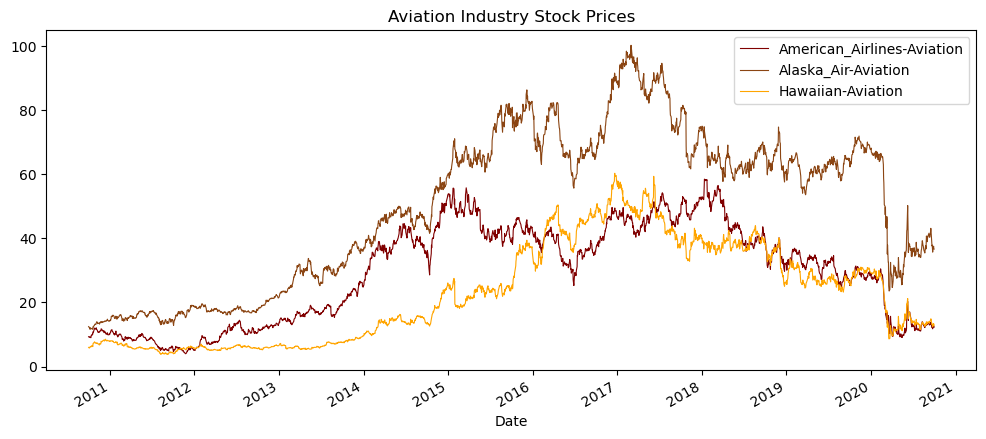

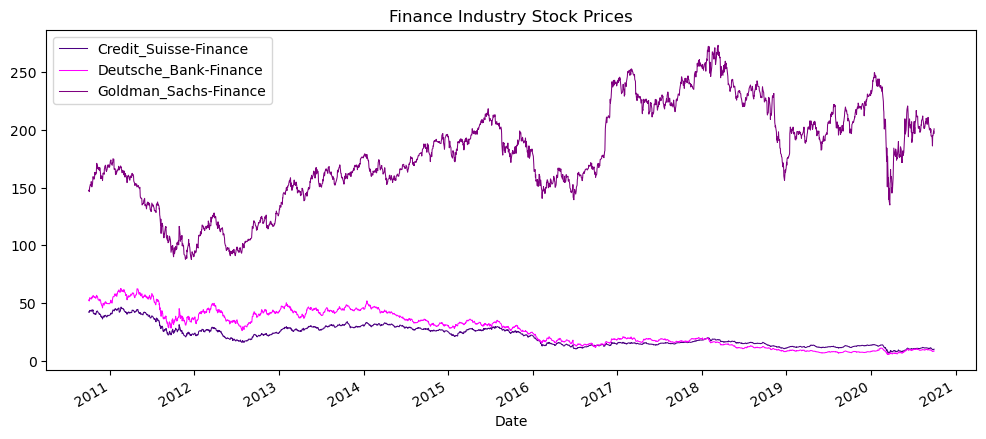

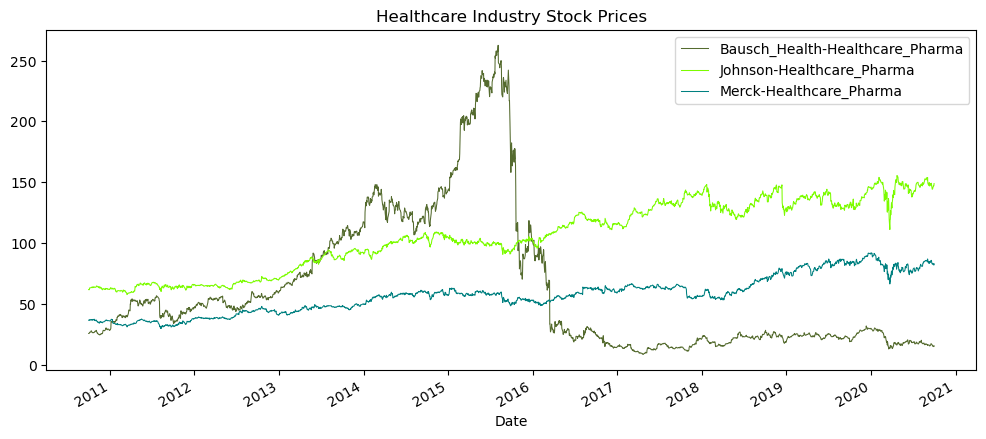

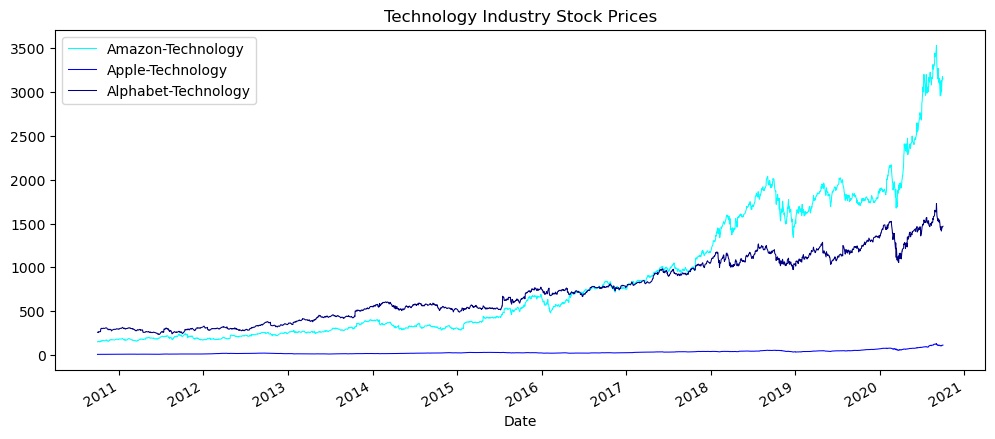

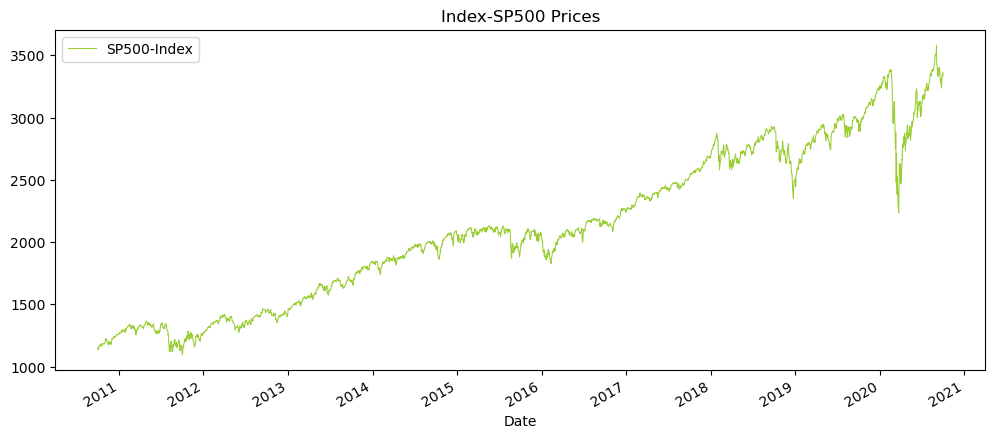

In [41]:
# Plot the actual prices of stocks- industrywise

# Plot the stocks of Aviation
prices[['American_Airlines-Aviation','Alaska_Air-Aviation',
        'Hawaiian-Aviation']].plot(subplots=False, title = 'Aviation Industry Stock Prices', 
                                   figsize=(12,5), linewidth = '0.80', color = ['Maroon','SaddleBrown','Orange'])

# Plot the stocks of Finance
prices[['Credit_Suisse-Finance','Deutsche_Bank-Finance',
        'Goldman_Sachs-Finance']].plot(subplots=False, title="Finance Industry Stock Prices", 
                                       figsize=(12,5), linewidth = '0.75', color = ['Indigo','Fuchsia','Purple'])

# Plot the stocks of Healthcare
prices[['Bausch_Health-Healthcare_Pharma','Johnson-Healthcare_Pharma',
        'Merck-Healthcare_Pharma']].plot(subplots=False, title="Healthcare Industry Stock Prices", 
                                         figsize=(12,5), linewidth = '0.75', color = ['DarkOliveGreen','LawnGreen','Teal'])

# Plot the stocks of Technology
prices[['Amazon-Technology', 'Apple-Technology', 
        'Alphabet-Technology']].plot(subplots=False, title="Technology Industry Stock Prices", 
                                     figsize=(12,5), linewidth = '0.75', color = ['Aqua','Blue','Navy'])

# Plot the stocks of Index
prices[['SP500-Index']].plot(subplots=False, title="Index-SP500 Prices", 
                             figsize=(12,5), linewidth = '0.75', color = 'YellowGreen')

plt.show()

#### Observation:
- Tech industry's stocks show an uptrend especially Amazon and Google.
- In the Healthcare, J&J and Merck show a slight uptrend while Bausch faces a downfall
- Both Finance and Aviation indusry stocks are in downtrend.
- There is a significant difference in the prices levels of stocks within the sector itself.
- The market index shows a clear uptrend despite a couple of sharp falls in some years.

In [42]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%

round(volume.describe(percentiles=[.25, .5, .75, .90, .95, .99]))

Alaska_Air-Aviation  Alphabet-Technology  Amazon-Technology  \
count               2517.0               2517.0             2517.0   
mean             1648085.0            2951427.0          4326001.0   
std              1095121.0            2460964.0          2410250.0   
min               270600.0               7900.0           881300.0   
25%              1087600.0            1393000.0          2769400.0   
50%              1399400.0            2030500.0          3710900.0   
75%              1880800.0            3966700.0          5111000.0   
90%              2678080.0            5708720.0          6963540.0   
95%              3274300.0            6922660.0          8789960.0   
99%              5572752.0           11977428.0         13840372.0   
max             27347100.0           29760600.0         24134200.0   

       American_Airlines-Aviation  Apple-Technology  \
count                      2517.0      2.517000e+03   
mean                   12631463.0      2.635459e+08   
std                    21493216.0      2.037493e+08   
min                     1158400.0      3.247000e+07   
25%                     5368800.0      1.180676e+08   
50%                     7405700.0      1.935080e+08   
75%                    10785200.0      3.505768e+08   
90%                    17903660.0      5.302287e+08   
95%                    46865340.0      6.564275e+08   
99%                   114487224.0      1.009062e+09   
max                   428617100.0      1.880998e+09   

       Bausch_Health-Healthcare_Pharma  Credit_Suisse-Finance  \
count                           2517.0                 2517.0   
mean                         7194057.0              2476788.0   
std                         11219850.0              1847826.0   
min                           380300.0               205000.0   
25%                          1677300.0              1275300.0   
50%                          3203800.0              2020700.0   
75%                          7874000.0              3124000.0   
90%                         17169040.0              4497940.0   
95%                         26367300.0              5715120.0   
99%                         56095352.0              9468984.0   
max                        138949800.0             17769200.0   

       Deutsche_Bank-Finance  Goldman_Sachs-Finance  Hawaiian-Aviation  \
count                 2517.0                 2517.0             2517.0   
mean               3677383.0              3833079.0           936550.0   
std                3553901.0              2187223.0           648562.0   
min                      0.0               467700.0           120500.0   
25%                1527400.0              2443200.0           539500.0   
50%                2767400.0              3243900.0           769900.0   
75%                4697800.0              4587600.0          1133000.0   
90%                7172700.0              6381720.0          1638940.0   
95%                9428840.0              7844560.0          2051520.0   
99%               16504184.0             11930732.0          3262572.0   
max               70176200.0             24482500.0         12586900.0   

       Johnson-Healthcare_Pharma  Merck-Healthcare_Pharma   SP500-Index  
count                     2517.0                   2517.0  2.517000e+03  
mean                   8605432.0               11939474.0  3.739228e+09  
std                    4493037.0                6218030.0  8.805742e+08  
min                    2353800.0                2235900.0  1.025000e+09  
25%                    5959500.0                8222000.0  3.241030e+09  
50%                    7737300.0               10550700.0  3.591270e+09  
75%                   10020300.0               13695700.0  4.060610e+09  
90%                   12765140.0               18048100.0  4.729522e+09  
95%                   15210100.0               22037320.0  5.272054e+09  
99%                   24490356.0               38622724.0  7.037227e+09  
max                  

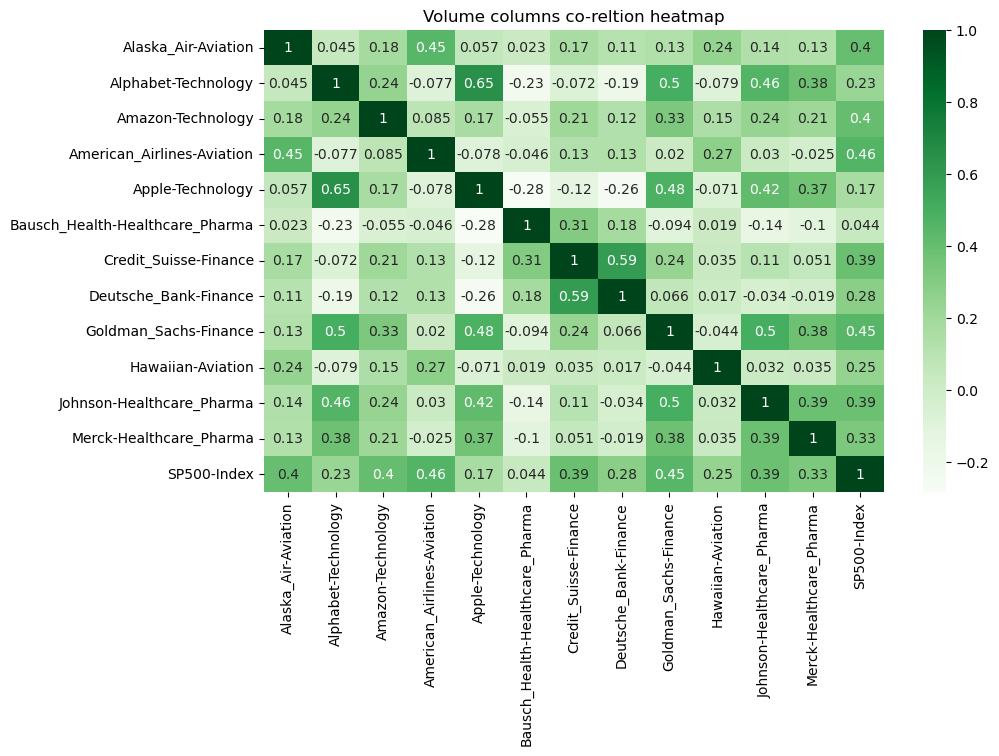

In [43]:
# Heatmap of all numberical variables

plt.figure(figsize=(10,6))
sns.heatmap(volume.corr(),annot=True,cmap='Greens')
plt.title("Volume columns co-reltion heatmap")
plt.show()

#### Obervation :
All the stocks have a positve correlation with S&P500. However, the correlation is of a weak positive correlation with the highest being 0.46 with American Air

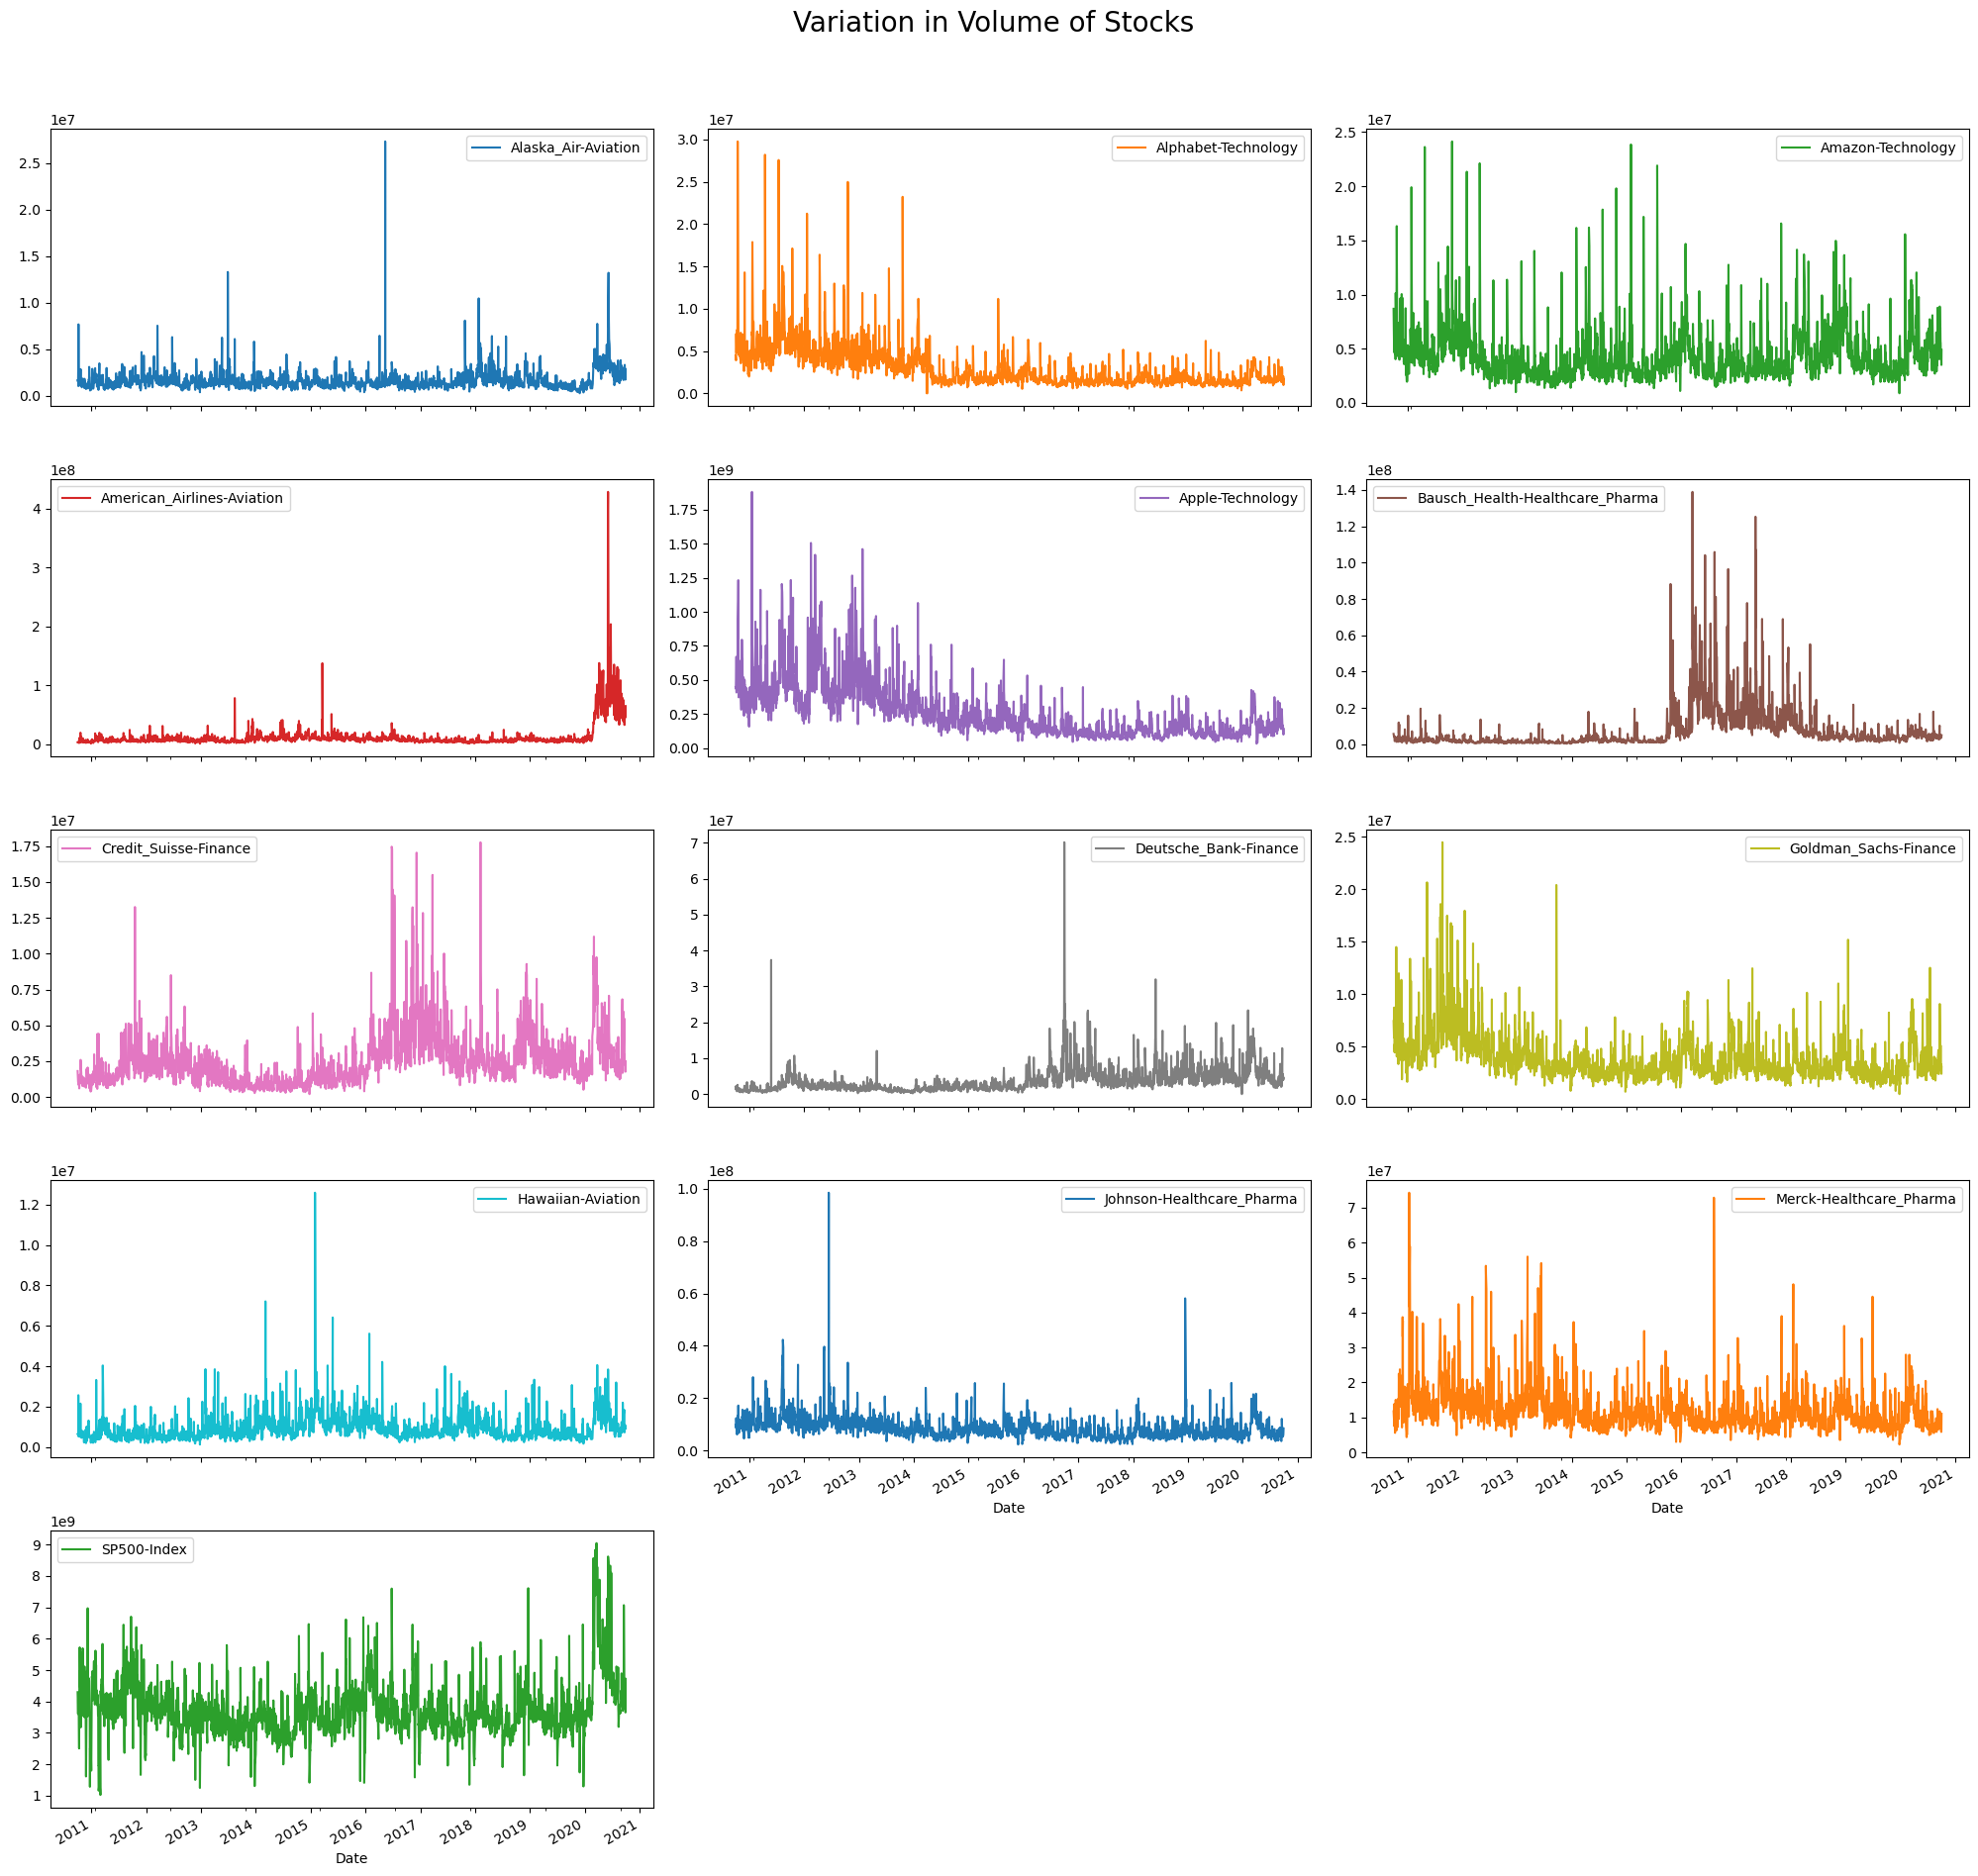

In [44]:
#Creating Sub-plots to visualize the stocks movement
volume.plot(kind = 'line',subplots=True, layout = (5,3),figsize=(20,18))
plt.tight_layout()
plt.suptitle("Variation in Volume of Stocks", y=1.05, fontsize = 20)
plt.show()

#### Observation:
The volumes have gone up in 2020-21 for all the stocks in Aviation industry In the Tech sector- Apple and Google stock volumes are more or less stabilized although the volumes traded were higher during 2011-2014; However, Amazon stocks are fluctuating in volumes.

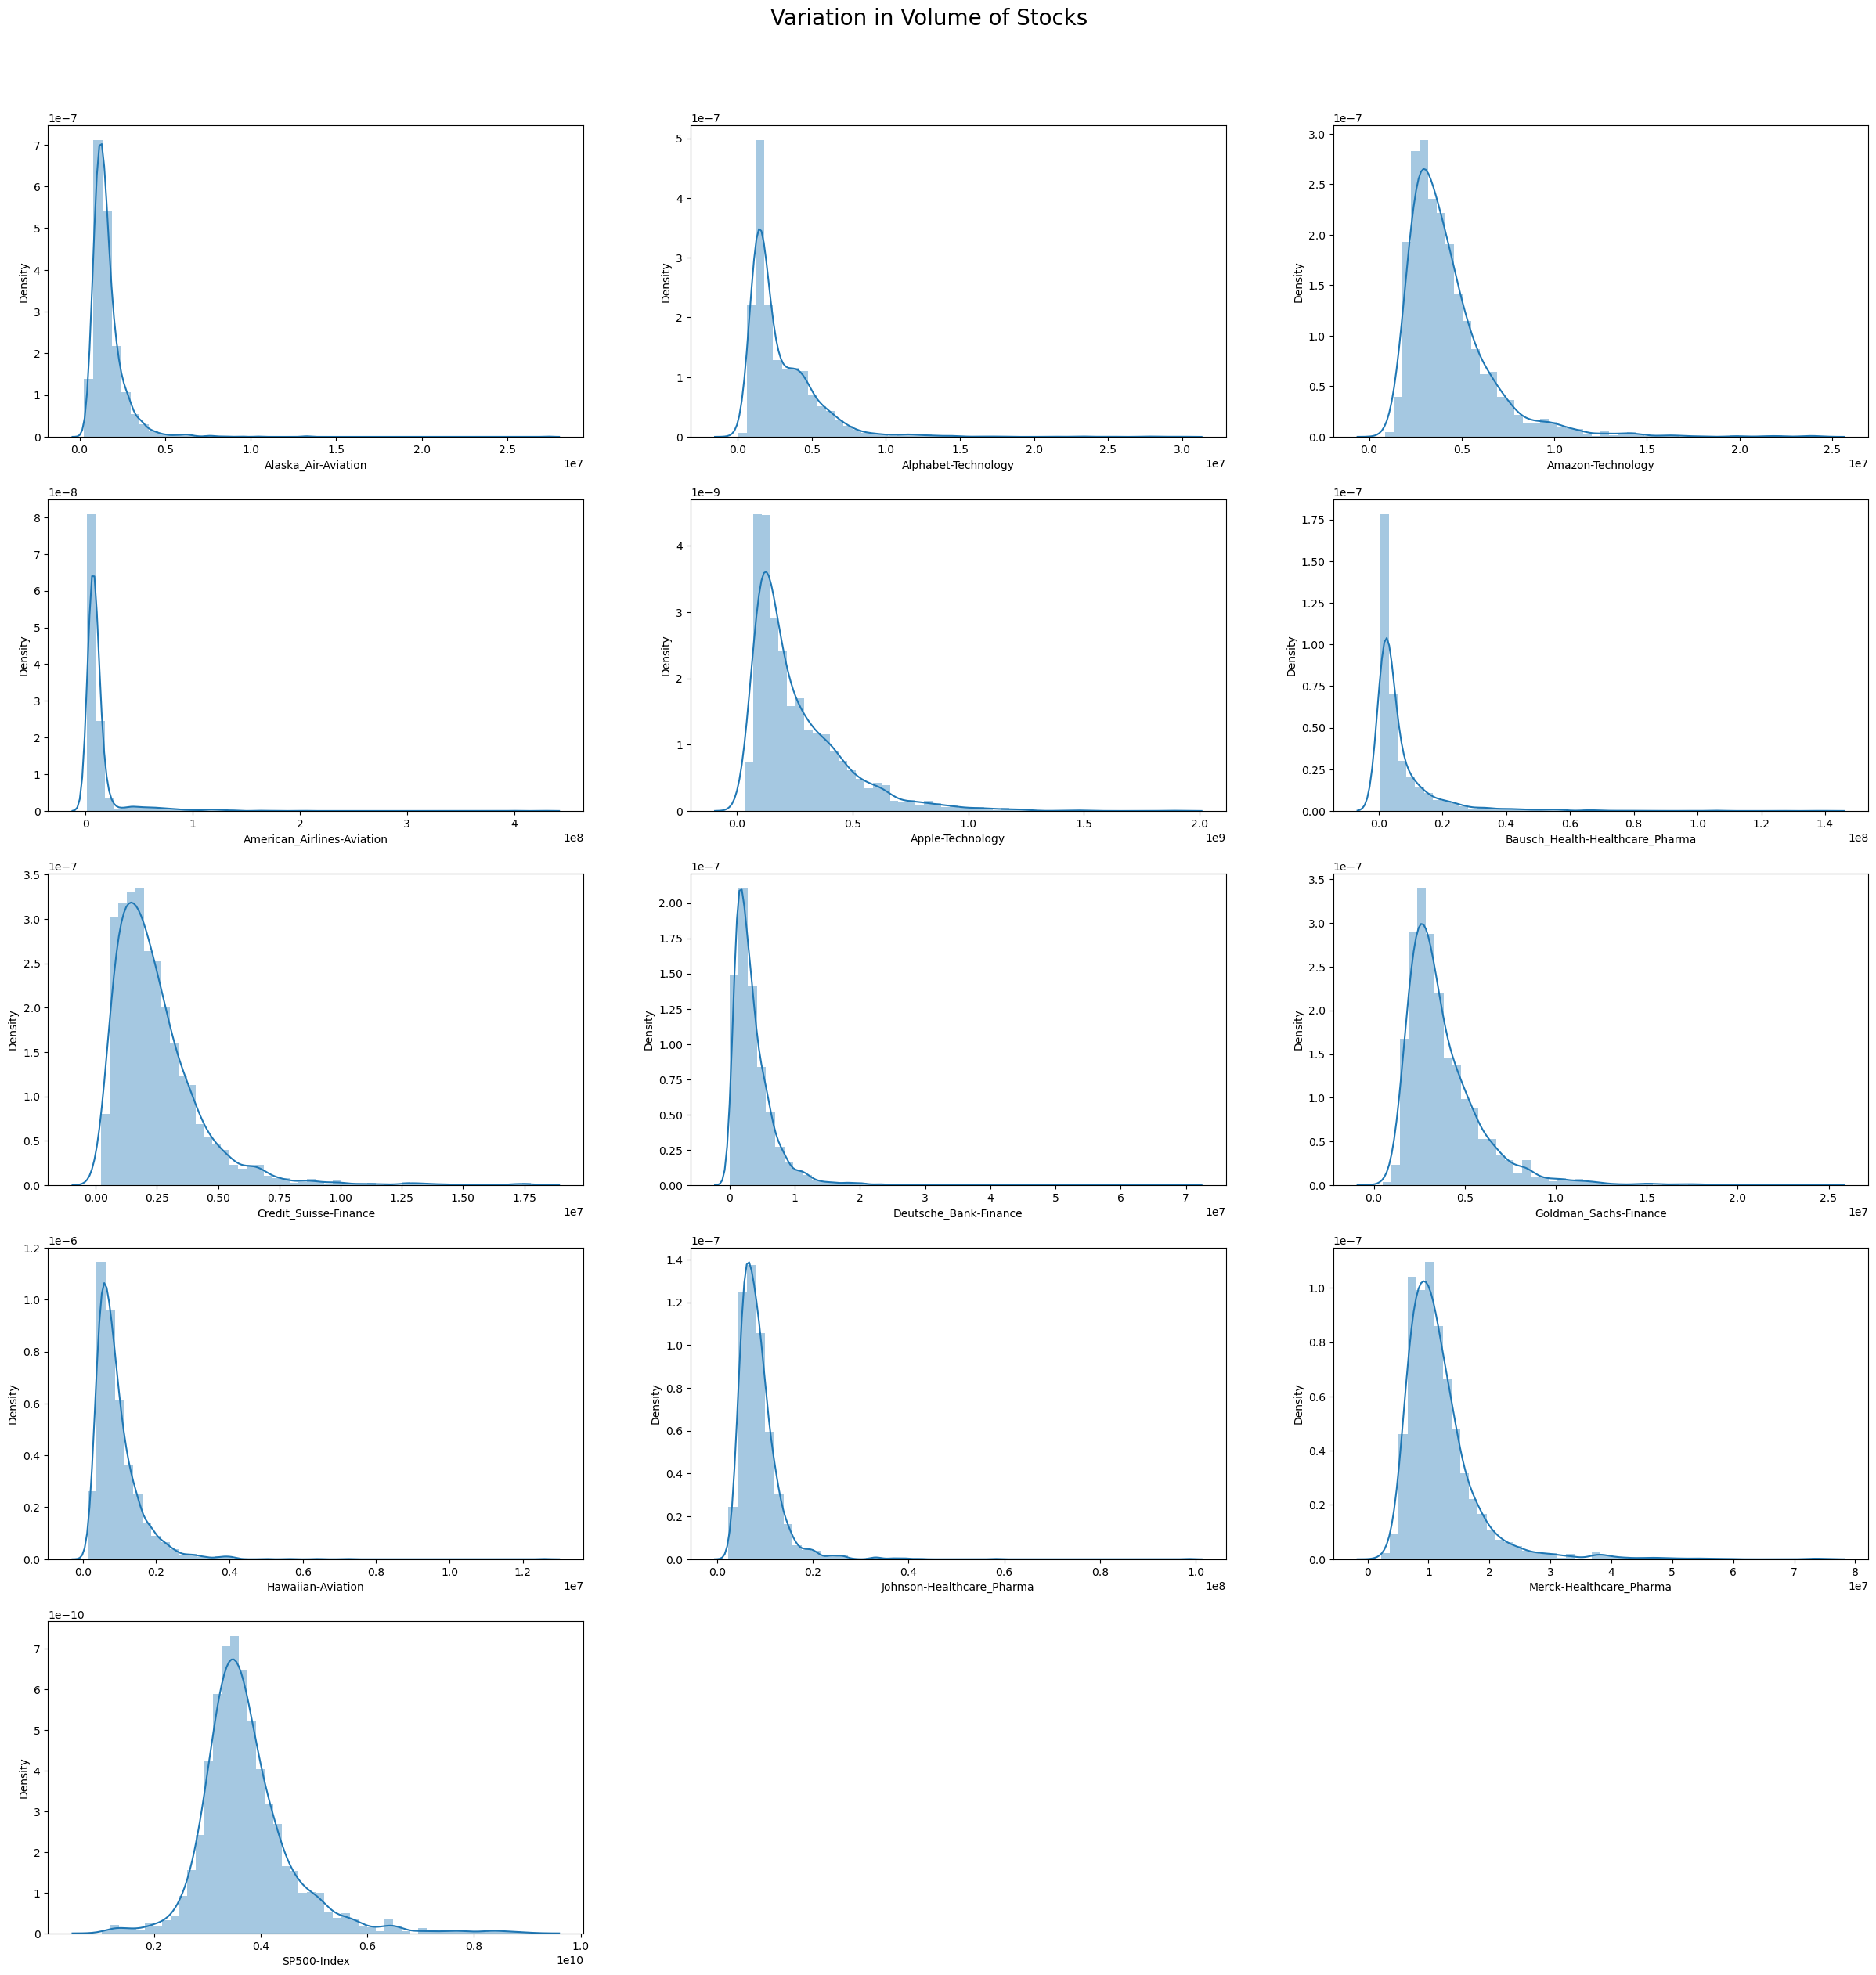

In [45]:
#Plotting the histogram plots of the Volumes of Stocks
plt.figure(figsize = (30,30))
plt.tight_layout()
feature = volume.columns
for i in enumerate(feature):
    plt.subplot(5,3, i[0]+1)
    sns.distplot(volume[i[1]],hist=True)
    
plt.suptitle("Variation in Volume of Stocks",y=0.93, fontsize = 20)
plt.show()

#### Observation:
The above plot gives the ditribution of Volume around the mean. Higher the standard deviation, more volatile is the stock. Stocks with higher Standard deviation will cover more area in the above graph.Hence, volatility can be seen in Credit_Suisse-Finance, Goldman_Sachs-Finance, Merck-Healthcare_Pharma, Apple-Technology, Amazon-Technology and Alphabet-Technology.

#### 2.3.2 Data Normalization
The stock prices of various stocks here are on different scales. Hence, we need to perform normalisation to have them on the same scale for analysis

In [46]:
# Replicating the original dataframe for this purpose
normalized_prices = prices.copy()

# Checking the data
normalized_prices.head()

Alaska_Air-Aviation  Alphabet-Technology  Amazon-Technology  \
Date                                                                      
2010-10-01              12.4475           261.828613         153.710007   
2010-10-04              12.1425           260.199707         155.389999   
2010-10-05              12.2150           268.110046         160.869995   
2010-10-06              12.1875           266.177307         155.399994   
2010-10-07              11.6250           264.015411         156.270004   

            American_Airlines-Aviation  Apple-Technology  \
Date                                                       
2010-10-01                        9.29         10.090000   
2010-10-04                        9.12          9.951428   
2010-10-05                        9.23         10.319285   
2010-10-06                        9.23         10.328215   
2010-10-07                        9.24         10.329286   

            Bausch_Health-Healthcare_Pharma  Credit_Suisse-Finance  \
Date                                                                 
2010-10-01                        25.750000              42.226563   
2010-10-04                        25.870001              41.914063   
2010-10-05                        26.299999              43.154297   
2010-10-06                        26.690001              43.437500   
2010-10-07                        26.600000              43.671875   

            Deutsche_Bank-Finance  Goldman_Sachs-Finance  Hawaiian-Aviation  \
Date                                                                          
2010-10-01              52.595421             147.699997               5.96   
2010-10-04              51.755726             146.570007               5.75   
2010-10-05              53.950382             149.570007               5.85   
2010-10-06              54.608780             150.839996               5.97   
2010-10-07              54.036259             151.110001               6.15   

            Johnson-Healthcare_Pharma  Merck-Healthcare_Pharma  SP500-Index  
Date                                                                         
2010-10-01                  61.750000                36.599998  1146.239990  
2010-10-04                  61.669998                36.520000  1137.030029  
2010-10-05                  62.799999                37.020000  1160.750000  
2010-10-06                  63.209999                37.009998  1159.969971  
2010-10-07                  63.220001                36.709999  1158.060059

In [47]:
# Normalizing the Data using MinMax Scaler
scaler = MinMaxScaler()
scaler.fit(normalized_prices)
normalized_prices = pd.DataFrame(scaler.transform(normalized_prices), 
                                index=normalized_prices.index, columns = normalized_prices.columns)
normalized_prices.head()

Alaska_Air-Aviation  Alphabet-Technology  Amazon-Technology  \
Date                                                                      
2010-10-01             0.009338             0.016944           0.000201   
2010-10-04             0.005896             0.015852           0.000699   
2010-10-05             0.006714             0.021154           0.002321   
2010-10-06             0.006404             0.019859           0.000702   
2010-10-07             0.000056             0.018410           0.000959   

            American_Airlines-Aviation  Apple-Technology  \
Date                                                       
2010-10-01                    0.097118          0.001115   
2010-10-04                    0.093997          0.000000   
2010-10-05                    0.096016          0.002961   
2010-10-06                    0.096016          0.003033   
2010-10-07                    0.096200          0.003042   

            Bausch_Health-Healthcare_Pharma  Credit_Suisse-Finance  \
Date                                                                 
2010-10-01                         0.067871               0.892402   
2010-10-04                         0.068344               0.884559   
2010-10-05                         0.070037               0.915686   
2010-10-06                         0.071572               0.922794   
2010-10-07                         0.071218               0.928676   

            Deutsche_Bank-Finance  Goldman_Sachs-Finance  Hawaiian-Aviation  \
Date                                                                          
2010-10-01               0.824503               0.323137           0.038570   
2010-10-04               0.809808               0.317051           0.034855   
2010-10-05               0.848214               0.333208           0.036624   
2010-10-06               0.859736               0.340047           0.038747   
2010-10-07               0.849717               0.341502           0.041932   

            Johnson-Healthcare_Pharma  Merck-Healthcare_Pharma  SP500-Index  
Date                                                                         
2010-10-01                   0.041799                 0.109111     0.018943  
2010-10-04                   0.040981                 0.107826     0.015232  
2010-10-05                   0.052529                 0.115861     0.024790  
2010-10-06                   0.056719                 0.115700     0.024476  
2010-10-07                   0.056822                 0.110879     0.023706

In [48]:
normalized_prices.describe()

Alaska_Air-Aviation  Alphabet-Technology  Amazon-Technology  \
count          2517.000000          2517.000000        2517.000000   
mean              0.433437             0.331075           0.207673   
std               0.272930             0.244472           0.220577   
min               0.000000             0.000000           0.000000   
25%               0.171067             0.112010           0.033584   
50%               0.529452             0.278360           0.112692   
75%               0.627849             0.549200           0.398698   
max               1.000000             1.000000           1.000000   

       American_Airlines-Aviation  Apple-Technology  \
count                 2517.000000       2517.000000   
mean                     0.466268          0.189194   
std                      0.279271          0.166066   
min                      0.000000          0.000000   
25%                      0.165412          0.072528   
50%                      0.523591          0.142005   
75%                      0.701303          0.265729   
max                      1.000000          1.000000   

       Bausch_Health-Healthcare_Pharma  Credit_Suisse-Finance  \
count                      2517.000000            2517.000000   
mean                          0.210113               0.372239   
std                           0.225070               0.225583   
min                           0.000000               0.000000   
25%                           0.053777               0.177443   
50%                           0.119090               0.325522   
75%                           0.321877               0.529068   
max                           1.000000               1.000000   

       Deutsche_Bank-Finance  Goldman_Sachs-Finance  Hawaiian-Aviation  \
count            2517.000000            2517.000000        2517.000000   
mean                0.381928               0.494928           0.337764   
std                 0.269669               0.228379           0.273939   
min                 0.000000               0.000000           0.000000   
25%                 0.139822               0.362398           0.057502   
50%                 0.400567               0.482174           0.320771   
75%                 0.622455               0.667169           0.585987   
max                 1.000000               1.000000           1.000000   

       Johnson-Healthcare_Pharma  Merck-Healthcare_Pharma  SP500-Index  
count                2517.000000              2517.000000  2517.000000  
mean                    0.486636                 0.439516     0.407865  
std                     0.287933                 0.243685     0.246706  
min                     0.000000                 0.000000     0.000000  
25%                     0.248033                 0.255825     0.186548  
50%                     0.473991                 0.439820     0.391677  
75%                     0.749310                 0.550860     0.627443  
max                     1.000000                 1.000000     1.000000

#### Observation:
After normalization, the values are in the range of 0 to 1.

Now we will observe the visualisation of normalised data - as it becomes easier for us to compare the performance.



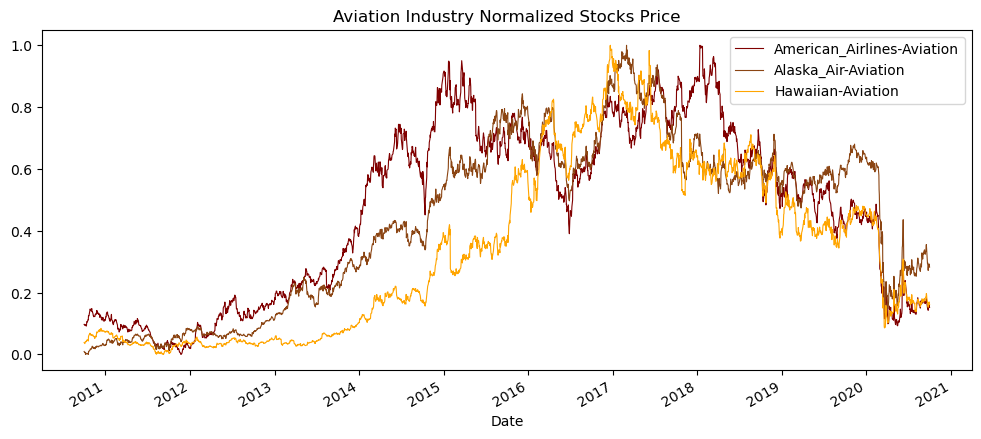

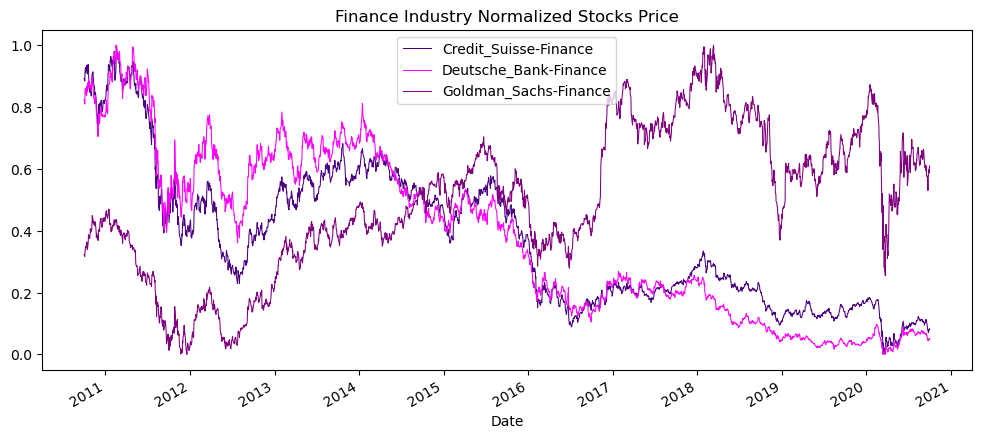

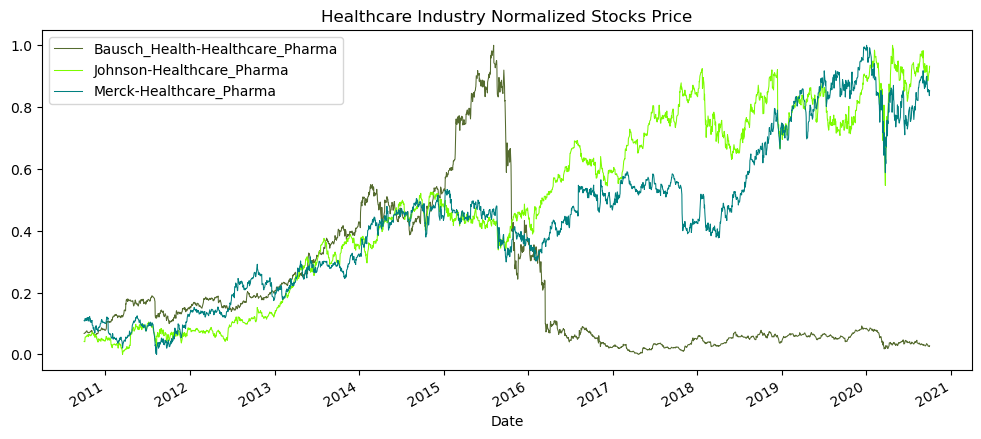

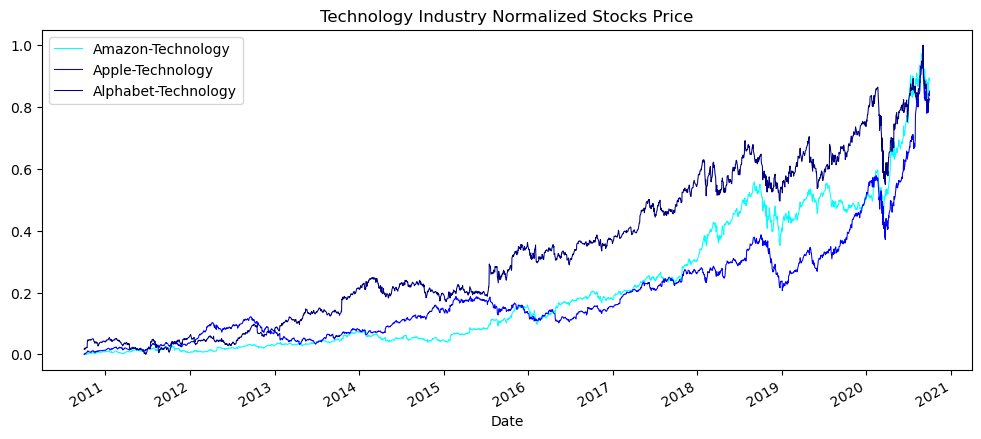

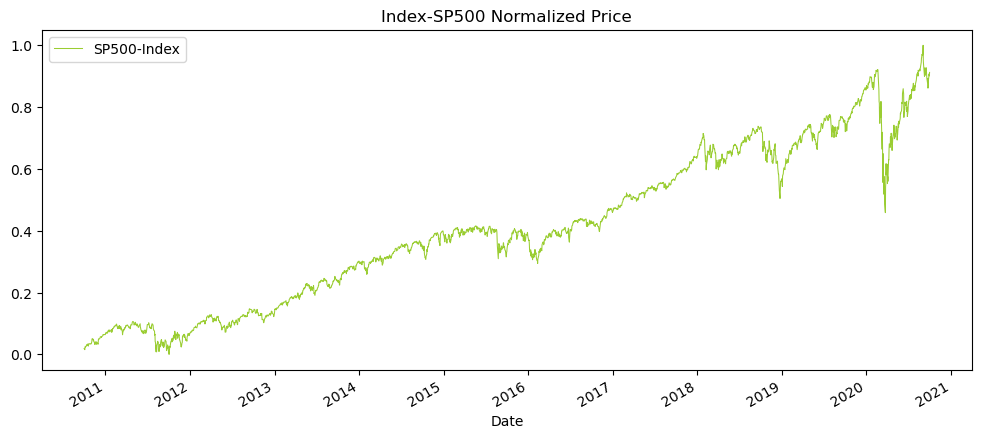

In [49]:
# Plot the actual prices of stocks- industrywise

# Plot the stocks of Aviation
normalized_prices[['American_Airlines-Aviation','Alaska_Air-Aviation',
        'Hawaiian-Aviation']].plot(subplots=False, title = 'Aviation Industry Normalized Stocks Price', 
                                   figsize=(12,5), linewidth = '0.80', color = ['Maroon','SaddleBrown','Orange'])

# Plot the stocks of Finance
normalized_prices[['Credit_Suisse-Finance','Deutsche_Bank-Finance',
        'Goldman_Sachs-Finance']].plot(subplots=False, title="Finance Industry Normalized Stocks Price", 
                                       figsize=(12,5), linewidth = '0.75', color = ['Indigo','Fuchsia','Purple'])

# Plot the stocks of Healthcare
normalized_prices[['Bausch_Health-Healthcare_Pharma','Johnson-Healthcare_Pharma',
        'Merck-Healthcare_Pharma']].plot(subplots=False, title="Healthcare Industry Normalized Stocks Price", 
                                         figsize=(12,5), linewidth = '0.75', color = ['DarkOliveGreen','LawnGreen','Teal'])

# Plot the stocks of Technology
normalized_prices[['Amazon-Technology', 'Apple-Technology', 
        'Alphabet-Technology']].plot(subplots=False, title="Technology Industry Normalized Stocks Price", 
                                     figsize=(12,5), linewidth = '0.75', color = ['Aqua','Blue','Navy'])

# Plot the stocks of Index
normalized_prices[['SP500-Index']].plot(subplots=False, title="Index-SP500 Normalized Price", 
                             figsize=(12,5), linewidth = '0.75', color = 'YellowGreen')

plt.show()

#### Observation:
- In aviation industry, all the three companies show a downtrend
- In healthcare - Jhonson &Jhonson and Bausche show uptrend
- In Finance - All three show downtrend; however the level of prices and the rate of downtrend vary. The price levels of Bausch is higher than the other two.
- In technology, all the three are showing an uptrend.

### 2.3.3 Relative Strength Index of Stocks: Stock Price with respect to Index
Its a composite index which helps to compare the movement of stock price with respect to the index

RSI = Price of Stock/Price of Index

In [50]:
# Calculate Relative strength index of each stock with respect to the Market index
rsi = prices.copy()
for column in rsi.columns:
    rsi[column] = rsi[column]/rsi['SP500-Index']

In [51]:
rsi.head()

Alaska_Air-Aviation  Alphabet-Technology  Amazon-Technology  \
Date                                                                      
2010-10-01             0.010859             0.228424           0.134099   
2010-10-04             0.010679             0.228842           0.136663   
2010-10-05             0.010523             0.230980           0.138591   
2010-10-06             0.010507             0.229469           0.133969   
2010-10-07             0.010038             0.227981           0.134941   

            American_Airlines-Aviation  Apple-Technology  \
Date                                                       
2010-10-01                    0.008105          0.008803   
2010-10-04                    0.008021          0.008752   
2010-10-05                    0.007952          0.008890   
2010-10-06                    0.007957          0.008904   
2010-10-07                    0.007979          0.008919   

            Bausch_Health-Healthcare_Pharma  Credit_Suisse-Finance  \
Date                                                                 
2010-10-01                         0.022465               0.036839   
2010-10-04                         0.022752               0.036863   
2010-10-05                         0.022658               0.037178   
2010-10-06                         0.023009               0.037447   
2010-10-07                         0.022969               0.037711   

            Deutsche_Bank-Finance  Goldman_Sachs-Finance  Hawaiian-Aviation  \
Date                                                                          
2010-10-01               0.045885               0.128856           0.005200   
2010-10-04               0.045518               0.128906           0.005057   
2010-10-05               0.046479               0.128856           0.005040   
2010-10-06               0.047078               0.130038           0.005147   
2010-10-07               0.046661               0.130485           0.005311   

            Johnson-Healthcare_Pharma  Merck-Healthcare_Pharma  SP500-Index  
Date                                                                         
2010-10-01                   0.053872                 0.031930          1.0  
2010-10-04                   0.054238                 0.032119          1.0  
2010-10-05                   0.054103                 0.031893          1.0  
2010-10-06                   0.054493                 0.031906          1.0  
2010-10-07                   0.054591                 0.031700          1.0

In [52]:
rsi.columns

Index(['Alaska_Air-Aviation', 'Alphabet-Technology', 'Amazon-Technology',
       'American_Airlines-Aviation', 'Apple-Technology',
       'Bausch_Health-Healthcare_Pharma', 'Credit_Suisse-Finance',
       'Deutsche_Bank-Finance', 'Goldman_Sachs-Finance', 'Hawaiian-Aviation',
       'Johnson-Healthcare_Pharma', 'Merck-Healthcare_Pharma', 'SP500-Index'],
      dtype='object')

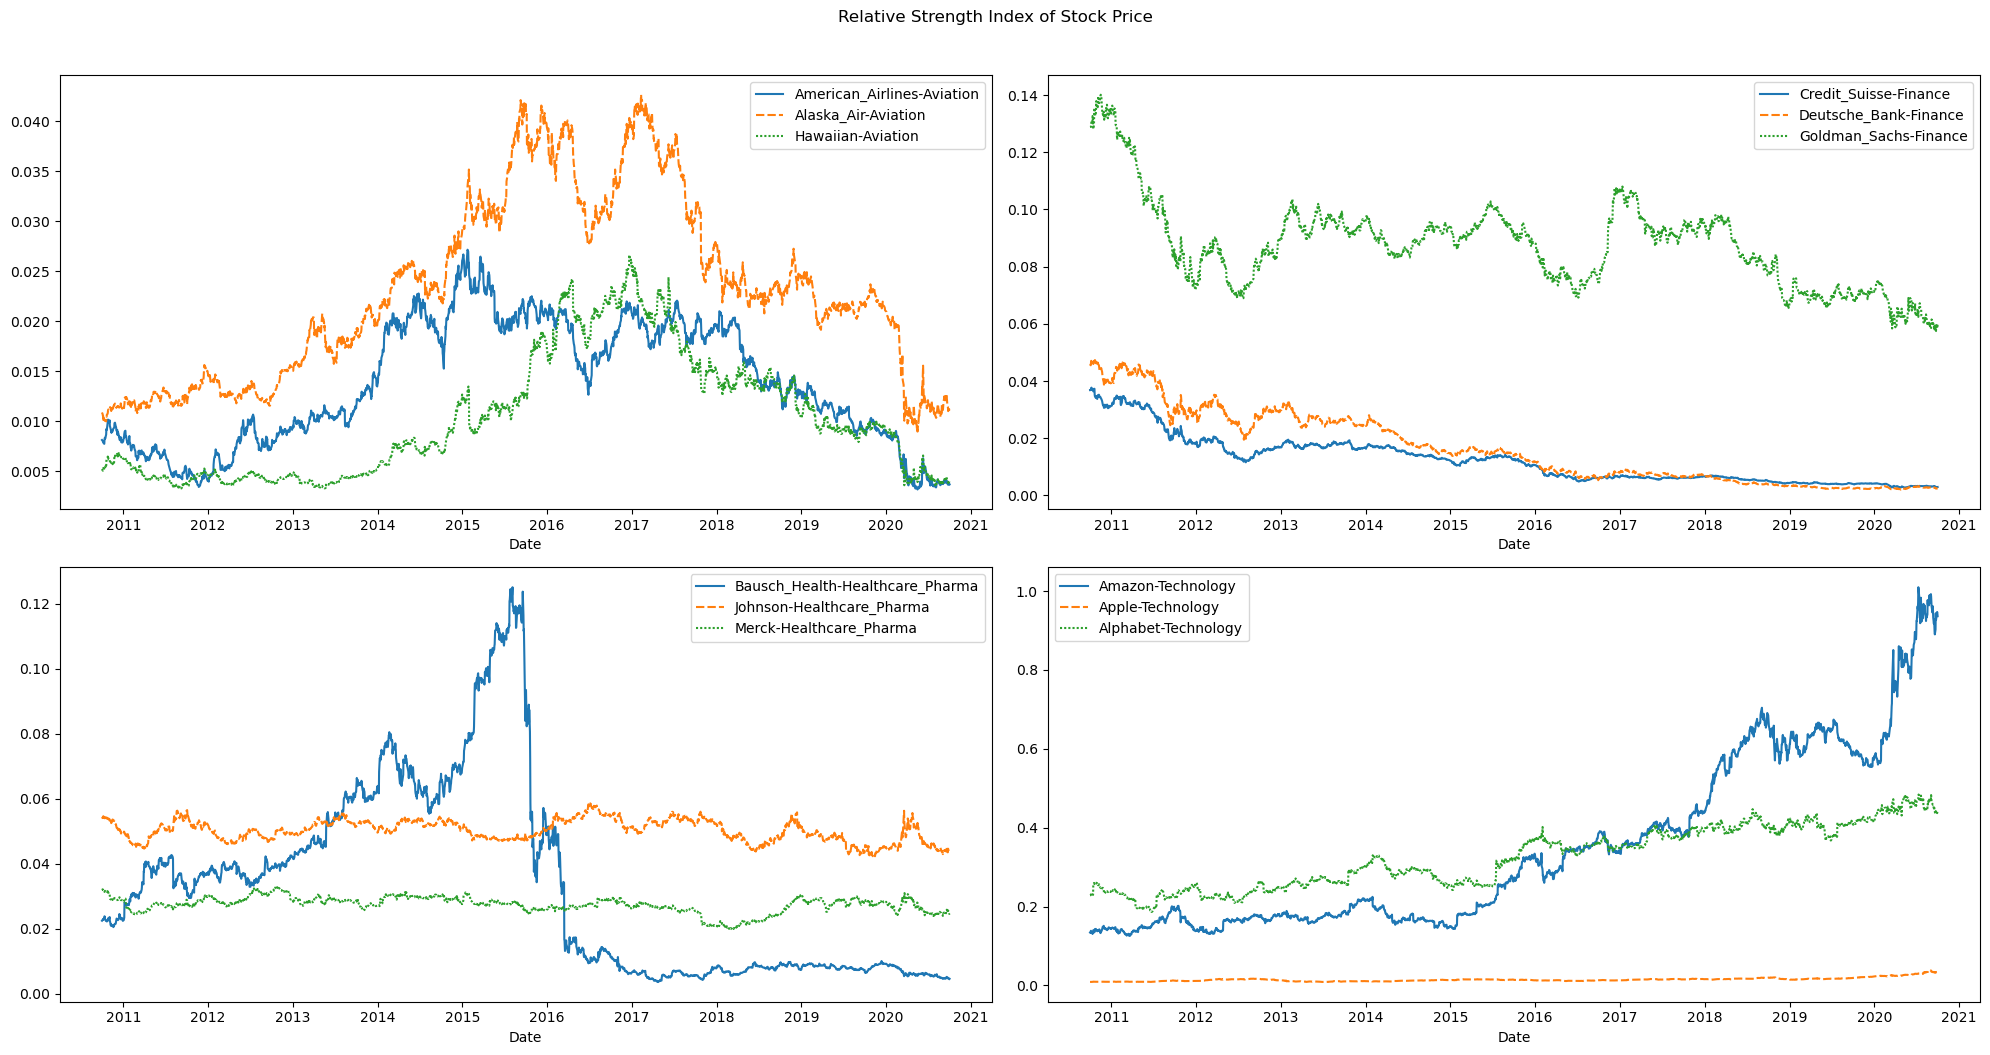

In [53]:
# Plotting the Relative Stock Price change 
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.lineplot(data = rsi[['American_Airlines-Aviation','Alaska_Air-Aviation','Hawaiian-Aviation']])
plt.legend(loc='best')
plt.tight_layout()
plt.subplot(2,2,2)
sns.lineplot(data = rsi[['Credit_Suisse-Finance','Deutsche_Bank-Finance','Goldman_Sachs-Finance']])
plt.tight_layout()
plt.subplot(2,2,3)
sns.lineplot(data = rsi[['Bausch_Health-Healthcare_Pharma','Johnson-Healthcare_Pharma','Merck-Healthcare_Pharma',]])
plt.legend(loc='best')
plt.tight_layout()
plt.subplot(2,2,4)
sns.lineplot(data = rsi[['Amazon-Technology','Apple-Technology', 'Alphabet-Technology']])
plt.legend(loc='best')
plt.tight_layout()
plt.suptitle("Relative Strength Index of Stock Price",y=1.05,)
plt.show()

#### Observation:
- The relative strength Index also confirms the earlier findings. The only industry in uptrend is Technology; Although their price levels are highly different
- In healthcare, J&J and Bausche move parallelly with the index.
- Stocks in Healthcare and Finance industry show a downtrend.

## 3. Stock anaysis to find most suitable stock
Analysis of stocks is done to select the stocks that are most suitable in line with the finanical goals of the client. The steps include, analysing the performance of each stock based on key metrics and selection of most suitable stocks to build portfolio.

### 3.1. Evaluate stocks based on key metrics of CAPM
The metrics include

- Daily returns
- Annulaized (daily)returns
- Cumulative returns
- Annualized Risk
- Sharpe Ratio
- Beta
- Expected Returns

### 3.1.1. Daily Return
This is the percentage change in the prices from previous day

In [54]:
daily_returns = prices.pct_change()

daily_returns = round((daily_returns[1:]*100),2)
daily_returns.head()

Alaska_Air-Aviation  Alphabet-Technology  Amazon-Technology  \
Date                                                                      
2010-10-04                -2.45                -0.62               1.09   
2010-10-05                 0.60                 3.04               3.53   
2010-10-06                -0.23                -0.72              -3.40   
2010-10-07                -4.62                -0.81               0.56   
2010-10-08                 3.63                 1.20              -0.46   

            American_Airlines-Aviation  Apple-Technology  \
Date                                                       
2010-10-04                       -1.83             -1.37   
2010-10-05                        1.21              3.70   
2010-10-06                        0.00              0.09   
2010-10-07                        0.11              0.01   
2010-10-08                       -1.84              1.68   

            Bausch_Health-Healthcare_Pharma  Credit_Suisse-Finance  \
Date                                                                 
2010-10-04                             0.47                  -0.74   
2010-10-05                             1.66                   2.96   
2010-10-06                             1.48                   0.66   
2010-10-07                            -0.34                   0.54   
2010-10-08                             0.90                  -1.57   

            Deutsche_Bank-Finance  Goldman_Sachs-Finance  Hawaiian-Aviation  \
Date                                                                          
2010-10-04                  -1.60                  -0.77              -3.52   
2010-10-05                   4.24                   2.05               1.74   
2010-10-06                   1.22                   0.85               2.05   
2010-10-07                  -1.05                   0.18               3.02   
2010-10-08                  -0.30                   1.03               0.00   

            Johnson-Healthcare_Pharma  Merck-Healthcare_Pharma  SP500-Index  
Date                                                                         
2010-10-04                      -0.13                    -0.22        -0.80  
2010-10-05                       1.83                     1.37         2.09  
2010-10-06                       0.65                    -0.03        -0.07  
2010-10-07                       0.02                    -0.81        -0.16  
2010-10-08                       0.02                     0.54         0.61

In [55]:
daily_returns.columns

Index(['Alaska_Air-Aviation', 'Alphabet-Technology', 'Amazon-Technology',
       'American_Airlines-Aviation', 'Apple-Technology',
       'Bausch_Health-Healthcare_Pharma', 'Credit_Suisse-Finance',
       'Deutsche_Bank-Finance', 'Goldman_Sachs-Finance', 'Hawaiian-Aviation',
       'Johnson-Healthcare_Pharma', 'Merck-Healthcare_Pharma', 'SP500-Index'],
      dtype='object')

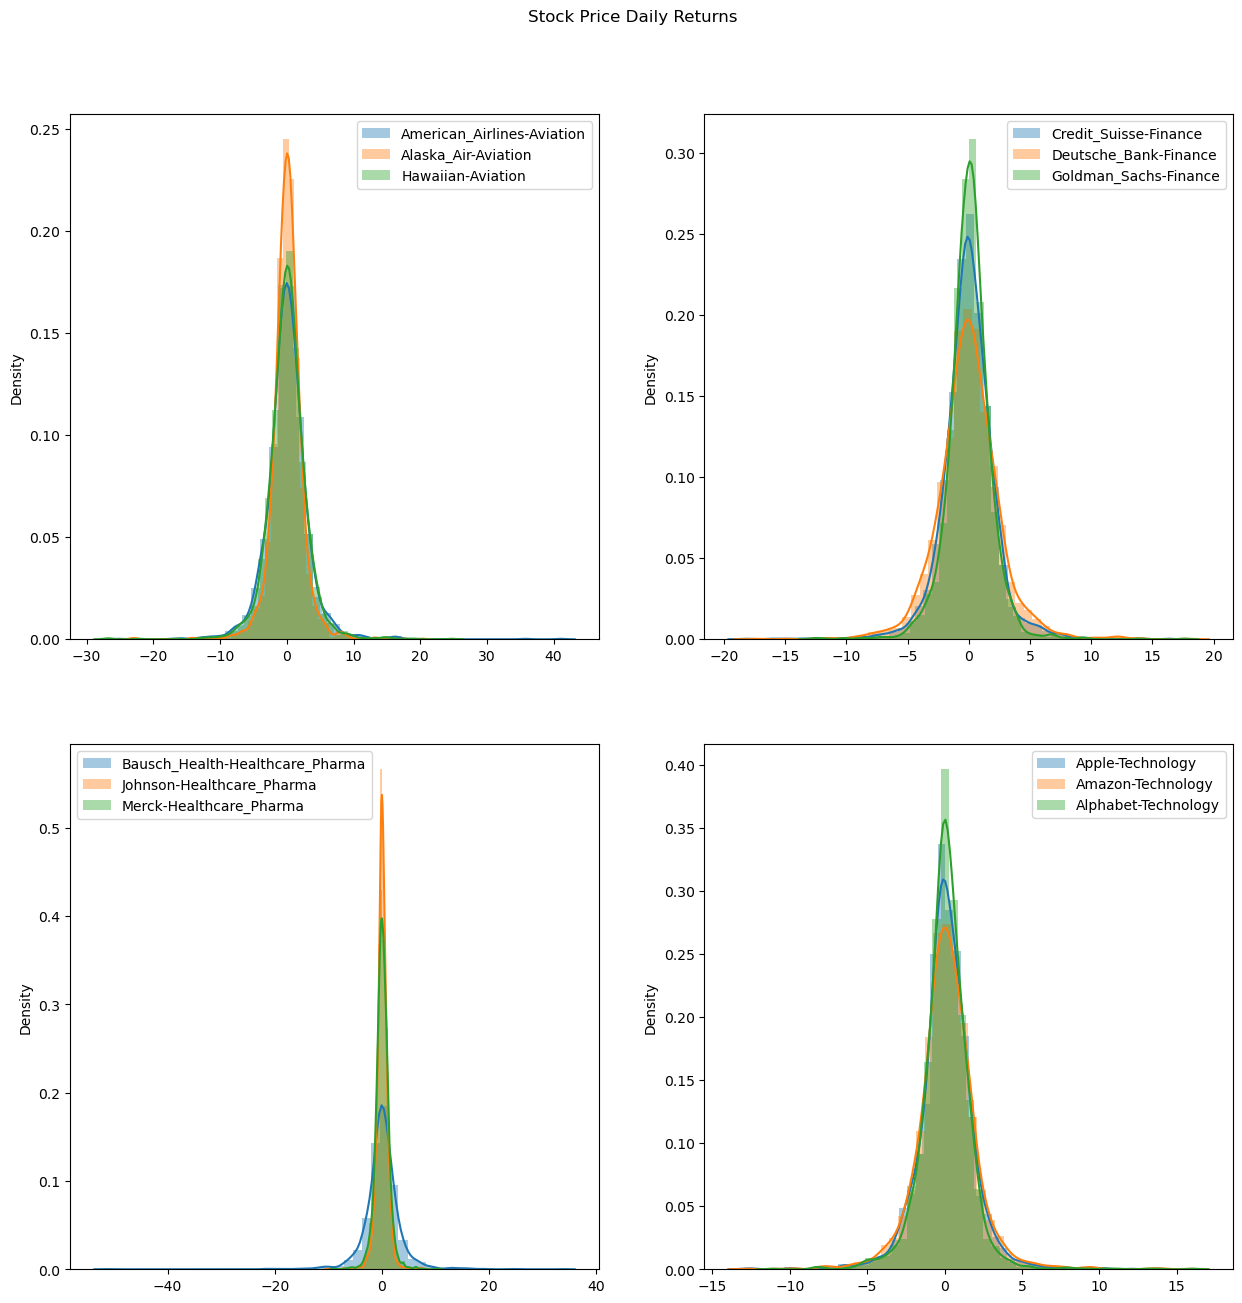

In [56]:
# Visualise the spread in daily return through histogram
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.distplot(daily_returns[['American_Airlines-Aviation']],hist=True,label='American_Airlines-Aviation')
sns.distplot(daily_returns[['Alaska_Air-Aviation']],hist=True,label="Alaska_Air-Aviation")
sns.distplot(daily_returns[['Hawaiian-Aviation']],hist=True,label="Hawaiian-Aviation")
plt.legend()
                            
plt.subplot(2,2,2)
sns.distplot(daily_returns[['Credit_Suisse-Finance']],hist=True,label="Credit_Suisse-Finance")
sns.distplot(daily_returns[['Deutsche_Bank-Finance']],hist=True,label="Deutsche_Bank-Finance")
sns.distplot(daily_returns[['Goldman_Sachs-Finance']],hist=True,label="Goldman_Sachs-Finance")
plt.legend()
                            
plt.subplot(2,2,3)
sns.distplot(daily_returns[['Bausch_Health-Healthcare_Pharma']],hist=True,label="Bausch_Health-Healthcare_Pharma")
sns.distplot(daily_returns[['Johnson-Healthcare_Pharma']],hist=True,label="Johnson-Healthcare_Pharma")
sns.distplot(daily_returns[['Merck-Healthcare_Pharma']],hist=True,label="Merck-Healthcare_Pharma")
plt.legend()

plt.subplot(2,2,4)
sns.distplot(daily_returns[['Apple-Technology']],hist=True,label="Apple-Technology")
sns.distplot(daily_returns[['Amazon-Technology']],hist=True,label="Amazon-Technology")
sns.distplot(daily_returns[['Alphabet-Technology']],hist=True,label="Alphabet-Technology")
plt.legend()
plt.suptitle("Stock Price Daily Returns",y=0.95)
plt.show()

In [57]:
# Relative Stock Price - Change in Stock Price wrt Index

AllStockvsIndex = prices.copy()
for column in AllStockvsIndex.columns:
    AllStockvsIndex[column] = AllStockvsIndex[column]/AllStockvsIndex['SP500-Index']

In [58]:
# Checking the data
AllStockvsIndex.head()

Alaska_Air-Aviation  Alphabet-Technology  Amazon-Technology  \
Date                                                                      
2010-10-01             0.010859             0.228424           0.134099   
2010-10-04             0.010679             0.228842           0.136663   
2010-10-05             0.010523             0.230980           0.138591   
2010-10-06             0.010507             0.229469           0.133969   
2010-10-07             0.010038             0.227981           0.134941   

            American_Airlines-Aviation  Apple-Technology  \
Date                                                       
2010-10-01                    0.008105          0.008803   
2010-10-04                    0.008021          0.008752   
2010-10-05                    0.007952          0.008890   
2010-10-06                    0.007957          0.008904   
2010-10-07                    0.007979          0.008919   

            Bausch_Health-Healthcare_Pharma  Credit_Suisse-Finance  \
Date                                                                 
2010-10-01                         0.022465               0.036839   
2010-10-04                         0.022752               0.036863   
2010-10-05                         0.022658               0.037178   
2010-10-06                         0.023009               0.037447   
2010-10-07                         0.022969               0.037711   

            Deutsche_Bank-Finance  Goldman_Sachs-Finance  Hawaiian-Aviation  \
Date                                                                          
2010-10-01               0.045885               0.128856           0.005200   
2010-10-04               0.045518               0.128906           0.005057   
2010-10-05               0.046479               0.128856           0.005040   
2010-10-06               0.047078               0.130038           0.005147   
2010-10-07               0.046661               0.130485           0.005311   

            Johnson-Healthcare_Pharma  Merck-Healthcare_Pharma  SP500-Index  
Date                                                                         
2010-10-01                   0.053872                 0.031930          1.0  
2010-10-04                   0.054238                 0.032119          1.0  
2010-10-05                   0.054103                 0.031893          1.0  
2010-10-06                   0.054493                 0.031906          1.0  
2010-10-07                   0.054591                 0.031700          1.0

Text(0.5, 1.05, 'Relative Stock Prices wrt Market Index')

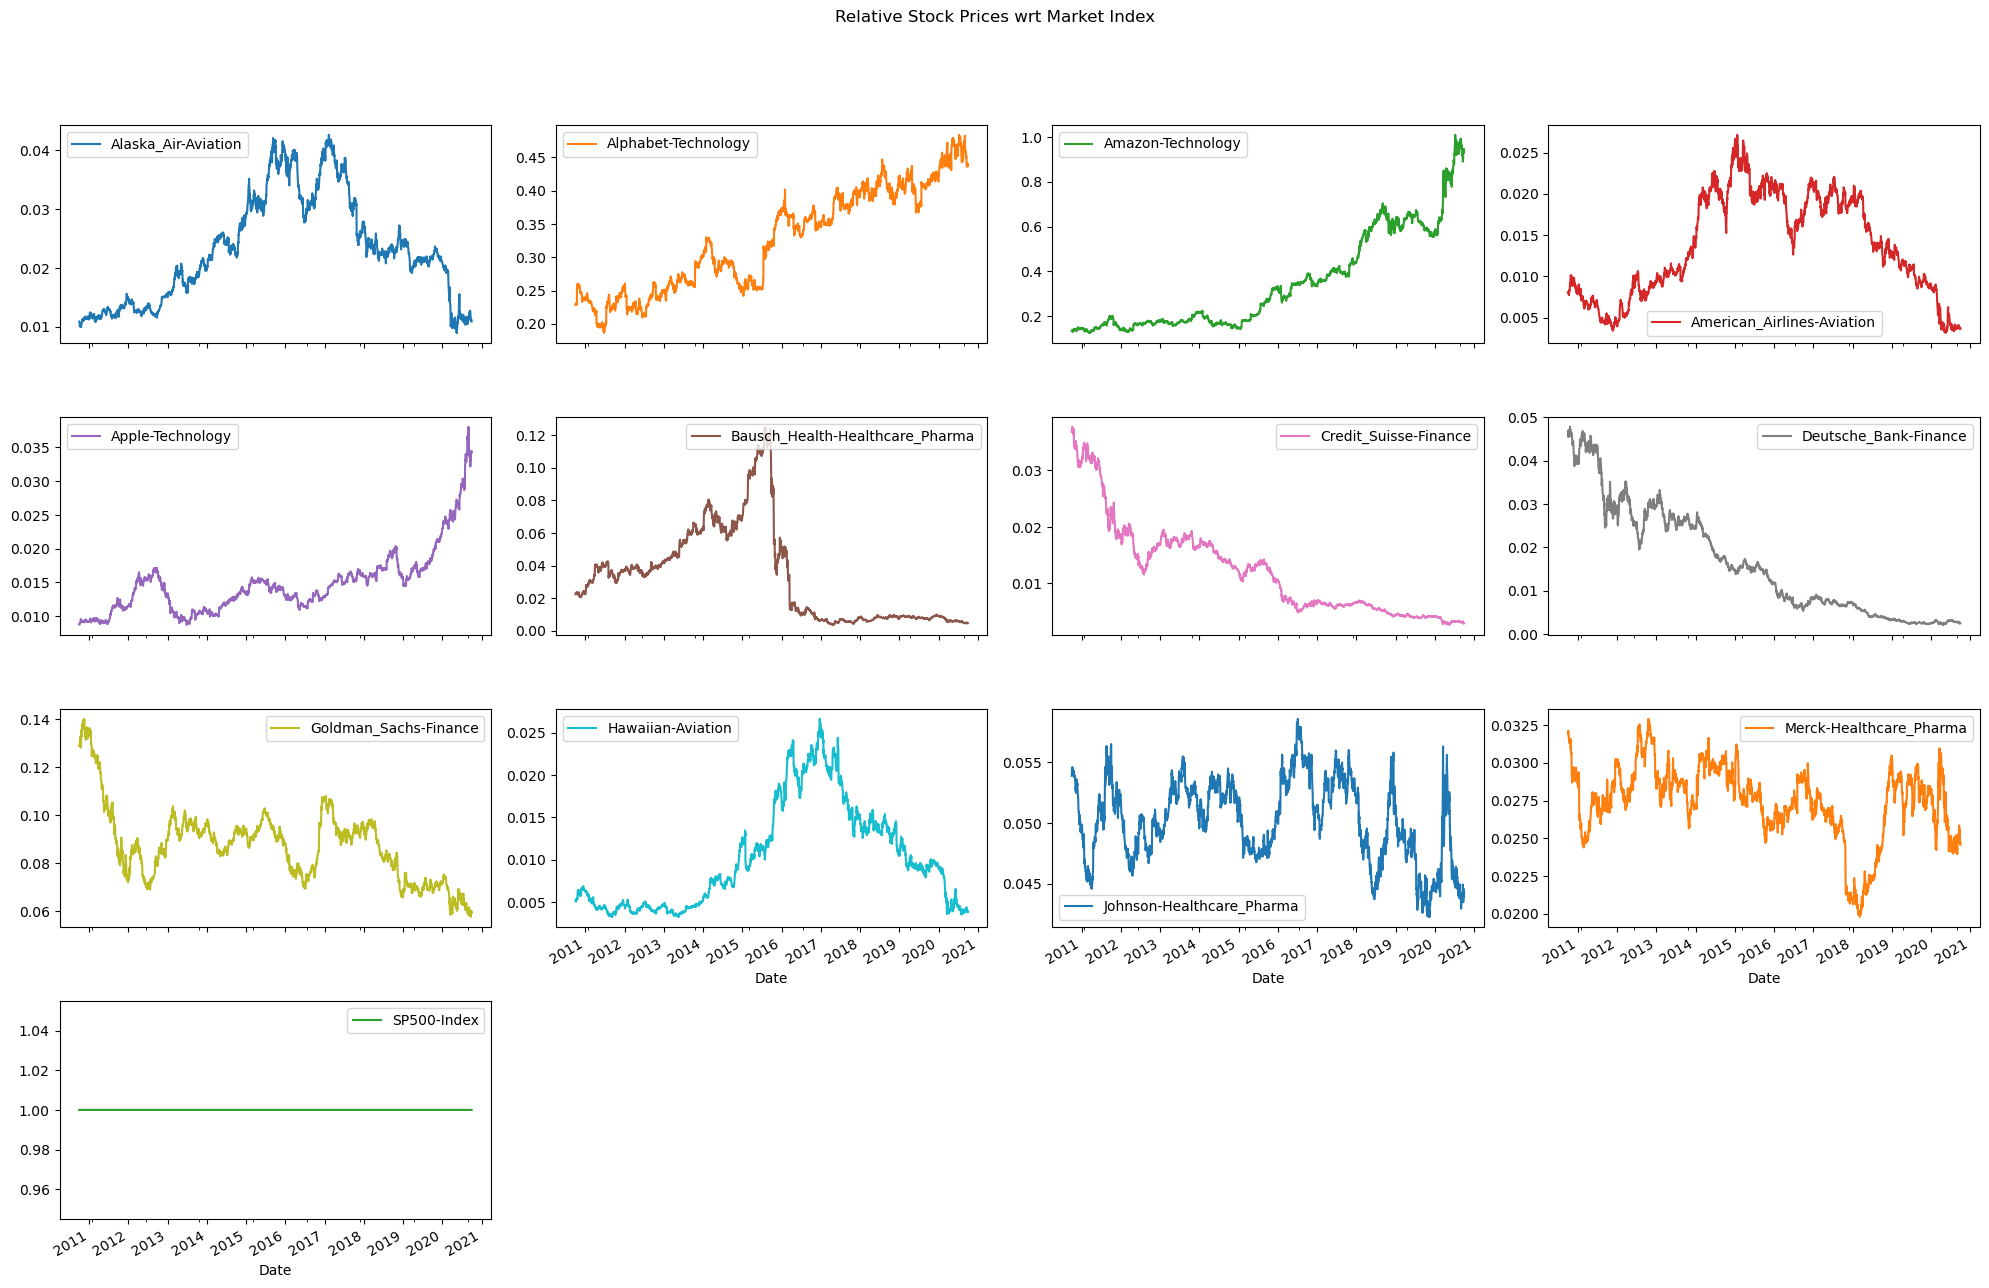

In [59]:
# Plotting the Relative Stock Price change 
AllStockvsIndex.plot(kind = 'line',subplots=True, layout = (7,4),figsize=(20,20))
plt.tight_layout()
plt.suptitle("Relative Stock Prices wrt Market Index",y=1.05)

#### Observation:
From the above table we can observe that the level of price variation each day. However,this won't be sufficient to draw any inference. Hence fro the daily returns, annualised daily returns need to be calculated for each stock.

### 3.1.2. Annualized (Daily) Returns
Steps include:

- Calculate the annualised daily return

Annualised daily return = Mean of daily returns *252; As the markets function for about 252 days in a year, this is taken for calculating the annualized daily return. 2. Create a new Risk-Return dataframe to store the result

In [60]:
#Calculating Annualized Returns

annualized_returns = []
col=[]

for i in daily_returns.columns:
    col.append(i)

for i in daily_returns.columns:
    annualized_returns.append(daily_returns[i].mean()*252)

In [61]:
# Creating a dataframe for mapping the risk return metrics of stocks
capm_df=pd.DataFrame(list(zip(col,annualized_returns)),columns =['Stocks', 'Annualized Returns'])

In [62]:
# Renaming the names of stocks
for i in capm_df.index:
    capm_df['Stocks'][i]=capm_df['Stocks'][i].replace("Close_","")

In [63]:
# Checking the data
capm_df['Annualized Returns']=round(capm_df['Annualized Returns'],2)
capm_df

Stocks  Annualized Returns
0               Alaska_Air-Aviation               17.87
1               Alphabet-Technology               20.60
2                 Amazon-Technology               35.22
3        American_Airlines-Aviation               16.03
4                  Apple-Technology               28.40
5   Bausch_Health-Healthcare_Pharma               11.71
6             Credit_Suisse-Finance               -8.19
7             Deutsche_Bank-Finance               -9.62
8             Goldman_Sachs-Finance                7.32
9                 Hawaiian-Aviation               19.29
10        Johnson-Healthcare_Pharma               10.30
11          Merck-Healthcare_Pharma               10.34
12                      SP500-Index               12.29

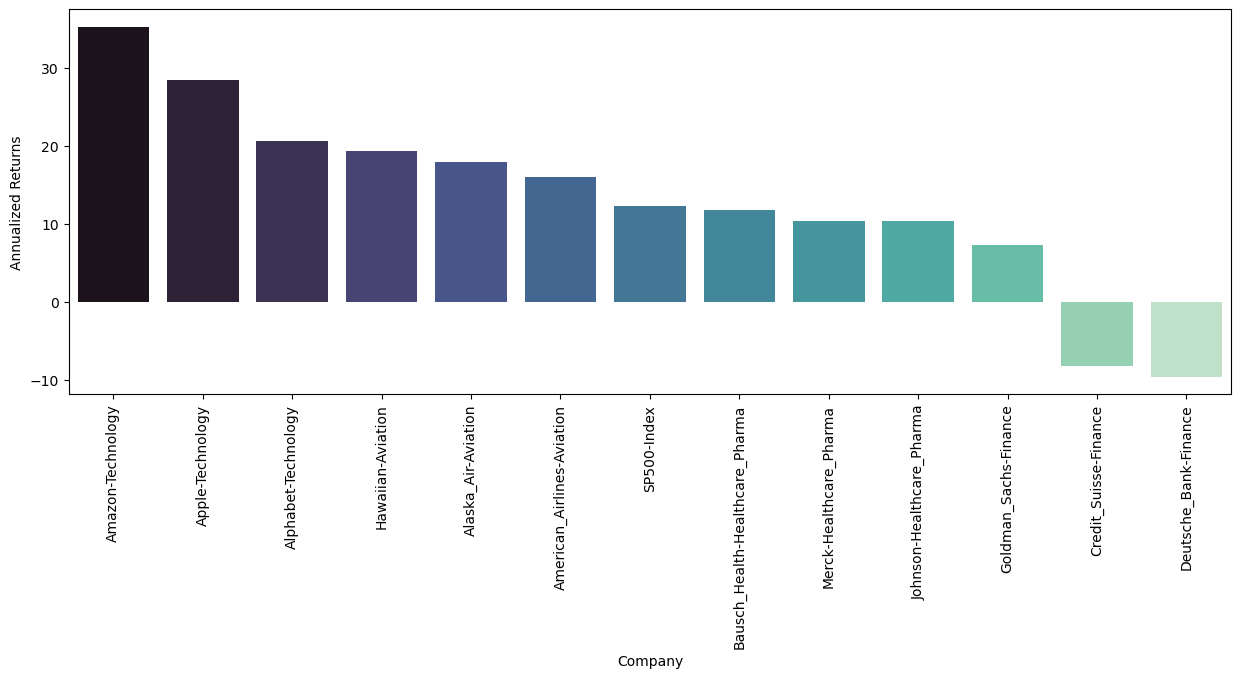

In [64]:
# Plot the Annualized (Daily) returns
plt.figure(figsize=[15,5])
sns.barplot(data=capm_df.sort_values("Annualized Returns", ascending=False),x="Stocks",y="Annualized Returns", palette='mako')
plt.xticks(rotation=90)
plt.xlabel('Company') 
plt.show()

#### Observation:
- All tech stocks have given positive returns; The highest returns have been from Amazon followed by Apple and then Google.These are the top three among the 12 stocks as well.
- Aviation stocks performed better next to tech companies; all are positve and above the SP500 index.
- In healthcare also all three stocks show positive annualised (daily) return; however, the returns are lesser than SP500.
- Under finance sector, except Goldman, the other two gave negative returns.

Next cumulative return from all the stocks for the entire perid need to be computed.

### 3.1.3. Cumulative Return
Steps include:

- Calculate the cumulative return

Cumulative return = ((Oldest price/Latest price)-1)*100 2. Add the result in the Risk-Return dataframe created already

In [65]:
#Calculating Cummulative_returns

cum_return =[]
for i in daily_returns.columns:
    cum_return.append(prices[i][-1]/prices[i][0]-1)

In [66]:
# Adding Cumulative_ret column to the dataframe
capm_df['Cumulative Return']= cum_return

capm_df['Cumulative Return']=round(capm_df['Cumulative Return'],4)*100

In [67]:
capm_df

Stocks  Annualized Returns  Cumulative Return
0               Alaska_Air-Aviation               17.87             194.28
1               Alphabet-Technology               20.60             461.28
2                 Amazon-Technology               35.22            1948.49
3        American_Airlines-Aviation               16.03              32.29
4                  Apple-Technology               28.40            1047.77
5   Bausch_Health-Healthcare_Pharma               11.71             -39.65
6             Credit_Suisse-Finance               -8.19             -76.39
7             Deutsche_Bank-Finance               -9.62             -84.03
8             Goldman_Sachs-Finance                7.32              36.07
9                 Hawaiian-Aviation               19.29             116.28
10        Johnson-Healthcare_Pharma               10.30             141.10
11          Merck-Healthcare_Pharma               10.34             126.64
12                      SP500-Index               12.29             193.39

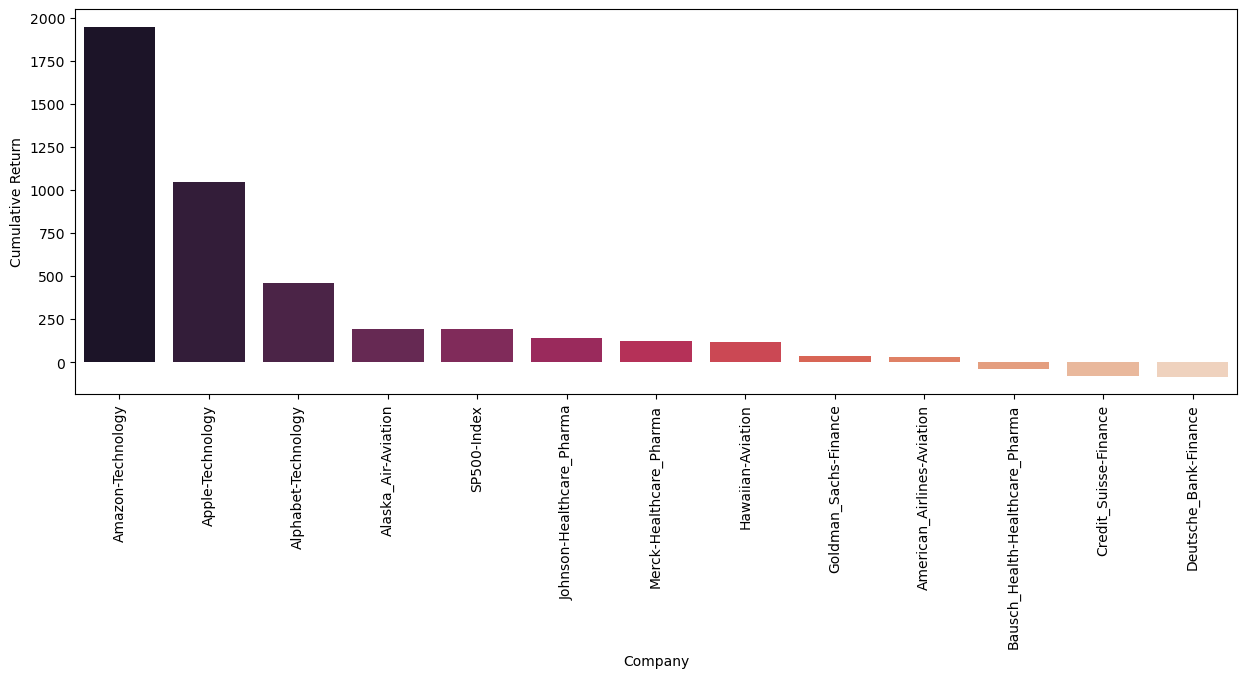

In [68]:
# Plot the Cumulative return of all the stocks
plt.figure(figsize=[15,5])
sns.barplot(data=capm_df.sort_values("Cumulative Return", ascending=False),x="Stocks",y="Cumulative Return", palette ='rocket')
plt.xticks(rotation=90)
plt.xlabel('Company') 
plt.show()

#### Observation:
- Highest cumulative returns have been provided by technology stocks.
- There are three stocks with negative returns two from finance and one from finance.
- To meet the investment goals of the client, we will not include any stocks giving negative returns in the portfolio.

### 3.1.4 Annualized Risk

The risk is measured by way of standard deviation. Although its viewed through describe function earlier, it needs to be worked out separately and appended with the Risk-Return dataframe.

Steps include,

- Calculate annualized risk
- Add the result in the Risk-Return dataframe

In [69]:
#Calculating Annualized_Risk
annualized_risk = []

for i in daily_returns.columns:
    annualized_risk.append(daily_returns[i].std()*np.sqrt(252))

In [70]:
# Adding Annualized Risk column to the dataframe
capm_df['Annualized Risk']= annualized_risk

capm_df['Annualized Risk']=round(capm_df['Annualized Risk'],2)

In [71]:
# Checking the data
capm_df

Stocks  Annualized Returns  Cumulative Return  \
0               Alaska_Air-Aviation               17.87             194.28   
1               Alphabet-Technology               20.60             461.28   
2                 Amazon-Technology               35.22            1948.49   
3        American_Airlines-Aviation               16.03              32.29   
4                  Apple-Technology               28.40            1047.77   
5   Bausch_Health-Healthcare_Pharma               11.71             -39.65   
6             Credit_Suisse-Finance               -8.19             -76.39   
7             Deutsche_Bank-Finance               -9.62             -84.03   
8             Goldman_Sachs-Finance                7.32              36.07   
9                 Hawaiian-Aviation               19.29             116.28   
10        Johnson-Healthcare_Pharma               10.30             141.10   
11          Merck-Healthcare_Pharma               10.34             126.64   
12                      SP500-Index               12.29             193.39   

    Annualized Risk  
0             37.40  
1             25.86  
2             31.57  
3             51.95  
4             28.13  
5             56.67  
6             35.25  
7             41.87  
8             29.10  
9             47.86  
10            17.22  
11            20.72  
12            17.36

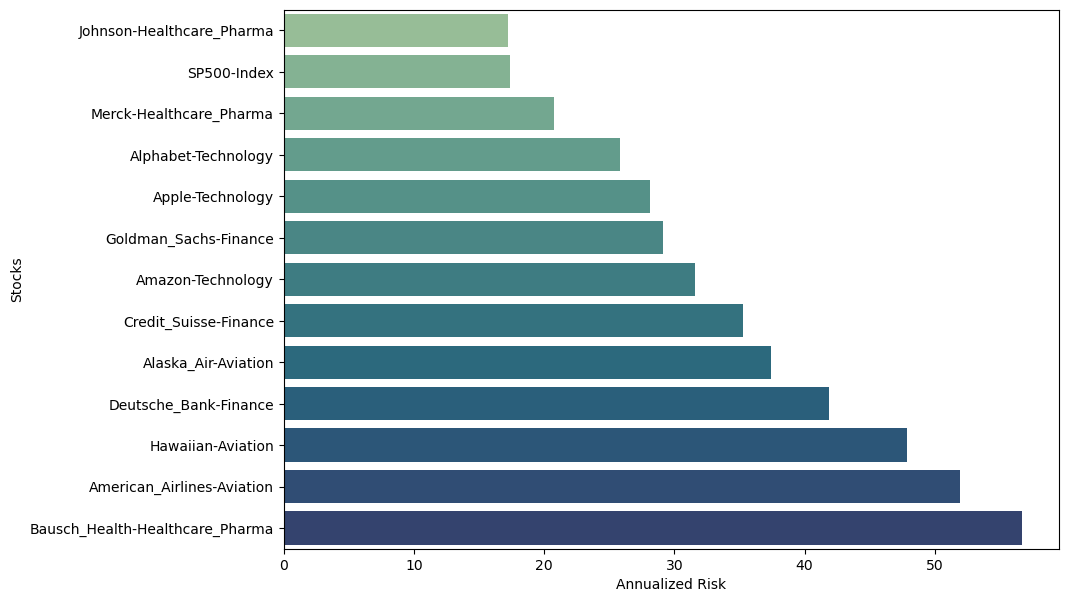

In [72]:
plt.figure(figsize=[10,7])
sns.barplot(data=capm_df.sort_values('Annualized Risk', ascending=True),x="Annualized Risk",y="Stocks", 
            label = 'Annualized Risk', palette='crest')
plt.xlabel('Annualized Risk') 
plt.show()


#### Observation:
- Risk is high among all the stocks of aviation industry.
- In Finance industry, all stocks are riskier than the index;
- Healthcare industry has the most risky and least risky stocks; Bausch is the riskiest among all the stocks in other industry as well while Jhonson &Jhonson is has the least annualised risk and the only stock which is less riskier than the index among all.
- All the three stocks in Technology industry stocks have moderate risk.

### 3.1.5. Sharpe Ratio

This is one of the key metric under Capital Asset Pricing model. This is a composite index that considers both risk as well as return of a stock. A Sharpe ratio of 1 and above is a good performance. Stocks with negative value must be avoided.

Steps include:

- Calculate the sharpe ratio
- Add the result in the Risk-Return dataframe

In [73]:
#Calculating Sharpe Ratio with a Risk Free Rate of Return of 0.75%
capm_df['Sharpe Ratio'] = round((capm_df['Annualized Returns']-0.0075)/capm_df['Annualized Risk'],2)

In [74]:
capm_df

Stocks  Annualized Returns  Cumulative Return  \
0               Alaska_Air-Aviation               17.87             194.28   
1               Alphabet-Technology               20.60             461.28   
2                 Amazon-Technology               35.22            1948.49   
3        American_Airlines-Aviation               16.03              32.29   
4                  Apple-Technology               28.40            1047.77   
5   Bausch_Health-Healthcare_Pharma               11.71             -39.65   
6             Credit_Suisse-Finance               -8.19             -76.39   
7             Deutsche_Bank-Finance               -9.62             -84.03   
8             Goldman_Sachs-Finance                7.32              36.07   
9                 Hawaiian-Aviation               19.29             116.28   
10        Johnson-Healthcare_Pharma               10.30             141.10   
11          Merck-Healthcare_Pharma               10.34             126.64   
12                      SP500-Index               12.29             193.39   

    Annualized Risk  Sharpe Ratio  
0             37.40          0.48  
1             25.86          0.80  
2             31.57          1.12  
3             51.95          0.31  
4             28.13          1.01  
5             56.67          0.21  
6             35.25         -0.23  
7             41.87         -0.23  
8             29.10          0.25  
9             47.86          0.40  
10            17.22          0.60  
11            20.72          0.50  
12            17.36          0.71

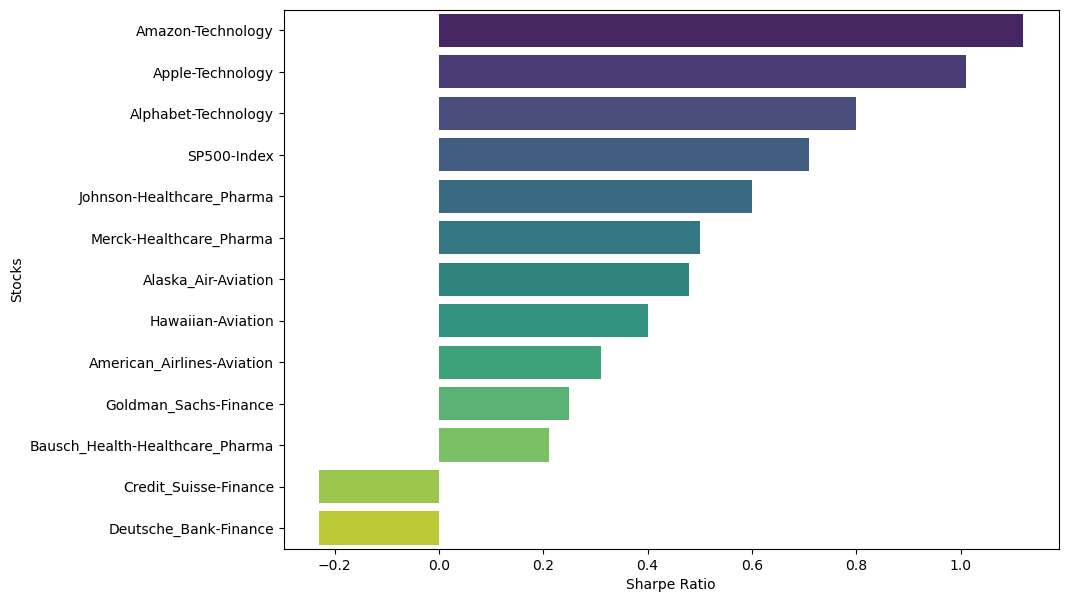

In [75]:
# Plot the Annualized Risk of all the stocks

plt.figure(figsize=[10,7])
sns.barplot(data=capm_df.sort_values('Sharpe Ratio', ascending=False),x="Sharpe Ratio",y="Stocks", 
            label = 'Sharpe Ratio', palette='viridis')
plt.xlabel('Sharpe Ratio') 
plt.show()

### 3.1.6. Beta for the stocks
Beta is a measure of voltility. It indicates how much the price of a stock tends to fluctuate up and down compared to market.

It helps to determine the expected return from the stock.

In [76]:
Beta=[]
for i in range (0,13):

    def find_beta(df):
        np_array = df.values
        m = np_array[:,9] # market returns are column zero from numpy array
        s = np_array[:,i] # stock returns are column one from numpy array
        covariance = np.cov(s,m) # Calculate covariance between stock and market
        beta = covariance[0,1]/covariance[1,1]
        return Beta.append(beta)
    find_beta(daily_returns)

In [77]:
Beta = pd.DataFrame(Beta, index =daily_returns.columns.values,columns =['Beta'])
Beta

Beta
Alaska_Air-Aviation              0.498565
Alphabet-Technology              0.140511
Amazon-Technology                0.128986
American_Airlines-Aviation       0.663337
Apple-Technology                 0.152948
Bausch_Health-Healthcare_Pharma  0.236193
Credit_Suisse-Finance            0.257315
Deutsche_Bank-Finance            0.306614
Goldman_Sachs-Finance            0.259760
Hawaiian-Aviation                1.000000
Johnson-Healthcare_Pharma        0.086496
Merck-Healthcare_Pharma          0.100919
SP500-Index                      0.162274

In [78]:
Beta_reset = Beta.reset_index()

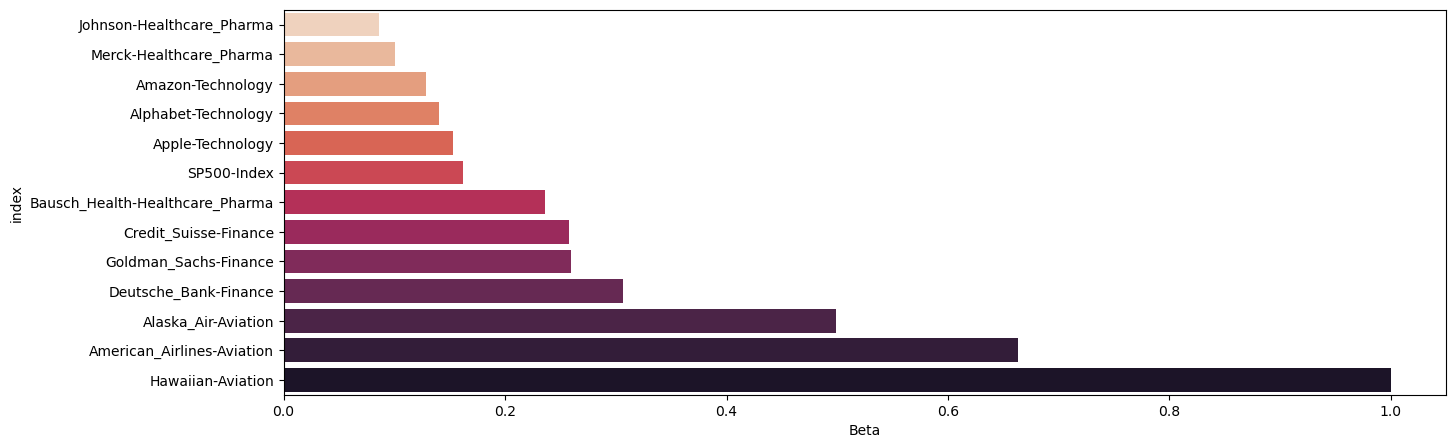

In [79]:
plt.figure(figsize=[15,5])
sns.barplot(data=Beta_reset.sort_values('Beta', ascending=True),x="Beta",y="index", label = 'Beta', palette ='rocket_r')
plt.xlabel('Beta') 
plt.show()

In [80]:
capm_df

Stocks  Annualized Returns  Cumulative Return  \
0               Alaska_Air-Aviation               17.87             194.28   
1               Alphabet-Technology               20.60             461.28   
2                 Amazon-Technology               35.22            1948.49   
3        American_Airlines-Aviation               16.03              32.29   
4                  Apple-Technology               28.40            1047.77   
5   Bausch_Health-Healthcare_Pharma               11.71             -39.65   
6             Credit_Suisse-Finance               -8.19             -76.39   
7             Deutsche_Bank-Finance               -9.62             -84.03   
8             Goldman_Sachs-Finance                7.32              36.07   
9                 Hawaiian-Aviation               19.29             116.28   
10        Johnson-Healthcare_Pharma               10.30             141.10   
11          Merck-Healthcare_Pharma               10.34             126.64   
12                      SP500-Index               12.29             193.39   

    Annualized Risk  Sharpe Ratio  
0             37.40          0.48  
1             25.86          0.80  
2             31.57          1.12  
3             51.95          0.31  
4             28.13          1.01  
5             56.67          0.21  
6             35.25         -0.23  
7             41.87         -0.23  
8             29.10          0.25  
9             47.86          0.40  
10            17.22          0.60  
11            20.72          0.50  
12            17.36          0.71

In [81]:
capm_df=capm_df.set_index('Stocks')

In [82]:
capm_df

Annualized Returns  Cumulative Return  \
Stocks                                                                   
Alaska_Air-Aviation                           17.87             194.28   
Alphabet-Technology                           20.60             461.28   
Amazon-Technology                             35.22            1948.49   
American_Airlines-Aviation                    16.03              32.29   
Apple-Technology                              28.40            1047.77   
Bausch_Health-Healthcare_Pharma               11.71             -39.65   
Credit_Suisse-Finance                         -8.19             -76.39   
Deutsche_Bank-Finance                         -9.62             -84.03   
Goldman_Sachs-Finance                          7.32              36.07   
Hawaiian-Aviation                             19.29             116.28   
Johnson-Healthcare_Pharma                     10.30             141.10   
Merck-Healthcare_Pharma                       10.34             126.64   
SP500-Index                                   12.29             193.39   

                                 Annualized Risk  Sharpe Ratio  
Stocks                                                          
Alaska_Air-Aviation                        37.40          0.48  
Alphabet-Technology                        25.86          0.80  
Amazon-Technology                          31.57          1.12  
American_Airlines-Aviation                 51.95          0.31  
Apple-Technology                           28.13          1.01  
Bausch_Health-Healthcare_Pharma            56.67          0.21  
Credit_Suisse-Finance                      35.25         -0.23  
Deutsche_Bank-Finance                      41.87         -0.23  
Goldman_Sachs-Finance                      29.10          0.25  
Hawaiian-Aviation                          47.86          0.40  
Johnson-Healthcare_Pharma                  17.22          0.60  
Merck-Healthcare_Pharma                    20.72          0.50  
SP500-Index                                17.36          0.71

In [83]:
capm_df=pd.concat([capm_df, Beta['Beta']], axis=1)
capm_df

Annualized Returns  Cumulative Return  \
Alaska_Air-Aviation                           17.87             194.28   
Alphabet-Technology                           20.60             461.28   
Amazon-Technology                             35.22            1948.49   
American_Airlines-Aviation                    16.03              32.29   
Apple-Technology                              28.40            1047.77   
Bausch_Health-Healthcare_Pharma               11.71             -39.65   
Credit_Suisse-Finance                         -8.19             -76.39   
Deutsche_Bank-Finance                         -9.62             -84.03   
Goldman_Sachs-Finance                          7.32              36.07   
Hawaiian-Aviation                             19.29             116.28   
Johnson-Healthcare_Pharma                     10.30             141.10   
Merck-Healthcare_Pharma                       10.34             126.64   
SP500-Index                                   12.29             193.39   

                                 Annualized Risk  Sharpe Ratio      Beta  
Alaska_Air-Aviation                        37.40          0.48  0.498565  
Alphabet-Technology                        25.86          0.80  0.140511  
Amazon-Technology                          31.57          1.12  0.128986  
American_Airlines-Aviation                 51.95          0.31  0.663337  
Apple-Technology                           28.13          1.01  0.152948  
Bausch_Health-Healthcare_Pharma            56.67          0.21  0.236193  
Credit_Suisse-Finance                      35.25         -0.23  0.257315  
Deutsche_Bank-Finance                      41.87         -0.23  0.306614  
Goldman_Sachs-Finance                      29.10          0.25  0.259760  
Hawaiian-Aviation                          47.86          0.40  1.000000  
Johnson-Healthcare_Pharma                  17.22          0.60  0.086496  
Merck-Healthcare_Pharma                    20.72          0.50  0.100919  
SP500-Index                                17.36          0.71  0.162274

#### Observation:
- Less volatile stocks (Beta <1) : Majorly all stocks show lesser volatility. However, <b>Alaska_Air, American_Airlines, Bausch_Health, Credit_Suisse, Deutsche_Bank, Goldman_Sachs, Hawaiian, Johnson, and Merck</b> than the market
- High volatile stocks (Beta >1) : Apple and Amazon shows higher volatility. However, <b>Apple, Amazon and Google</b> are only marginally higher than the market volatility.

### 3.1.7. Expected Returns
Expected Return = Risk free return +Beta * (Market retun - Risk free return)

In [84]:
rm=capm_df['Annualized Returns'].iloc[-4]

In [85]:
# Create a column for expected return
capm_df['Expected Return'] = 0.75+capm_df['Beta']*(rm-0.75)

In [86]:
capm_df

Annualized Returns  Cumulative Return  \
Alaska_Air-Aviation                           17.87             194.28   
Alphabet-Technology                           20.60             461.28   
Amazon-Technology                             35.22            1948.49   
American_Airlines-Aviation                    16.03              32.29   
Apple-Technology                              28.40            1047.77   
Bausch_Health-Healthcare_Pharma               11.71             -39.65   
Credit_Suisse-Finance                         -8.19             -76.39   
Deutsche_Bank-Finance                         -9.62             -84.03   
Goldman_Sachs-Finance                          7.32              36.07   
Hawaiian-Aviation                             19.29             116.28   
Johnson-Healthcare_Pharma                     10.30             141.10   
Merck-Healthcare_Pharma                       10.34             126.64   
SP500-Index                                   12.29             193.39   

                                 Annualized Risk  Sharpe Ratio      Beta  \
Alaska_Air-Aviation                        37.40          0.48  0.498565   
Alphabet-Technology                        25.86          0.80  0.140511   
Amazon-Technology                          31.57          1.12  0.128986   
American_Airlines-Aviation                 51.95          0.31  0.663337   
Apple-Technology                           28.13          1.01  0.152948   
Bausch_Health-Healthcare_Pharma            56.67          0.21  0.236193   
Credit_Suisse-Finance                      35.25         -0.23  0.257315   
Deutsche_Bank-Finance                      41.87         -0.23  0.306614   
Goldman_Sachs-Finance                      29.10          0.25  0.259760   
Hawaiian-Aviation                          47.86          0.40  1.000000   
Johnson-Healthcare_Pharma                  17.22          0.60  0.086496   
Merck-Healthcare_Pharma                    20.72          0.50  0.100919   
SP500-Index                                17.36          0.71  0.162274   

                                 Expected Return  
Alaska_Air-Aviation                     9.993394  
Alphabet-Technology                     3.355081  
Amazon-Technology                       3.141409  
American_Airlines-Aviation             13.048266  
Apple-Technology                        3.585651  
Bausch_Health-Healthcare_Pharma         5.129012  
Credit_Suisse-Finance                   5.520612  
Deutsche_Bank-Finance                   6.434632  
Goldman_Sachs-Finance                   5.565955  
Hawaiian-Aviation                      19.290000  
Johnson-Healthcare_Pharma               2.353634  
Merck-Healthcare_Pharma                 2.621033  
SP500-Index                             3.758567

In [87]:
# Plot the Expected Return of all the stocks
capm_df=capm_df.reset_index()

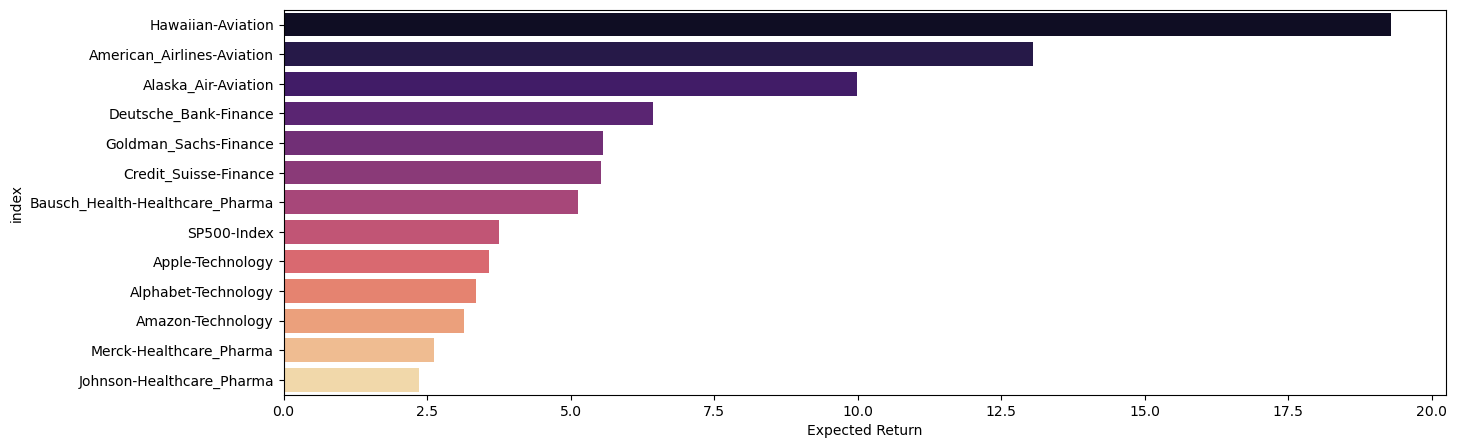

In [88]:
plt.figure(figsize=[15,5])
sns.barplot(data=capm_df.sort_values('Expected Return', ascending=False),x="Expected Return",y="index", 
            label = 'Expected Return', palette ='magma')
plt.xlabel('Expected Return') 
plt.show()

In [89]:
capm_df.to_csv('capm1.csv')

#### Now that we have completed the analysis of stocks using key metrics of CAPM, we need to proceed with building appropriate portfolio based on the need of the client after scrutizing each stock based on these metrics.

### 3.2. Select stocks and Build portfolio
Portfolio needs to be built according to the persona and business goals of the client. This include:

- Alexandra is a daughter of Ukranian business tycoon and is studying in a college in the US.
- Intends to form an NGO later with friends and refused to take money from parents for this purpose.
- Has huge savings from the money sent by parents but doesn’t disclose how much
- Wants to invest the money during her college and use the matured amount for the NGO
- She is a conservative investor and wants to invest in stocks that gives good returns but are also stable
- She is an active investor and wants a comprehensive report on all the metrics used to devise the investment strategy

We may have to assume the following:

- Let the investment amount be 500000 USD
- Let's assume she is in the first year of her 3 year degree; hence her investment term can be 3 years.

Considering the above, we need to build a portfolio consisting of stocks with good returns and low to moderate risk that are less volatile.

### 3.2.1. Selection of stocks for the portfolio
We set the following criteria for selection of stocks for the portfolio:

- Stocks with positive annualized returns
- Positive cumulative returns
- Sharpe Ratio more than Index
- Beta on par with the Market index
- Stocks with positive expected returns

In [90]:
capm_df=capm_df.reset_index()

In [91]:
capm_df

level_0                            index  Annualized Returns  \
0         0              Alaska_Air-Aviation               17.87   
1         1              Alphabet-Technology               20.60   
2         2                Amazon-Technology               35.22   
3         3       American_Airlines-Aviation               16.03   
4         4                 Apple-Technology               28.40   
5         5  Bausch_Health-Healthcare_Pharma               11.71   
6         6            Credit_Suisse-Finance               -8.19   
7         7            Deutsche_Bank-Finance               -9.62   
8         8            Goldman_Sachs-Finance                7.32   
9         9                Hawaiian-Aviation               19.29   
10       10        Johnson-Healthcare_Pharma               10.30   
11       11          Merck-Healthcare_Pharma               10.34   
12       12                      SP500-Index               12.29   

    Cumulative Return  Annualized Risk  Sharpe Ratio      Beta  \
0              194.28            37.40          0.48  0.498565   
1              461.28            25.86          0.80  0.140511   
2             1948.49            31.57          1.12  0.128986   
3               32.29            51.95          0.31  0.663337   
4             1047.77            28.13          1.01  0.152948   
5              -39.65            56.67          0.21  0.236193   
6              -76.39            35.25         -0.23  0.257315   
7              -84.03            41.87         -0.23  0.306614   
8               36.07            29.10          0.25  0.259760   
9              116.28            47.86          0.40  1.000000   
10             141.10            17.22          0.60  0.086496   
11             126.64            20.72          0.50  0.100919   
12             193.39            17.36          0.71  0.162274   

    Expected Return  
0          9.993394  
1          3.355081  
2          3.141409  
3         13.048266  
4          3.585651  
5          5.129012  
6          5.520612  
7          6.434632  
8          5.565955  
9         19.290000  
10         2.353634  
11         2.621033  
12         3.758567

In [92]:
# Dropping the Stocks having negetive Annualized returns
portfolio=capm_df.loc[(capm_df['Annualized Returns'] > 0.0)]
portfolio

level_0                            index  Annualized Returns  \
0         0              Alaska_Air-Aviation               17.87   
1         1              Alphabet-Technology               20.60   
2         2                Amazon-Technology               35.22   
3         3       American_Airlines-Aviation               16.03   
4         4                 Apple-Technology               28.40   
5         5  Bausch_Health-Healthcare_Pharma               11.71   
8         8            Goldman_Sachs-Finance                7.32   
9         9                Hawaiian-Aviation               19.29   
10       10        Johnson-Healthcare_Pharma               10.30   
11       11          Merck-Healthcare_Pharma               10.34   
12       12                      SP500-Index               12.29   

    Cumulative Return  Annualized Risk  Sharpe Ratio      Beta  \
0              194.28            37.40          0.48  0.498565   
1              461.28            25.86          0.80  0.140511   
2             1948.49            31.57          1.12  0.128986   
3               32.29            51.95          0.31  0.663337   
4             1047.77            28.13          1.01  0.152948   
5              -39.65            56.67          0.21  0.236193   
8               36.07            29.10          0.25  0.259760   
9              116.28            47.86          0.40  1.000000   
10             141.10            17.22          0.60  0.086496   
11             126.64            20.72          0.50  0.100919   
12             193.39            17.36          0.71  0.162274   

    Expected Return  
0          9.993394  
1          3.355081  
2          3.141409  
3         13.048266  
4          3.585651  
5          5.129012  
8          5.565955  
9         19.290000  
10         2.353634  
11         2.621033  
12         3.758567

In [93]:
# Dropping the Stocks having negetive Cummulative returns
portfolio=portfolio.loc[(portfolio ['Cumulative Return'] > 0)]
portfolio

level_0                       index  Annualized Returns  \
0         0         Alaska_Air-Aviation               17.87   
1         1         Alphabet-Technology               20.60   
2         2           Amazon-Technology               35.22   
3         3  American_Airlines-Aviation               16.03   
4         4            Apple-Technology               28.40   
8         8       Goldman_Sachs-Finance                7.32   
9         9           Hawaiian-Aviation               19.29   
10       10   Johnson-Healthcare_Pharma               10.30   
11       11     Merck-Healthcare_Pharma               10.34   
12       12                 SP500-Index               12.29   

    Cumulative Return  Annualized Risk  Sharpe Ratio      Beta  \
0              194.28            37.40          0.48  0.498565   
1              461.28            25.86          0.80  0.140511   
2             1948.49            31.57          1.12  0.128986   
3               32.29            51.95          0.31  0.663337   
4             1047.77            28.13          1.01  0.152948   
8               36.07            29.10          0.25  0.259760   
9              116.28            47.86          0.40  1.000000   
10             141.10            17.22          0.60  0.086496   
11             126.64            20.72          0.50  0.100919   
12             193.39            17.36          0.71  0.162274   

    Expected Return  
0          9.993394  
1          3.355081  
2          3.141409  
3         13.048266  
4          3.585651  
8          5.565955  
9         19.290000  
10         2.353634  
11         2.621033  
12         3.758567

In [94]:
# Dropping the Stocks having Sharpe Ratio more than index (S&P500)
sharpe_index=portfolio['Sharpe Ratio'].iloc[-1]
portfolio=capm_df.loc[(capm_df['Sharpe Ratio'] > sharpe_index)]
portfolio

level_0                index  Annualized Returns  Cumulative Return  \
1        1  Alphabet-Technology               20.60             461.28   
2        2    Amazon-Technology               35.22            1948.49   
4        4     Apple-Technology               28.40            1047.77   

   Annualized Risk  Sharpe Ratio      Beta  Expected Return  
1            25.86          0.80  0.140511         3.355081  
2            31.57          1.12  0.128986         3.141409  
4            28.13          1.01  0.152948         3.585651

In [95]:
portfolio.columns

Index(['level_0', 'index', 'Annualized Returns', 'Cumulative Return',
       'Annualized Risk', 'Sharpe Ratio', 'Beta', 'Expected Return'],
      dtype='object')

In [96]:
portfolio.drop(['level_0'], axis=1)

index  Annualized Returns  Cumulative Return  \
1  Alphabet-Technology               20.60             461.28   
2    Amazon-Technology               35.22            1948.49   
4     Apple-Technology               28.40            1047.77   

   Annualized Risk  Sharpe Ratio      Beta  Expected Return  
1            25.86          0.80  0.140511         3.355081  
2            31.57          1.12  0.128986         3.141409  
4            28.13          1.01  0.152948         3.585651

In [97]:
portfolio= portfolio.set_index('index')

In [98]:
portfolio

level_0  Annualized Returns  Cumulative Return  \
index                                                                 
Alphabet-Technology        1               20.60             461.28   
Amazon-Technology          2               35.22            1948.49   
Apple-Technology           4               28.40            1047.77   

                     Annualized Risk  Sharpe Ratio      Beta  Expected Return  
index                                                                          
Alphabet-Technology            25.86          0.80  0.140511         3.355081  
Amazon-Technology              31.57          1.12  0.128986         3.141409  
Apple-Technology               28.13          1.01  0.152948         3.585651

In [99]:
portfolio.drop(['level_0'], axis=1)

Annualized Returns  Cumulative Return  Annualized Risk  \
index                                                                         
Alphabet-Technology               20.60             461.28            25.86   
Amazon-Technology                 35.22            1948.49            31.57   
Apple-Technology                  28.40            1047.77            28.13   

                     Sharpe Ratio      Beta  Expected Return  
index                                                         
Alphabet-Technology          0.80  0.140511         3.355081  
Amazon-Technology            1.12  0.128986         3.141409  
Apple-Technology             1.01  0.152948         3.585651

#### Observation:
The final portfolio comprises of Amazon, Google and Apple in the order of their beta. We can also see that as the beta increases, the expected return also increases. This implies the stocks with higher expected return are associated with high volatility.

### 3.2.2. Find the overall value of the Portfolio

In [100]:
# Calculate return from the chosen portfolio
# The investment amount is assumed to be 500000 USD

investment=500000
portfolio_stocklist =['Technology-Amazon','Technology-Apple', "Technology-Google"]
weight = 1/len(portfolio_stocklist)

portfolio["Stock Return"] = portfolio["Cumulative Return"]
portfolio["Invested Amount"] = investment*weight
portfolio["Stock Value"] = round(portfolio["Invested Amount"] * (1+portfolio["Stock Return"]/100),2)
portfolio

level_0  Annualized Returns  Cumulative Return  \
index                                                                 
Alphabet-Technology        1               20.60             461.28   
Amazon-Technology          2               35.22            1948.49   
Apple-Technology           4               28.40            1047.77   

                     Annualized Risk  Sharpe Ratio      Beta  Expected Return  \
index                                                                           
Alphabet-Technology            25.86          0.80  0.140511         3.355081   
Amazon-Technology              31.57          1.12  0.128986         3.141409   
Apple-Technology               28.13          1.01  0.152948         3.585651   

                     Stock Return  Invested Amount  Stock Value  
index                                                            
Alphabet-Technology        461.28    166666.666667    935466.67  
Amazon-Technology         1948.49    166666.666667   3414150.00  
Apple-Technology          1047.77    166666.666667   1912950.00

In [101]:
portfolio=portfolio.reset_index()


In [102]:
portfolio=portfolio.drop(['level_0'], axis=1)

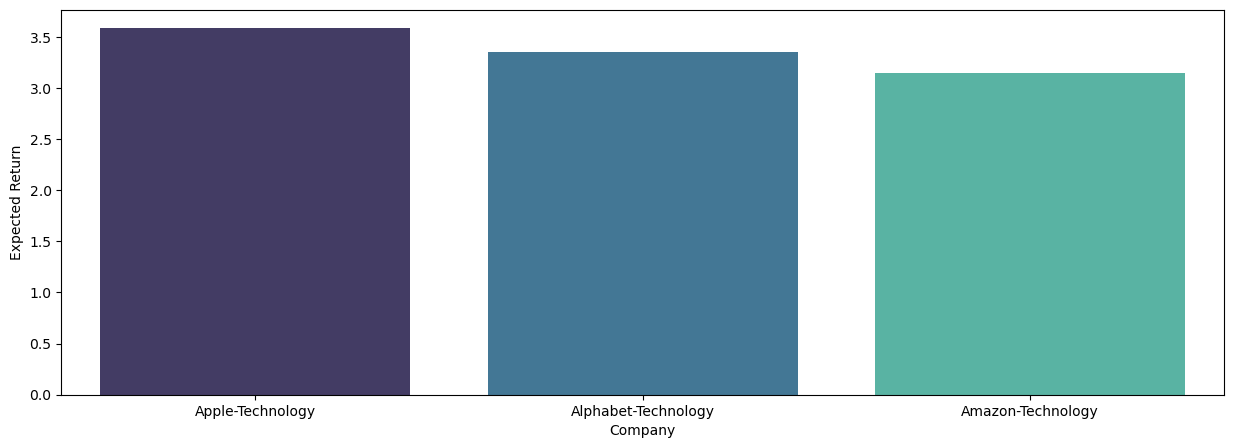

In [103]:
plt.figure(figsize=[15,5])
sns.barplot(data=portfolio.sort_values("Expected Return", ascending=False),x="index",y="Expected Return", palette ='mako')
plt.xlabel('Company') 
plt.show()

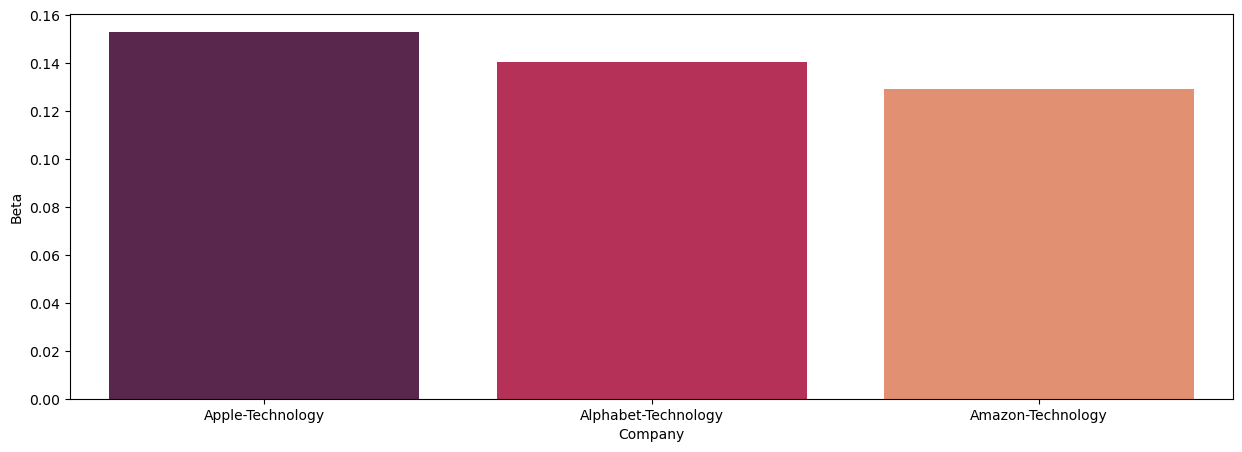

In [104]:
plt.figure(figsize=[15,5])
sns.barplot(data=portfolio.sort_values("Beta", ascending=False),x="index",y="Beta", palette ='rocket')
plt.xlabel('Company') 
plt.show()

In [105]:
# Value of Portfolio in 10 years 
portfolio_val = portfolio["Stock Value"].sum()
print(portfolio_val)

6262566.67


In [106]:
# Calculate the return on investment for 10 years
roi = ((portfolio_val - investment)/investment).round(2)
roi

11.53

In [107]:
# Annualized Rate of return for the 10 years
period = 10
roi_annual=((1+roi)**(1/period)-1).round(2)
roi_annual

0.29

In [108]:
#portfolio risk
portfolio_risk = (portfolio["Annualized Risk"]*weight).sum().round(2)
print(portfolio_risk)

28.52


#### Observation
- The investment fund of 500,000 USD would have grown to 6.26 million USD in 10 years if invested equally in these 3 stocks.
- The portfolio's annualised return on investment is 29%
- Risk rate is 28% and for the index it is 17%

### 5. Stock Price Prediction and Predicting the Future Value of Portfolio

- Preparation
- Test for stationarity
- Seasonal decomposition
- Train -Test split
- Selection of Model 
- Find the future value of the chose stocks by the end of 3 years
- Build another portfolio and repeat step 1 to 4 above

### 5.1.Preparation

In [109]:
# Explore the prices dataframe
prices.head()

Alaska_Air-Aviation  Alphabet-Technology  Amazon-Technology  \
Date                                                                      
2010-10-01              12.4475           261.828613         153.710007   
2010-10-04              12.1425           260.199707         155.389999   
2010-10-05              12.2150           268.110046         160.869995   
2010-10-06              12.1875           266.177307         155.399994   
2010-10-07              11.6250           264.015411         156.270004   

            American_Airlines-Aviation  Apple-Technology  \
Date                                                       
2010-10-01                        9.29         10.090000   
2010-10-04                        9.12          9.951428   
2010-10-05                        9.23         10.319285   
2010-10-06                        9.23         10.328215   
2010-10-07                        9.24         10.329286   

            Bausch_Health-Healthcare_Pharma  Credit_Suisse-Finance  \
Date                                                                 
2010-10-01                        25.750000              42.226563   
2010-10-04                        25.870001              41.914063   
2010-10-05                        26.299999              43.154297   
2010-10-06                        26.690001              43.437500   
2010-10-07                        26.600000              43.671875   

            Deutsche_Bank-Finance  Goldman_Sachs-Finance  Hawaiian-Aviation  \
Date                                                                          
2010-10-01              52.595421             147.699997               5.96   
2010-10-04              51.755726             146.570007               5.75   
2010-10-05              53.950382             149.570007               5.85   
2010-10-06              54.608780             150.839996               5.97   
2010-10-07              54.036259             151.110001               6.15   

            Johnson-Healthcare_Pharma  Merck-Healthcare_Pharma  SP500-Index  
Date                                                                         
2010-10-01                  61.750000                36.599998  1146.239990  
2010-10-04                  61.669998                36.520000  1137.030029  
2010-10-05                  62.799999                37.020000  1160.750000  
2010-10-06                  63.209999                37.009998  1159.969971  
2010-10-07                  63.220001                36.709999  1158.060059

In [110]:
prices=prices.reset_index()

In [111]:
prices.columns

Index(['Date', 'Alaska_Air-Aviation', 'Alphabet-Technology',
       'Amazon-Technology', 'American_Airlines-Aviation', 'Apple-Technology',
       'Bausch_Health-Healthcare_Pharma', 'Credit_Suisse-Finance',
       'Deutsche_Bank-Finance', 'Goldman_Sachs-Finance', 'Hawaiian-Aviation',
       'Johnson-Healthcare_Pharma', 'Merck-Healthcare_Pharma', 'SP500-Index'],
      dtype='object')

In [112]:
stock_df=prices.drop(['Date', 'Alaska_Air-Aviation','American_Airlines-Aviation','Bausch_Health-Healthcare_Pharma', 
                'Credit_Suisse-Finance','Deutsche_Bank-Finance', 'Goldman_Sachs-Finance', 'Hawaiian-Aviation',
                'Johnson-Healthcare_Pharma', 'Merck-Healthcare_Pharma', 'SP500-Index'],axis=1)

In [113]:
stock_df

Alphabet-Technology  Amazon-Technology  Apple-Technology
0              261.828613         153.710007         10.090000
1              260.199707         155.389999          9.951428
2              268.110046         160.869995         10.319285
3              266.177307         155.399994         10.328215
4              264.015411         156.270004         10.329286
...                   ...                ...               ...
2512          1428.290039        3019.790039        108.220001
2513          1444.959961        3095.129883        112.279999
2514          1464.520020        3174.050049        114.959999
2515          1469.329956        3144.879883        114.089996
2516          1469.599976        3148.729980        115.809998

[2517 rows x 3 columns]

In [114]:
stock_df.rename(columns = {'Amazon-Technology':'Amazon', 'Apple-Technology':'Apple', 'Alphabet-Technology':'Google'}, inplace = True)

In [115]:
stock_df.head()

Google      Amazon      Apple
0  261.828613  153.710007  10.090000
1  260.199707  155.389999   9.951428
2  268.110046  160.869995  10.319285
3  266.177307  155.399994  10.328215
4  264.015411  156.270004  10.329286

### 5.2.Test for Stationarity

In [116]:
# Augmented Dickey-Fuller (ADF) test

from statsmodels.tsa.stattools import adfuller

for col in stock_df.columns:
    adf_test = adfuller(stock_df[col])

    print(col)
    print('ADF Statistic: %f' % adf_test[0])
    print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
    print('p-value: %f' % adf_test[1])
    
    if adf_test[1] >= 0.05:
        print("\nSeries is Non-Stationary")
    else:
        print("\nSeries is Stationary")
        
    print('\n--------------------------------------\n')

Google
ADF Statistic: 0.188378
Critical Values @ 0.05: -2.86
p-value: 0.971602

Series is Non-Stationary

--------------------------------------

Amazon
ADF Statistic: 2.739671
Critical Values @ 0.05: -2.86
p-value: 0.999088

Series is Non-Stationary

--------------------------------------

Apple
ADF Statistic: 2.709617
Critical Values @ 0.05: -2.86
p-value: 0.999087

Series is Non-Stationary

--------------------------------------



In [117]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test to check for stationarity
# Creating a function for testing all the columns

from statsmodels.tsa.stattools import kpss

for col in stock_df.columns:
    kpss_test = kpss(stock_df[col])
    
    print(col)
    print('KPSS Statistic: %f' % kpss_test[0])
    print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
    print('p-value: %f' % kpss_test[1])
    
    if kpss_test[1] <= 0.05:
        print("\nSeries is Non-Stationary")
    else:
        print("\nSeries is Stationary")
        
    print('\n--------------------------------------\n')

Google
KPSS Statistic: 7.892446
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Non-Stationary

--------------------------------------

Amazon
KPSS Statistic: 6.956628
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Non-Stationary

--------------------------------------

Apple
KPSS Statistic: 6.131432
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Non-Stationary

--------------------------------------



#### Observation:
Both the tests confirm that the price data of all stocks are non-stationary

### 5.3.Time Series Decompostion

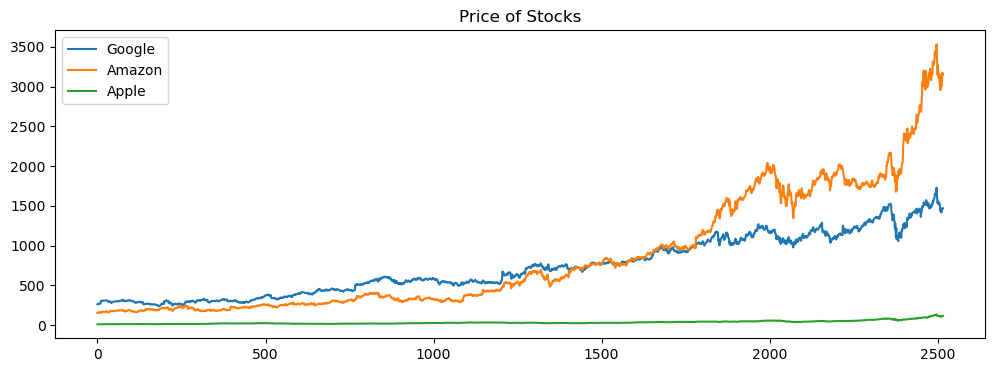

In [118]:
# Plot the actual prices of all stocks
stock_df.plot(figsize = (12,4))
plt.title("Price of Stocks")
plt.show()

#### Observation:
The stocks of Amazon and Google show a clear upward trend while Apple & J&J appears to be stable.

In the next step, in order to test the contrinution of trend, seasonality and systemic risks towards the non-stationarity, timeseries decomposition is done.

### Additive seasonal decomposition

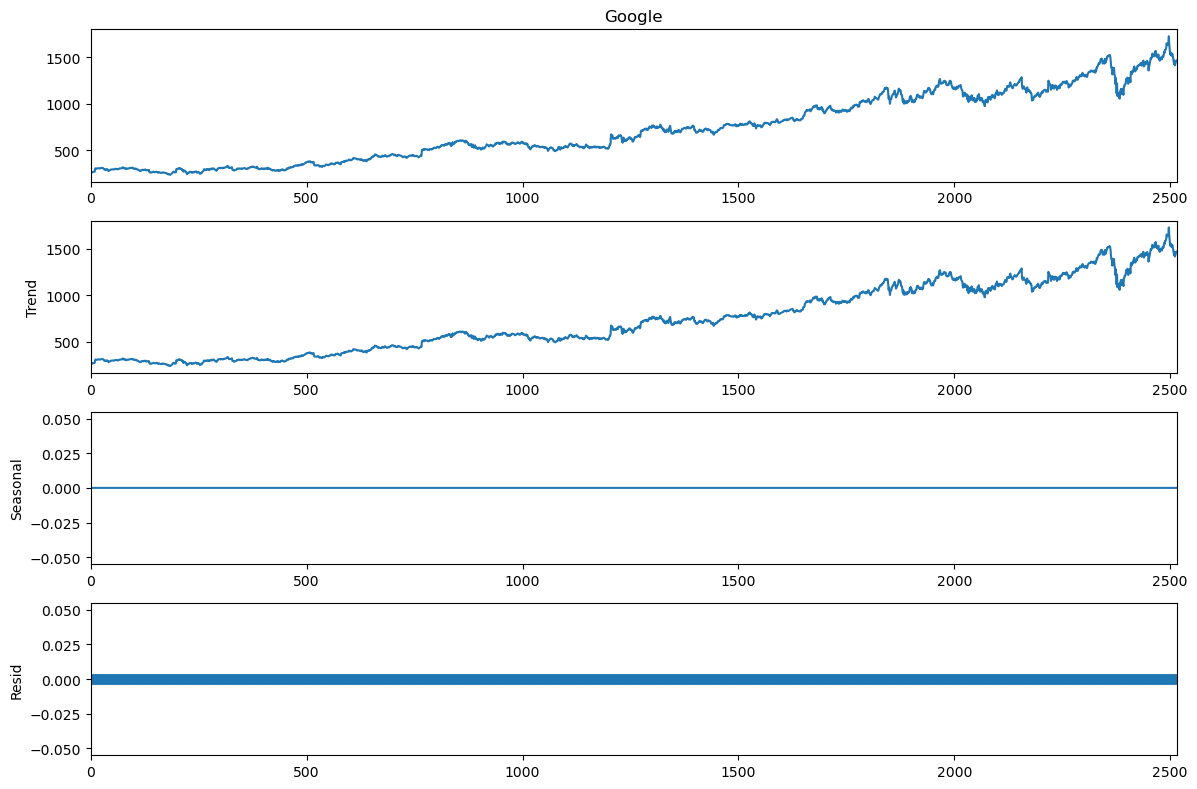

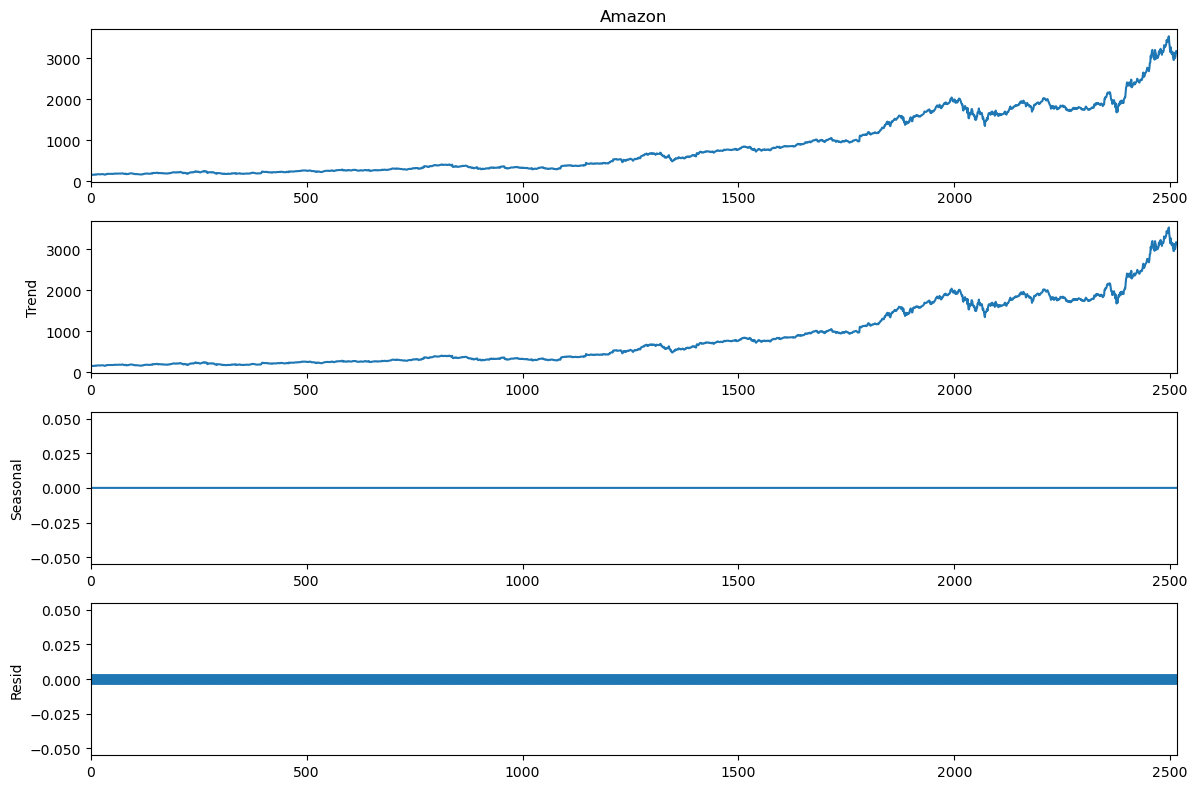

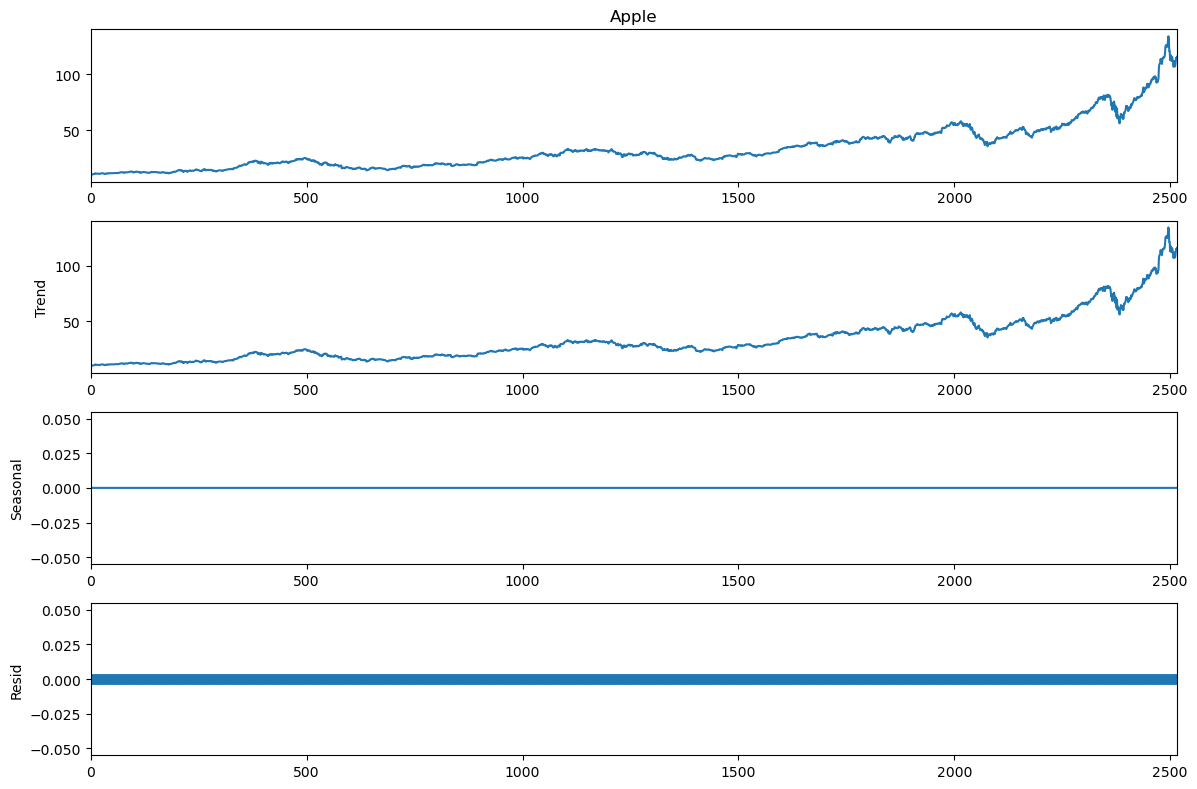

In [119]:
# Additive seasonal decomposition for all stocks
for col in stock_df.columns:
    rcParams['figure.figsize'] = 12, 8
    add_result = seasonal_decompose(stock_df[col], model='additive', period =1) # additive seasonal index
    fig = add_result.plot()
    plt.show()
    print("\n")

### Multiplicative seasonal decomposition

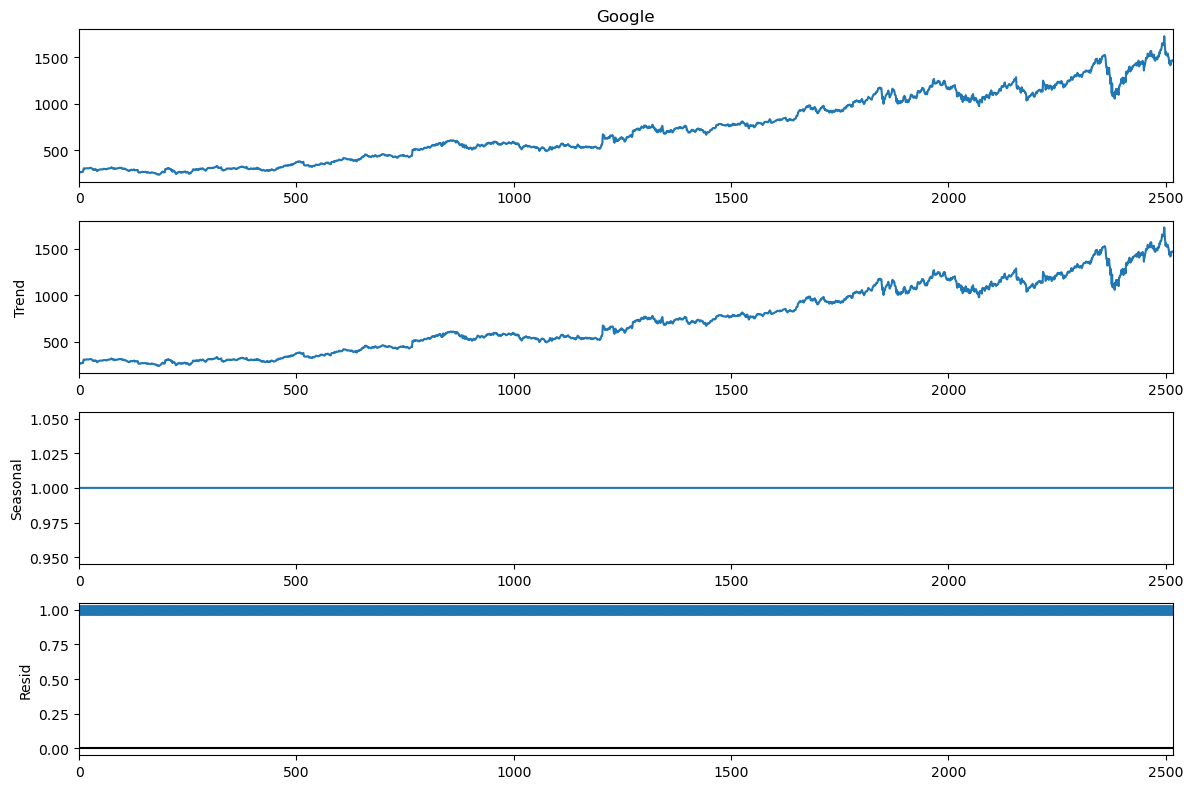

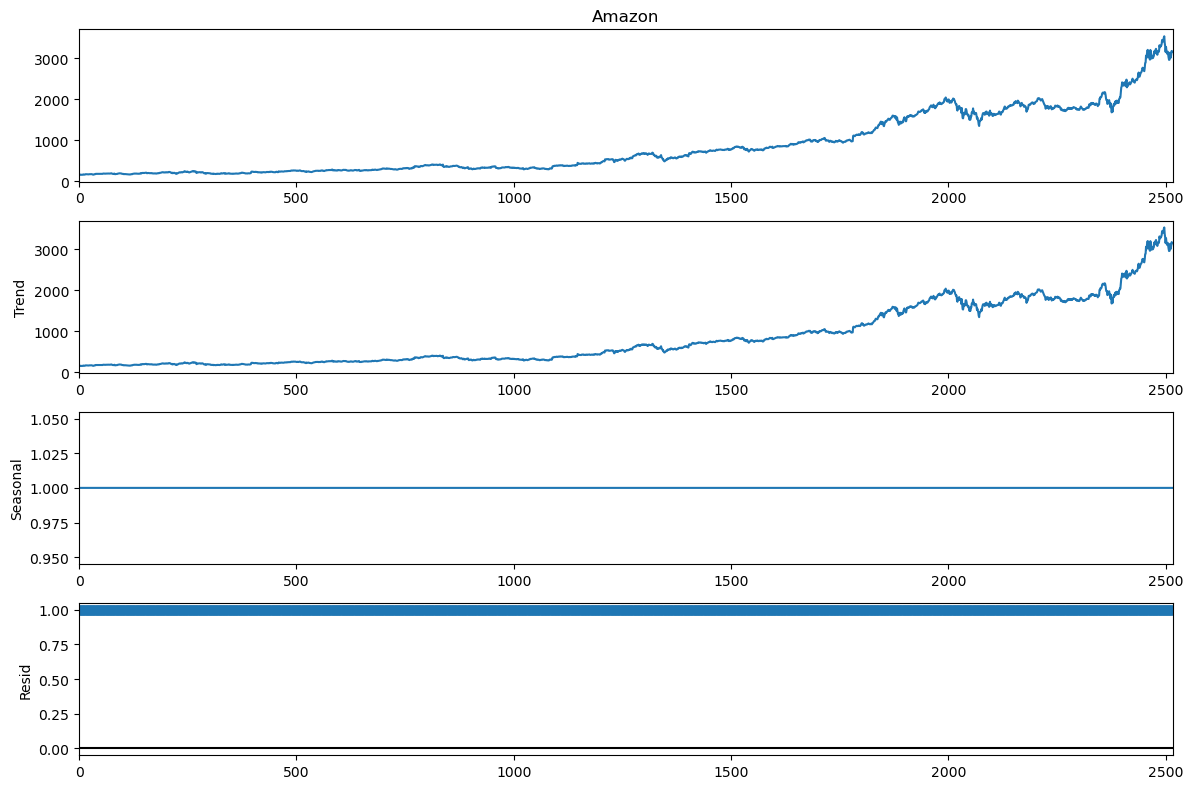

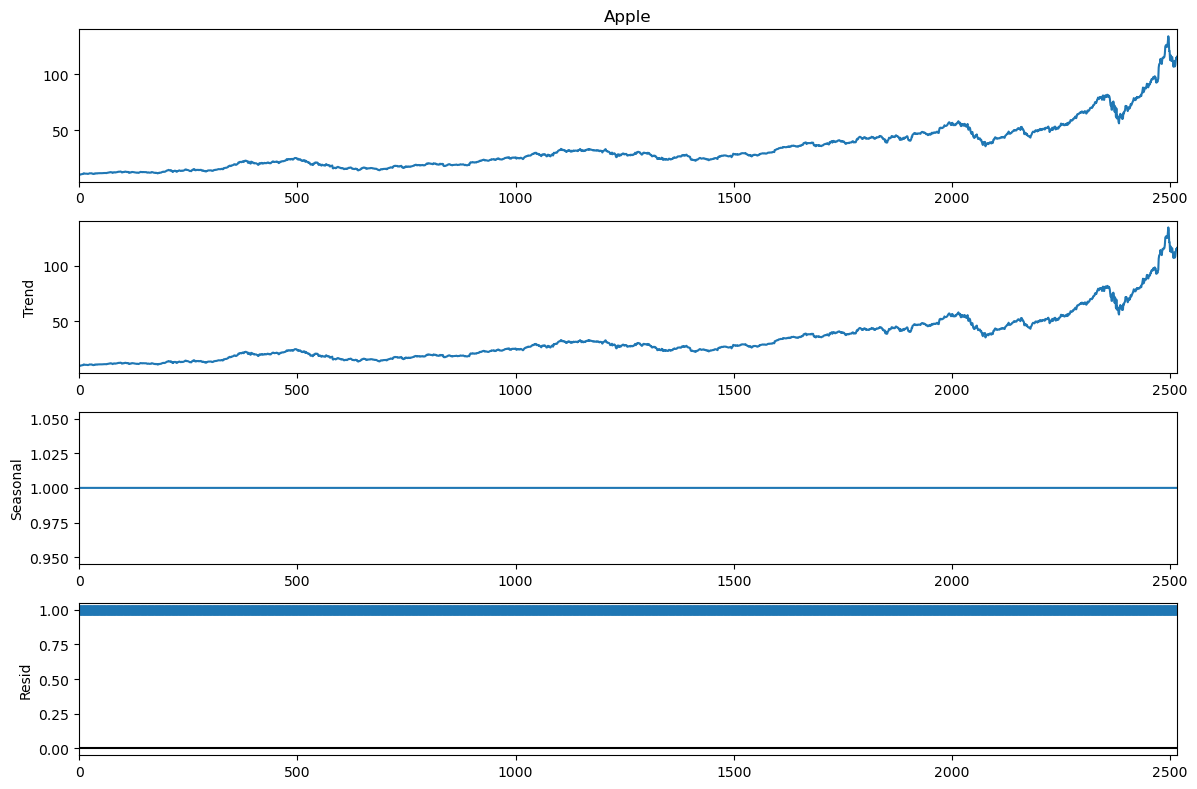

In [120]:
# Multiplicative seasonal decomposition for J&J
for col in stock_df.columns:
    mul_result = seasonal_decompose(stock_df[col], model='multiplicative', period=1) # multiplicative seasonal index
    fig = mul_result.plot()
    plt.show()

#### Observation:
- The graphs show that there is a clear uptrend in the data; however, seasonality and and systemic effect of residues are nil.
- Hence, it can be concluded that the non stationarity in the data is due to the effect of trend.
- Hence exponential smoothing and Auto Regression models can be explored.
- Also, the portfolio contains multiple stocks to be predicted and hence the <b>Vector Auto Regression model</b> can also be evaluated for its ability to forecast future prices.
- RMSE and MAPE values would be used for evaluating the model. The model that shows lowest RMSE and MAPE would be selected for forecasting.

### 5.4. Test-Train Split

In [121]:
# Length of the dataframe

len(stock_df)

2517

In [122]:
# Keeping 70% values as train
train_len = int(stock_df.shape[0]*0.7)
test_len = int(stock_df.shape[0]) - int(stock_df.shape[0]*0.7)

# Train data
train = stock_df[:train_len] 

# Test data
test = stock_df[train_len:]

#### The dataset of Amazon stocks alone is taken as an example for testing the effectiveness of the models in subsequent parts

### 5.5. Build and evaluate the ML Models for Time series forecast
- Since the smoothing methods are quiet useful for datasets with trend and seasonality, these models are evaluated.The models include: Simple exponential smoothing, Holt's exponential smoothing, Holt-winter's additive forecast method, Holt-Winter's multiplicative forcast method.
- Since ARIMA set of models will be tested
- Since the dataset contains prices of multiple stocks, VAR method will be built and evaluated

### 5.5.1 Holt's method with trend

{'smoothing_level': 0.9947887695526898, 'smoothing_trend': 9.994549225956181e-05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 156.23633061810202, 'initial_trend': 0.45222165871302555, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


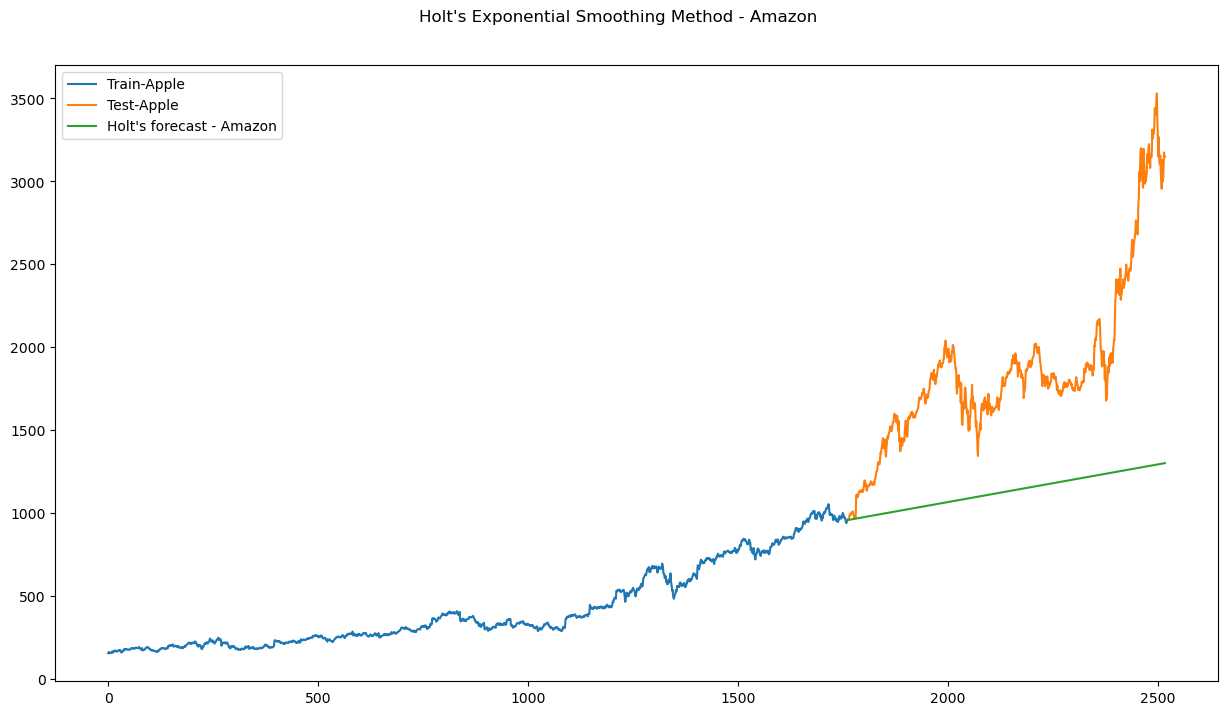

In [123]:
# Fit the model for Amazon

hws_model = ExponentialSmoothing(np.asarray(train['Amazon']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
hws_model_fit = hws_model.fit(optimized=True)
print(hws_model_fit.params)
holt = test.copy()
holt['holt_forecast'] = hws_model_fit.forecast(len(test))
    
# Plot train, test and forecast for Amazon
plt.figure(figsize=(15,8))
plt.plot(train['Amazon'], label='Train-'+ col)
plt.plot(test['Amazon'], label='Test-'+ col)
plt.plot(holt['holt_forecast'], label='Holt\'s forecast - Amazon')
plt.legend(loc='best')
plt.suptitle('Holt\'s Exponential Smoothing Method - Amazon', y=0.95)
plt.show()

In [124]:
# RMSE & MAPE for Holt's exponential smoothing method - Amazon

rmse = np.sqrt(mean_squared_error(test['Amazon'], holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Amazon']-holt['holt_forecast'])/test['Amazon'])*100,2)

results_Amazon = pd.DataFrame({'Method':['Holt\'s Exp Smoothing'], 'RMSE': [rmse],'MAPE': [mape] })
results_Amazon

Method    RMSE   MAPE
0  Holt's Exp Smoothing  849.67  36.46

## Auto Regressive methods

1. Under ARIMA set of models, Auto Regression (AR), Moving Average (MA), Auto REgressive Moving Average (ARMA), Auto REgressive Integrated Moving Average (ARIMA) and Seasonal ARIMA (SARIMA) methods are to be compared.
2. As observed, the data is non stationary. Before testing the data in ARIMA models, it has to be made stationary.
3. This is done by Box-cox transformation followed by differencinng.
4. Stationarity is verified after transformation and differencing.
5. The stationary data is fit in the model to evaluate its effectiveness.

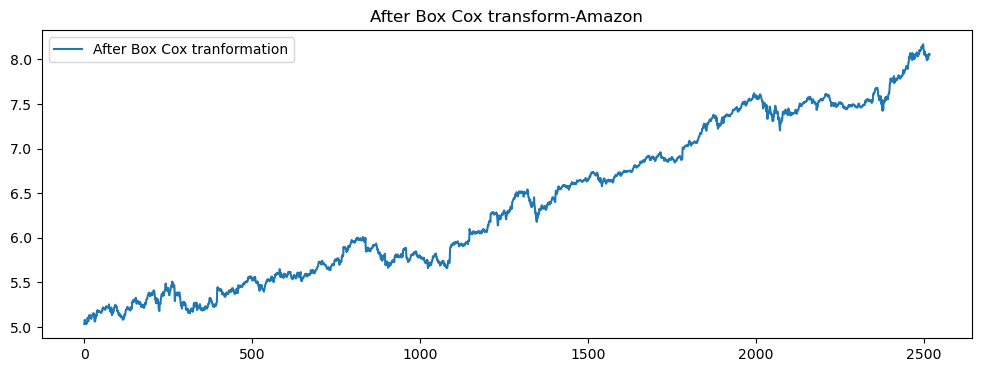

In [125]:
# Box Cox transformation to make variance constant

df_boxcox = pd.Series(boxcox(stock_df['Amazon'], lmbda=0), index = stock_df.index)

plt.figure(figsize=(12,4))
plt.plot(df_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform-Amazon')
plt.show()

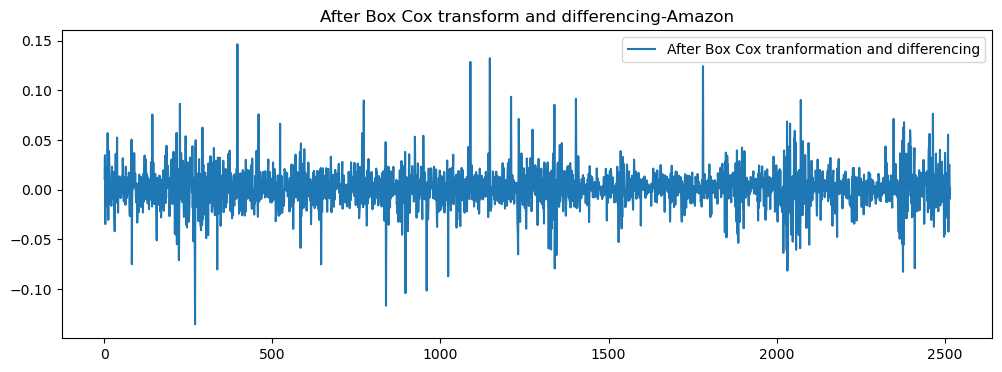

In [126]:
# Differencing to remove trend

df_boxcox_diff = pd.Series(df_boxcox - df_boxcox.shift(), stock_df.index)
plt.figure(figsize=(12,4))
plt.plot(df_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing-Amazon')
plt.show()

#### Observation: 
After the boxcox transformation and first order differencing the trend is removed and the data is distributed around the mean. 

#### Check for stationarity after tranformation and differencing

In [127]:
# Check for null values after differencing
df_boxcox_diff.head(3)

0         NaN
1    0.010870
2    0.034658
Name: Amazon, dtype: float64

In [128]:
df_boxcox_diff.dropna(inplace=True)

In [129]:
# Check for null values again
df_boxcox_diff.head(3)

1    0.010870
2    0.034658
3   -0.034594
Name: Amazon, dtype: float64

In [130]:
# Augmented Dickey-Fuller (ADF) test

adf_test = adfuller(df_boxcox_diff)

print('Amazon')
print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

Amazon
ADF Statistic: -51.444151
Critical Values @ 0.05: -2.86
p-value: 0.000000


In [131]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

kpss_test = kpss(df_boxcox_diff)

print('Amazon')
print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

Amazon
KPSS Statistic: 0.062235
Critical Values @ 0.05: 0.46
p-value: 0.100000


In [132]:
# Test-Train Split of differentiated data
train_df_boxcox = df_boxcox[:train_len]
test_df_boxcox = df_boxcox[train_len:]
train_df_boxcox_diff = df_boxcox_diff[:train_len-1]
test_df_boxcox_diff = df_boxcox_diff[train_len-1:]
print(train_df_boxcox,test_df_boxcox,train_df_boxcox_diff,test_df_boxcox_diff)

0       5.035068
1       5.045938
2       5.080597
3       5.046002
4       5.051585
          ...   
1756    6.861816
1757    6.845656
1758    6.844389
1759    6.857377
1760    6.863176
Name: Amazon, Length: 1761, dtype: float64 1761    6.868339
1762    6.866089
1763    6.863908
1764    6.872594
1765    6.888420
          ...   
2512    8.012943
2513    8.037585
2514    8.062764
2515    8.053531
2516    8.054754
Name: Amazon, Length: 756, dtype: float64 1       0.010870
2       0.034658
3      -0.034594
4       0.005583
5      -0.004618
          ...   
1756   -0.009949
1757   -0.016160
1758   -0.001267
1759    0.012988
1760    0.005799
Name: Amazon, Length: 1760, dtype: float64 1761    0.005162
1762   -0.002249
1763   -0.002181
1764    0.008686
1765    0.015825
          ...   
2512    0.006622
2513    0.024643
2514    0.025179
2515   -0.009233
2516    0.001223
Name: Amazon, Length: 756, dtype: float64


### 5.5.5. Auto Regression (AR) Method

In [133]:
# Import ARIMA library and fit the model
from statsmodels.tsa.arima.model import ARIMA
ar_model = ARIMA(train_df_boxcox_diff, order=(1, 0, 0)) 
ar_model_fit = ar_model.fit()
print(ar_model_fit.params)

const     0.001037
ar.L1    -0.001730
sigma2    0.000378
dtype: float64


In [134]:
# Recover original time series
ar = df_boxcox_diff.copy()
ar['ar_forecast_boxcox_diff'] = ar_model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
ar['ar_forecast_boxcox'] = ar['ar_forecast_boxcox_diff'].cumsum()
ar['ar_forecast_boxcox'] = ar['ar_forecast_boxcox'].add(df_boxcox[0])
ar['ar_forecast'] = np.exp(ar['ar_forecast_boxcox'])

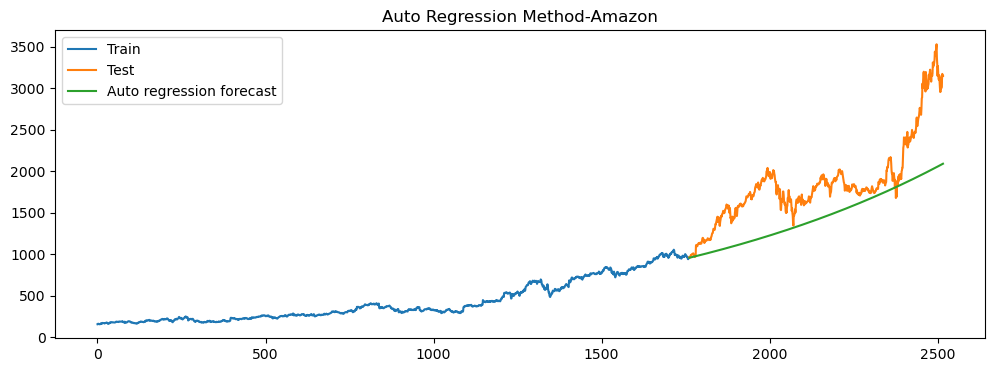

In [135]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Amazon'], label='Train')
plt.plot(test['Amazon'], label='Test')
plt.plot(ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method-Amazon')
plt.show()

In [136]:
# Calculate RMSE and MAPE for 'Autoregressive (AR) method' - Amazon

rmse = np.sqrt(mean_squared_error(test['Amazon'][1:], ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Amazon'][1:]-ar['ar_forecast'][test.index.min():])/test['Amazon'])*100,2)

tempResults_Amazon = pd.DataFrame({'Method':['AR'], 'RMSE': [rmse],'MAPE': [mape] })
results_Amazon = pd.concat([results_Amazon, tempResults_Amazon])
results_Amazon = results_Amazon[['Method', 'RMSE', 'MAPE']]
results_Amazon

Method    RMSE   MAPE
0  Holt's Exp Smoothing  849.67  36.46
0                    AR  505.13  20.85

### 5.5.6. Moving average method (MA)

In [137]:
# Create and fit model
ma_model = ARIMA(train_df_boxcox_diff, order=(0, 0, 1)) 
ma_model_fit = ma_model.fit()
print(ma_model_fit.params)

const     0.001036
ma.L1    -0.001363
sigma2    0.000378
dtype: float64


In [138]:
# Recover original time series
ma = df_boxcox_diff.copy()
ma['ma_forecast_boxcox_diff'] = ma_model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
ma['ma_forecast_boxcox'] = ma['ma_forecast_boxcox_diff'].cumsum()
ma['ma_forecast_boxcox'] = ma['ma_forecast_boxcox'].add(df_boxcox[0])
ma['ma_forecast'] = np.exp(ma['ma_forecast_boxcox'])

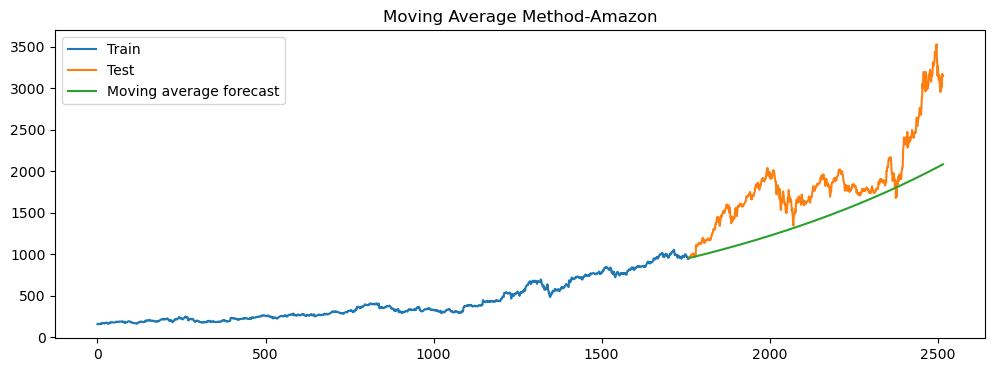

In [139]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Amazon'], label='Train')
plt.plot(test['Amazon'], label='Test')
plt.plot(ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method-Amazon')
plt.show()

In [140]:
# Calculate RMSE and MAPE for 'Moving Average (MA) method' - Amazon
rmse = np.sqrt(mean_squared_error(test['Amazon'][1:], ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Amazon'][1:]-ma['ma_forecast'][test.index.min():])/test['Amazon'])*100,2)

tempResults_Amazon = pd.DataFrame({'Method':['MA'], 'RMSE': [rmse],'MAPE': [mape] })
results_Amazon = pd.concat([results_Amazon, tempResults_Amazon])
results_Amazon = results_Amazon[['Method', 'RMSE', 'MAPE']]
results_Amazon

Method    RMSE   MAPE
0  Holt's Exp Smoothing  849.67  36.46
0                    AR  505.13  20.85
0                    MA  508.88  21.07

### 5.5.7. Auto regression moving average method (ARMA)

In [141]:
# Create and fit the model
arma_model = ARIMA(train_df_boxcox_diff, order=(1, 0, 1))
arma_model_fit = arma_model.fit()
print(arma_model_fit.params)

const     1.035891e-03
ar.L1    -3.656750e-07
ma.L1    -3.677357e-07
sigma2    3.775763e-04
dtype: float64


In [142]:
# Recover original time series

arma = df_boxcox_diff.copy()
arma['arma_forecast_boxcox_diff'] = arma_model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
arma['arma_forecast_boxcox'] = arma['arma_forecast_boxcox_diff'].cumsum()
arma['arma_forecast_boxcox'] = arma['arma_forecast_boxcox'].add(df_boxcox[0])
arma['arma_forecast'] = np.exp(arma['arma_forecast_boxcox'])


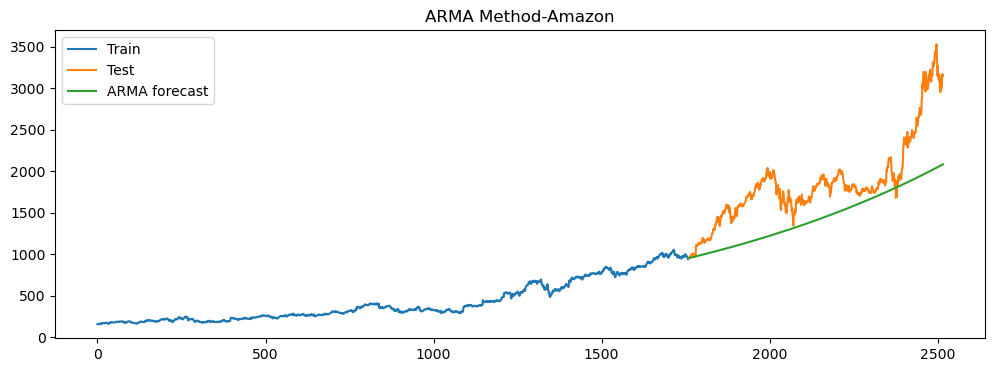

In [143]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(stock_df['Amazon'][:train_len-1], label='Train')
plt.plot(stock_df['Amazon'][train_len-1:], label='Test')
plt.plot(arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method-Amazon')
plt.show()

In [144]:
# Calculate RMSE and MAPE 'Autoregressive moving average (ARMA) method' - Amazon
rmse = np.sqrt(mean_squared_error(test['Amazon'], arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Amazon']-arma['arma_forecast'][train_len-1:])/test['Amazon'])*100,2)

tempResults_Amazon = pd.DataFrame({'Method':['ARMA'], 'RMSE': [rmse],'MAPE': [mape] })
results_Amazon = pd.concat([results_Amazon, tempResults_Amazon])
results_Amazon = results_Amazon[['Method', 'RMSE', 'MAPE']]
results_Amazon

Method    RMSE   MAPE
0  Holt's Exp Smoothing  849.67  36.46
0                    AR  505.13  20.85
0                    MA  508.88  21.07
0                  ARMA  508.85  21.06

### 5.5.8. Auto regressive integrated moving average (ARIMA)

In [145]:
# Create and fit the model
arima_model = ARIMA(train_df_boxcox_diff, order=(1, 1, 1))
arima_model_fit = arima_model.fit()
print(arima_model_fit.params)

ar.L1    -0.001172
ma.L1    -0.999925
sigma2    0.000378
dtype: float64


In [146]:
# Recover original time series forecast
arima = df_boxcox_diff.copy()
arima['arima_forecast_boxcox_diff'] = arima_model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
arima['arima_forecast_boxcox'] = arima['arima_forecast_boxcox_diff'].cumsum()
arima['arima_forecast_boxcox'] = arima['arima_forecast_boxcox'].add(df_boxcox[0])
arima['arima_forecast'] = np.exp(arima['arima_forecast_boxcox'])

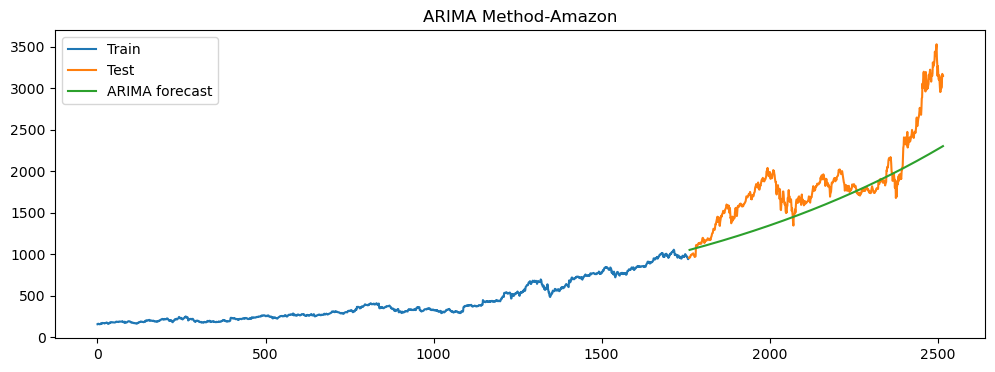

In [147]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(stock_df['Amazon'][:train_len-1], label='Train')
plt.plot(stock_df['Amazon'][train_len-1:], label='Test')
plt.plot(arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('ARIMA Method-Amazon')
plt.show()

In [148]:
# Calculate RMSE and MAPE for ARIMA- Amazon
rmse = np.sqrt(mean_squared_error(test['Amazon'][1:], arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Amazon'][1:]-arima['arima_forecast'][test.index.min():])/test['Amazon'])*100,2)

tempResults_Amazon = pd.DataFrame({'Method':['ARIMA'], 'RMSE': [rmse],'MAPE': [mape] })
results_Amazon = pd.concat([results_Amazon, tempResults_Amazon])
results_Amazon = results_Amazon[['Method', 'RMSE', 'MAPE']]
results_Amazon

Method    RMSE   MAPE
0  Holt's Exp Smoothing  849.67  36.46
0                    AR  505.13  20.85
0                    MA  508.88  21.07
0                  ARMA  508.85  21.06
0                 ARIMA  388.06  14.47

### 5.5.8. Seasonal ARIMA

In [149]:
# Import SARIMAX

from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(train_df_boxcox_diff, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
sarima_model_fit = sarima_model.fit()
print(sarima_model_fit.params)

ar.L1       0.000757
ma.L1      -0.999543
ar.S.L12   -0.049238
ma.S.L12   -0.999806
sigma2      0.000376
dtype: float64


In [150]:
# Recover original time series forecast

sarima = df_boxcox_diff.copy()
sarima['sarima_forecast_boxcox'] = sarima_model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
sarima['sarima_forecast'] = np.exp(sarima['sarima_forecast_boxcox'])

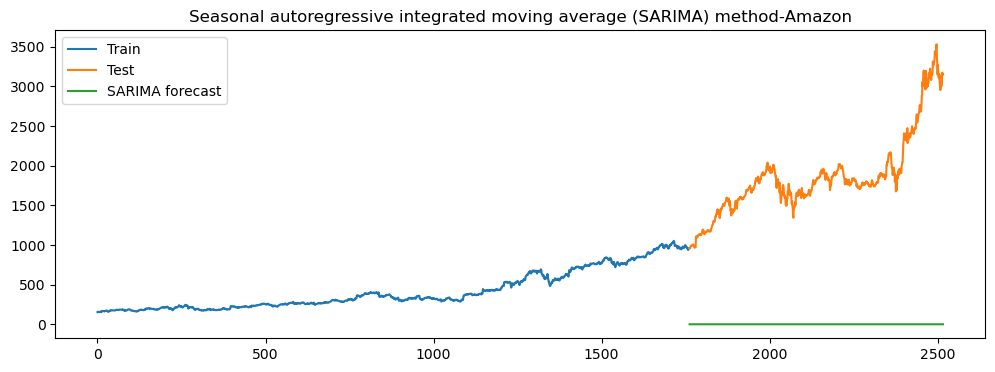

In [151]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Amazon'], label='Train')
plt.plot(test['Amazon'], label='Test')
plt.plot(sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method-Amazon')
plt.show()

In [152]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Amazon'][1:], sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Amazon'][1:]-sarima['sarima_forecast'][test.index.min():])/test['Amazon'])*100,2)

tempResults_Amazon = pd.DataFrame({'Method':['SARIMA'], 'RMSE': [rmse],'MAPE': [mape] })
results_Amazon = pd.concat([results_Amazon, tempResults_Amazon])
results_Amazon = results_Amazon[['Method', 'RMSE', 'MAPE']]
results_Amazon

Method     RMSE   MAPE
0  Holt's Exp Smoothing   849.67  36.46
0                    AR   505.13  20.85
0                    MA   508.88  21.07
0                  ARMA   508.85  21.06
0                 ARIMA   388.06  14.47
0                SARIMA  1929.34  99.94

#### Plot all the result of all the models

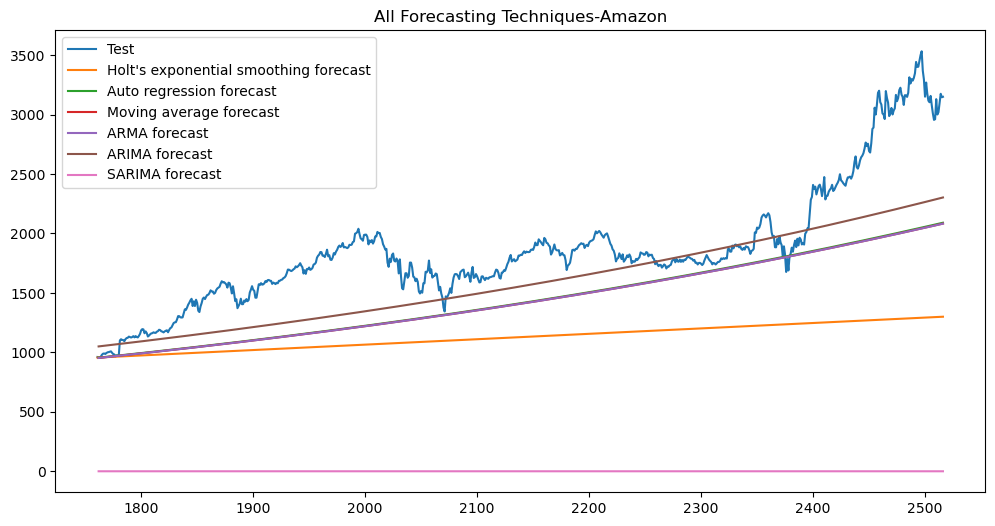

In [153]:
# Plot showing comparative forecasts of all smoothing techniques
plt.figure(figsize=(12,6))
plt.plot(test['Amazon'], label='Test')
plt.plot(holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.plot(ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.plot(ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.plot(arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.plot(arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.plot(sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')


plt.legend(loc='best')
plt.title('All Forecasting Techniques-Amazon')
plt.show()

### Observation: 

1. When comparing the RMSE and MAPE resutlts of all the ML models, SARIMA gives lowest RMSE and MAPE values and the predicted values fit perfectly on the test data set
2. However, the model completely overfits on the test data
2. Before deciding whether to select SARIMA or not, Vector Auto Regression can also be evaluated.

#### Plot the results of RMSE and MAPE

In [154]:
results_Amazon_final=results_Amazon.set_index('Method')

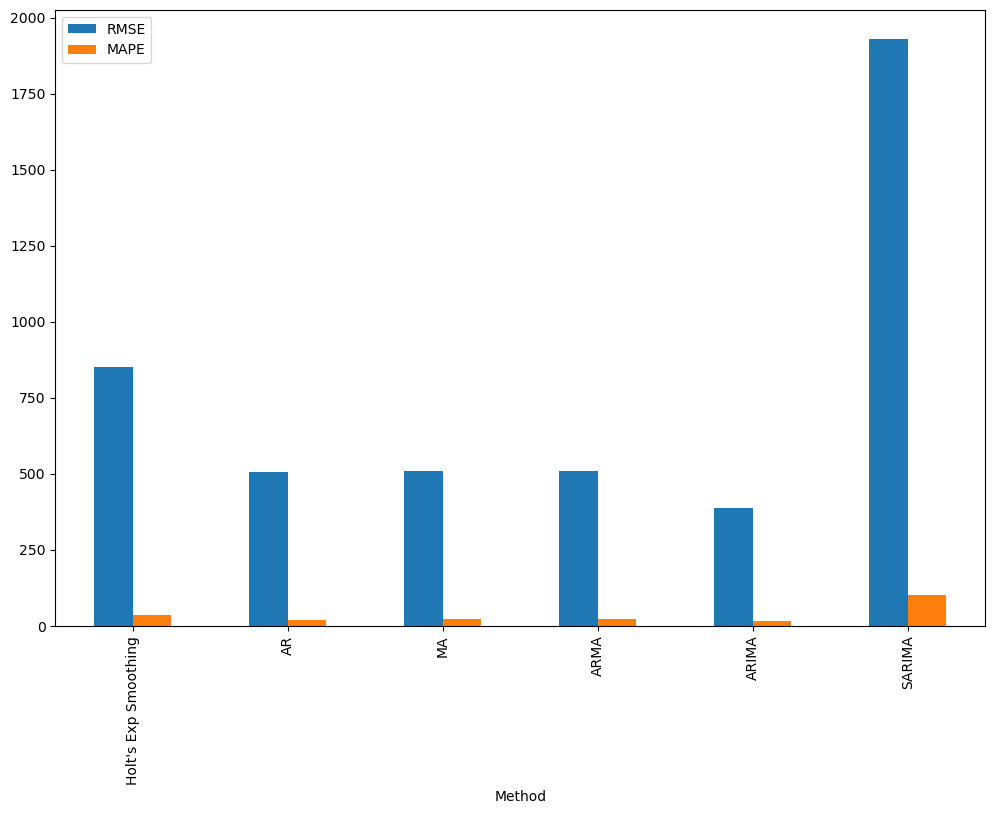

In [155]:
results_Amazon_final.plot.bar()
plt.show()

#### Conclusion:

Based on the above results, we conclude that ARIMA is the most suited ML model for forecastig the prices of the stocks. 

## 6. Final Recommendation: 

Alexandra may be advised to invest equally in a portfolio comprising of stocks of Amazon, Apple and Google. 
    